<img src="../img/mCIDaeNnb.png" alt="Logo CiDAEN" align="right">

<br><br><br>
<h2><font color="#00586D" size=4>Trabajo Fin de Máster</font></h2>

<h1><font color="#00586D" size=5>Análisis y Predicción de Resultados en Partidas de Clash Royale:<br><b>3. Análisis Exploratorio de Datos (EDA)</b></font></h1>
<br><br><br>


<div align="right">
<font color="#00586D" size=3>Máster en Ciencia de Datos e Ingeniería de Datos en la Nube</font><br>
<font color="#00586D" size=3>Universidad de Castilla-La Mancha</font><br>
</div>

<font color="#00586D" size=3>Iván Fernández García</font><br>
<font color="#00586D" size=3>Curso académico 2024/2025</font><br>

---

<a id="indice"></a>
<h2><font color="#00586D" size=5>Índice</font></h2>


* [1. Introducción](#section1)
* [2. Descripción del conjunto de datos](#section2)
* [3. EDA](#section3)
    * [3.1. Exploración inicial](#section3_1)
    * [3.2. Distribución de las variables](#section3_2)
    * [3.3. Relaciones entre variables](#section3_3)
    * [3.4. Varianza e importancia de las variables](#section3_4)
* [4. Conclusiones](#section4)

---

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier

---

<a id="section1"></a>
## <font color="#00586D"> 1. Introducción</font>

Durante las dos primeras fases del proyecto se ha constuido el conjunto de datos que utilizaremos de ahora en adelante para cumplir nuestro objetivo: Analizar partidas de Clash Royale y desarrollar modelos de aprendizaje automático capaces de predecir de forma efectiva el resultado de nuevos enfrentamientos. Concretamente, nos enfocaremos en partidas de *Ladder* correspondientes al modo de juego *Camino de Trofeos* y posteriores a los últimos cambios de balance del 9 de abril.

Para construir este *dataset*, se ha extraido información de partidas a través de la API, mientras que la de las cartas se ha complementado con datos de otras fuentes. Posteriormente, se han aplicado todas las transformaciones necesarias para obtener un conjunto de datos estructurado en el que cada fila representa una observación que contiene información de valor sobre la partida. **Durante este análisis y también durante la fase de modelado (a excepción de la evaluación final sobre *test*), utilizaremos el conjunto de entrenamiento.**

El objetivo de esta fase es comprender mejor los datos de los que partimos para resolver el problema, estudiando las relaciones entre variables y sacando conclusiones que nos permitan tomar mejores decisiones de cara al preprocesamiento para que nuestros modelos ofrezcan buenos resultados y generalicen lo suficiente.

---

<a id="section2"></a>
## <font color="#00586D"> 2. Descripción del conjunto de datos</font>

Vamos a comenzar con una breve descripción de nuestro conjunto de datos, aunque contamos con un número de variables considerable.

En primer lugar, distinguimos nuestra variable objetivo:

* `winner`: Indica el ganador de la partida mediante la etiqueta `player1` ó `player2`.

Para predecir el ganador, buscaremos patrones a través de una serie de variables predictoras. Comenzamos con las que proporcionan información de la partida, independientemente del jugador:

* `battleTime`: Instante de tiempo en el que se disputó la partida.
* `arena`: Nombre de la arena en la que se disputó la partida.

Además, cada uno de los jugadores cuenta con las siguientes variables predictoras (cuyo nombre viene precedido de `player1_` ó `player2_` según corresponda):

* `tag`: Tag único del jugador.
* `name`: Nombre del jugador.
* `startingTrophies`: Número de trofeos con los que el jugador comenzó la partida.
* `has[CARD]`: Variable binaria que indica si el jugador utiliza una carta. **Hay una por cada carta del juego y exactamente ocho unos (uno por cada carta del mazo)**.
* `meanCardLevel`: Nivel medio de las cartas del mazo.
* `minCardLevel`: Nivel mínimo de las cartas del mazo.
* `maxCardLevel`: Nivel máximo de las cartas del mazo.
* `totalStarLevel`: Nivel estelar total de las cartas del mazo.
* `meanElixirCost`: Coste de elixir del mazo. Para los mazos con espejo, es como considerar siete cartas.
* `numEvolutionCards`: Número de cartas con evolución en el mazo (el jugador debe tener la evolución, no basta con que la carta tenga evolución).
* `numWinConditionCards`: Número de cartas consideradas *Win Condition* en el mazo.
* `numMeleeCards`: Número de cartas cuerpo a cuerpo en el mazo.
* `numRangedCards`: Número de cartas a distancia en el mazo.
* `numAirCards`: Número de unidades aéreas en el mazo.
* `numAntiAirCards`: Número de cartas con daño a unidades aéreas en el mazo.
* `numDirectDamageCards`: Número de cartas con daño directo a torre en el mazo.
* `numSplashDamageCards`: Número de cartas con daño de salpicadura en el mazo.
* `numResetAttackCards`: Número de cartas con reseteo de ataque en el mazo.
* `numCommonCards`: Número de cartas comunes en el mazo.
* `numRareCards`: Número de cartas raras en el mazo.
* `numEpicCards`: Número de cartas épicas en el mazo.
* `numLegendaryCards`: Número de cartas legendarias en el mazo.
* `numChampionCards`: Número de campeones en el mazo.
* `numTroopCards`: Número de tropas en el mazo.
* `numBuildingCards`: Número de edificios en el mazo.
* `numSpellCards`: Número de hechizos en el mazo.
* `numCounters`: Número de *counters* totales (altamente efectivos) en el mazo rival.
* `numUncounteredCards`: Número de cartas del mazo sin *counters* altamente efectivos en el mazo rival.
* `supportCardName`: Nombre de la tropa de las torres de coronas utilizada.
* `supportCardLevel`: Nivel de la tropa de las torres de coronas utilizada.
* `supportCardRarity`: Rareza de la tropa de las torres de coronas utilizada.

---

<a id="section3"></a>
## <font color="#00586D"> 3. EDA</font>

**Importante:** Todas las transformaciones realizadas durante el análisis tienen el objetivo de comprender mejor los datos, sacar conclusiones y poder tomar mejores decisiones de cara al preprocesamiento. Aunque se creen nuevos atributos para estudiar su desempeño y la posibilidad de incluirlos posteriormente, a lo largo de esta fase no se modificará el conjunto de entrenamiento original en ningún momento. Cabe destacar que tampoco se utilizará el conjunto de prueba, el cual se ha reservado para la realizar la evaluación final de modelos.

<a id="section3_1"></a>
### <font color="#00586D"> 3.1. Exploración inicial</font>

Comenzamos cargando nuestro conjunto de datos de entrenamiento.

In [189]:
df_train = pd.read_csv("../data/final/train.csv", parse_dates=["battleTime"])
df_train.head()

battleTime                  arena player1_tag player1_name  \
0 2025-04-16 14:04:30              Boot Camp  #8VR8QGVQP  Dubious Dic   
1 2025-04-19 20:49:15            Royal Crypt  #LUJ0LRUCJ      Matthew   
2 2025-04-16 04:36:52             Dragon Spa    #Q2Q08QQ    TheGuy626   
3 2025-04-16 15:05:56  Executioner's Kitchen   #8C8GU2CP        oscar   
4 2025-04-11 06:47:43            Spooky Town  #GJ0RYV9PJ     ajoves27   

   player1_startingTrophies  player1_hasKnight  player1_hasArchers  \
0                    7590.0                  0                   0   
1                    6065.0                  0                   0   
2                    7438.0                  0                   0   
3                    5997.0                  0                   0   
4                    4097.0                  1                   0   

   player1_hasGoblins  player1_hasGiant  player1_hasP.E.K.K.A  ...  \
0                   0                 0                     0  ...   
1                   0                 0                     1  ...   
2                   0                 0                     0  ...   
3                   0                 0                     0  ...   
4                   0                 0                     0  ...   

   player2_numChampionCards  player2_numTroopCards  player2_numBuildingCards  \
0                         0                      3                         1   
1                         0                      7                         0   
2                         0                      5                         0   
3                         0                      6                         0   
4                         0                      4                         1   

   player2_numSpellCards  player2_numCounters  player2_numUncounteredCards  \
0                      4                    5                            5   
1                      1                   11                            2   
2                      3                    4                            5   
3                      2                    8                            4   
4                      3                   15                            2   

   player2_supportCardName  player2_supportCardLevel  \
0           Tower Princess                        14   
1                Cannoneer                        12   
2           Tower Princess                        13   
3           Tower Princess                        13   
4           Dagger Duchess                        10   

   player2_supportCardRarity   winner  
0                     common  player1  
1                       epic  player2  
2                     common  player1  
3                     common  player2  
4                  legendary  player1  

[5 rows x 301 columns]

In [190]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50377 entries, 0 to 50376
Columns: 301 entries, battleTime to winner
dtypes: datetime64[ns](1), float64(8), int64(282), object(10)
memory usage: 115.7+ MB


Tenemos un total de 50377 registros que representan partidas entre dos jugadores, compuestas por 300 variables predictoras y nuestra variable objetivo.

Vamos a describir las numéricas para sacar conclusiones sobre sus distribuciones y la existencia de valores extremos:

In [191]:
df_train.drop(columns=[col for col in df_train.columns if "has" in col] + ["battleTime"]).describe(percentiles=[0.25, 0.5, 0.75, 0.99]).T.sort_values("mean", ascending=False).drop(columns=["count"])

mean          std        min       25%  \
player2_startingTrophies      6060.228239  2093.424880  28.000000  5120.000   
player1_startingTrophies      6059.181531  2094.174991  29.000000  5119.000   
player1_maxCardLevel            13.157651     2.202643   3.000000    12.000   
player2_maxCardLevel            12.927725     2.338545   3.000000    12.000   
player1_meanCardLevel           12.044735     2.354595   1.875000    10.750   
player2_meanCardLevel           11.947709     2.368447   2.000000    10.750   
player1_supportCardLevel        11.813605     2.445377   1.000000    11.000   
player2_supportCardLevel        11.761439     2.451964   1.000000    11.000   
player2_minCardLevel            10.927209     2.526578   1.000000    10.000   
player1_minCardLevel            10.866467     2.655393   1.000000     9.000   
player1_numCounters              8.391905     3.372215   0.000000     6.000   
player2_numCounters              8.368363     3.357956   0.000000     6.000   
player1_totalStarLevel           7.690394     5.539531   0.000000     3.000   
player2_totalStarLevel           6.482125     5.757469   0.000000     0.000   
player1_numTroopCards            5.865216     1.034413   0.000000     5.000   
player2_numTroopCards            5.692995     1.075684   0.000000     5.000   
player2_numAntiAirCards          3.782897     0.998913   0.000000     3.000   
player1_numAntiAirCards          3.753896     1.050692   0.000000     3.000   
player1_meanElixirCost           3.752936     0.511302   1.571429     3.375   
player2_meanElixirCost           3.675058     0.532350   1.250000     3.375   
player1_numMeleeCards            3.458463     1.126554   0.000000     3.000   
player2_numSplashDamageCards     3.402743     1.062145   0.000000     3.000   
player2_numUncounteredCards      3.401969     1.328985   0.000000     3.000   
player2_numMeleeCards            3.363261     1.103957   0.000000     3.000   
player1_numSplashDamageCards     3.325466     1.112174   0.000000     3.000   
player1_numUncounteredCards      3.316891     1.361938   0.000000     2.000   
player2_numCommonCards           2.460925     1.321249   0.000000     1.000   
player1_numCommonCards           2.392679     1.271067   0.000000     1.000   
player1_numRangedCards           2.381384     1.005794   0.000000     2.000   
player2_numRangedCards           2.276932     0.946328   0.000000     2.000   
player1_numRareCards             2.126169     1.326727   0.000000     1.000   
player2_numRareCards             2.125414     1.388558   0.000000     1.000   
player1_numEpicCards             1.857534     1.264369   0.000000     1.000   
player2_numEpicCards             1.789765     1.332492   0.000000     1.000   
player2_numSpellCards            1.783215     0.825798   0.000000     1.000   
player1_numSpellCards            1.666256     0.835290   0.000000     1.000   
player2_numDirectDamageCards     1.435199     0.737539   0.000000     1.000   
player2_numLegendaryCards        1.401969     1.118674   0.000000     1.000   
player1_numLegendaryCards        1.384441     1.123485   0.000000     0.000   
player1_numDirectDamageCards     1.327749     0.743154   0.000000     1.000   
player2_numWinConditionCards     1.051115     0.643301   0.000000     1.000   
player1_numWinConditionCards     1.046410     0.700925   0.000000     1.000   
player1_numEvolutionCards        0.909463     0.845779   0.000000     0.000   
player2_numEvolutionCards        0.739663     0.844424   0.000000     0.000   
player1_numAirCards              0.625643     0.728143   0.000000     0.000   
player2_numResetAttackCards      0.584493     0.670664   0.000000     0.000   
player2_numAirCards              0.579610     0.728961   0.000000     0.000   
player1_numResetAttackCards      0.555392     0.672748   0.000000     0.000   
player2_numBuildingCards         0.523791     0.585506   0.000000     0.000   
player1_numBuildingCards         0.468527     0.567962   0.000000     0.000   
player1_

Vemos que casi todos los pares de variables aparecen juntos, ya que la media es similar. Algunas cuentan con valores extremos, destacando los mazos con todo edificios, hechizos, cartas aéreas o cartas de una misma rareza. Podemos intuir que esto no tiene lógica y se trata de casos aislados en los que un jugador está intentando cumplir algún reto. También es llamativo que no disponemos de ninguna partida en la que alguno de los jugadores haya utilizado más de un campeón.

Vamos a comprobar los valores perdidos, los cuales eran inexistentes en nuestro conjunto de datos final antes de guardarlo.

In [192]:
df_train.isna().sum().sum()

np.int64(2)

Vemos que después de cargar los datos de entrenamiento tenemos dos valores perdidos, lo cual no tiene sentido... ¿A qué se debe esto?

La razón es que en nuestras partidas, **dos de los jugadores tienen el nombre `nan` y esto ha sido interpretado como un valor perdido al cargar los datos**. El nombre de los jugadores no es relevante para resolver nuestro problema y ambas columnas siempre se descartarán durante la fase de preprocesaminto, por lo que esto no supondrá ningún problema respecto al conjunto de entrenamiento, el de prueba o los casos nuevos. También es posible cargar los datos con `keep_default_na=False` sin especificar `na_values`, siempre asegurándonos antes de que no hay valores perdidos porque todos serán ignorados. En cualquier caso, durante el preprocesamiento se gestionará la imputación de valores perdidos en variables numéricas para evitar cualquier tipo de error al predecir ejemplos futuros que pudieran estar incompletos por cualquier motivo.

<a id="section3_2"></a>
### <font color="#00586D"> 3.2. Distribución de las variables</font>

Después de esta pequeña exploración inicial, vamos a comenzar con un análisis univariado para ver las distribuciones de las variables.

Comenzamos con nuestra variable objetivo:

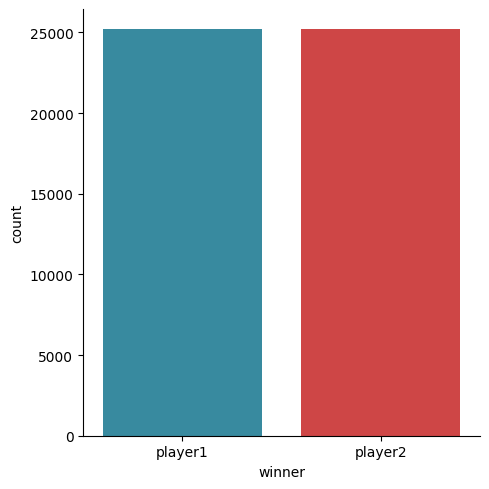

In [193]:
sns.catplot(
    data=df_train, 
    x="winner", 
    kind="count", 
    hue="winner", 
    palette={"player1": "#2794B0", "player2": "#E52F2F"}, 
    legend=False, 
    order=["player1", "player2"]
);

Estamos ante un problema completamente balanceado, ya que tenemos el mismo número de muestras para ambas clases. En principio los modelos no deberían tender de forma exagerada a predecir como ganador uno de los dos jugadores, algo que sí podría ocurrir en un problema más desbalanceado. Estamos además en un problema donde nuestro objetivo es predecir correctamente el mayor número de partidas, sin priorizar la reducción de falsos negativos o falsos positivos como sucede muchas veces en clasificación binaria. Es por ello que en este caso `accuracy` puede resultar una métrica más adecuada que `precision` o `recall`.

Vamos a mostrar ahora el número de partidas de cada arena a través de un gráfico de barras horizontal:

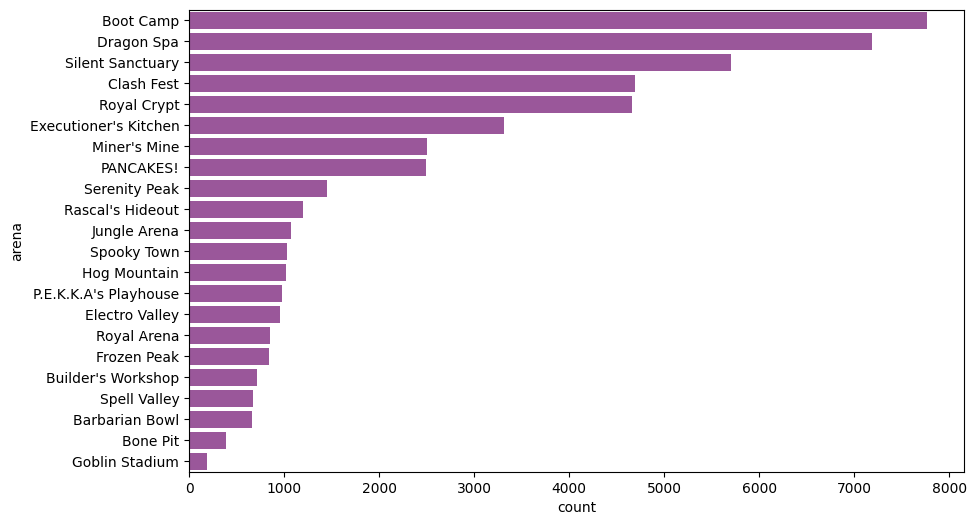

In [194]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_train["arena"].value_counts(), orient="h", color="purple", alpha=0.7)
plt.show()

La mayoría de partidas se han jugado en arenas altas, si bien es cierto que contamos con encuentros en todas a excepción de *Arena Legendaria* (la más alta de todas). Debemos tener en cuenta que hemos obtenido los datos a partir del registro de batalla de jugadores pertenecientes a clanes aleatorios, pero aún así contamos con variedad. El hecho de que la mayoría de ejemplos pertenezcan a arenas altas puede deberse a que la mayoría de jugadores activos se mueven en este rango de copas. Posiblemente no haya partidas en la última arena porque los jugadores que la alcanzan prefieren jugar en el modo *Camino de Leyendas*.

Mostaremos ahora la distribución de nuestra variable temporal:

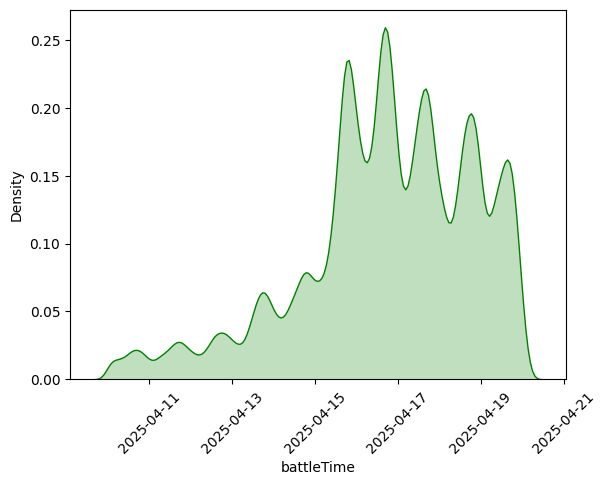

In [195]:
sns.kdeplot(df_train["battleTime"], bw_adjust=0.5, fill=True, color="green")
plt.xticks(rotation=45)
plt.show()

Esta toma valores siempre posteriores al 9 de abril, fecha en la que se produjeron los últimos cambios de balance dentro del juego. Como ya se explicó en la fase anterior, la diferencia temporal entre estas partidas realmente no es relevante porque las condiciones y la jugabilidad no cambia, independientemente del instante temporal en el que se haya jugado cada una desde los cambios de balance. Podemos considerar que todas ellas se han disputado en un mismo periodo, ya que cuentan con la información "actual" del juego y en ningún caso se aprenderán patrones para predecir sobre validación o prueba ejemplos con las condiciones anteriores a este último evento. Por lo tanto, con nuestro conjunto de datos no hace falta seguir pautas concretas para evitar una fuga de datos temporal. Nuestros modelos podrían utilizarse de forma realmente efectiva hasta los próximos cambios de balance o el lanzamiento de una nueva carta, si bien es cierto que no habría problema en seguir utilizándolos después (teniendo en cuenta que se entrenaron antes de los nuevos cambios y podrían ser menos precisos). Lo ideal sería ir entrenando modelos con datos posteriores a los últimos cambios que se pudieran utilizar hasta la próxima actualización, y así sucesivamente en el tiempo.

Adentrándonos en las variables comunes para los dos jugadores, podemos ver cuáles son las cartas que más se usan y las que menos:

In [196]:
player1_cards = df_train.filter(like="player1_has").sum()
player2_cards = df_train.filter(like="player2_has").sum()
player1_cards.index = player1_cards.index.str.replace("player1_has", "").str.replace(r"([a-z])([A-Z])", r"\1 \2", regex=True)
player2_cards.index = player2_cards.index.str.replace("player2_has", "").str.replace(r"([a-z])([A-Z])", r"\1 \2", regex=True)

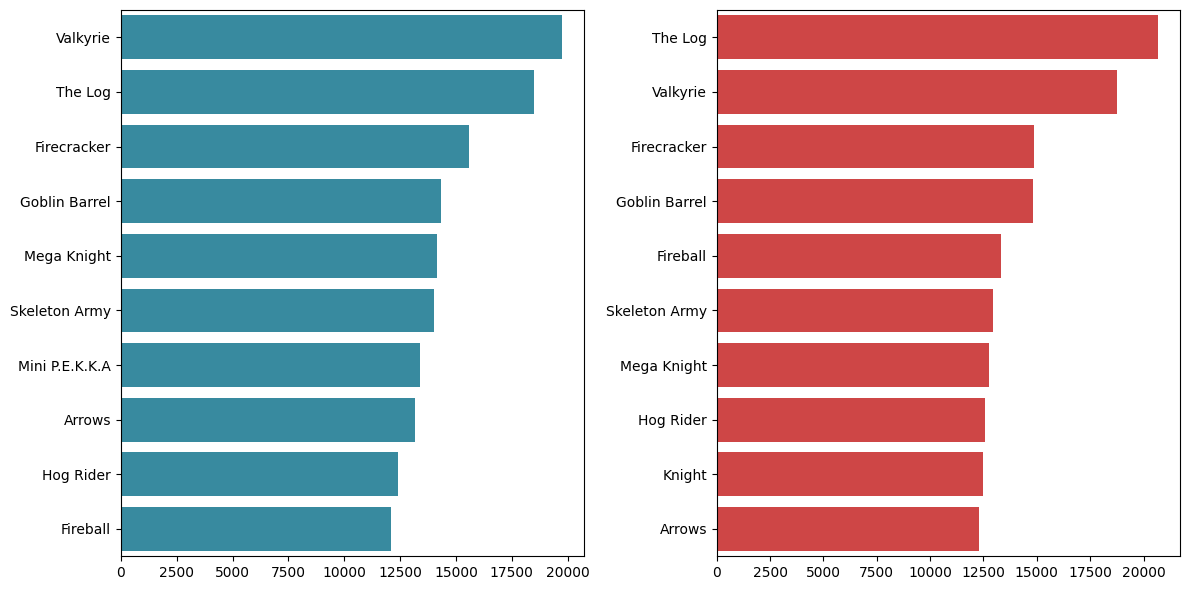

In [197]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=player1_cards.nlargest(10), orient="h", color="#2794B0")

plt.subplot(1, 2, 2)
sns.barplot(data=player2_cards.nlargest(10), orient="h", color="#E52F2F")

plt.tight_layout()
plt.show()

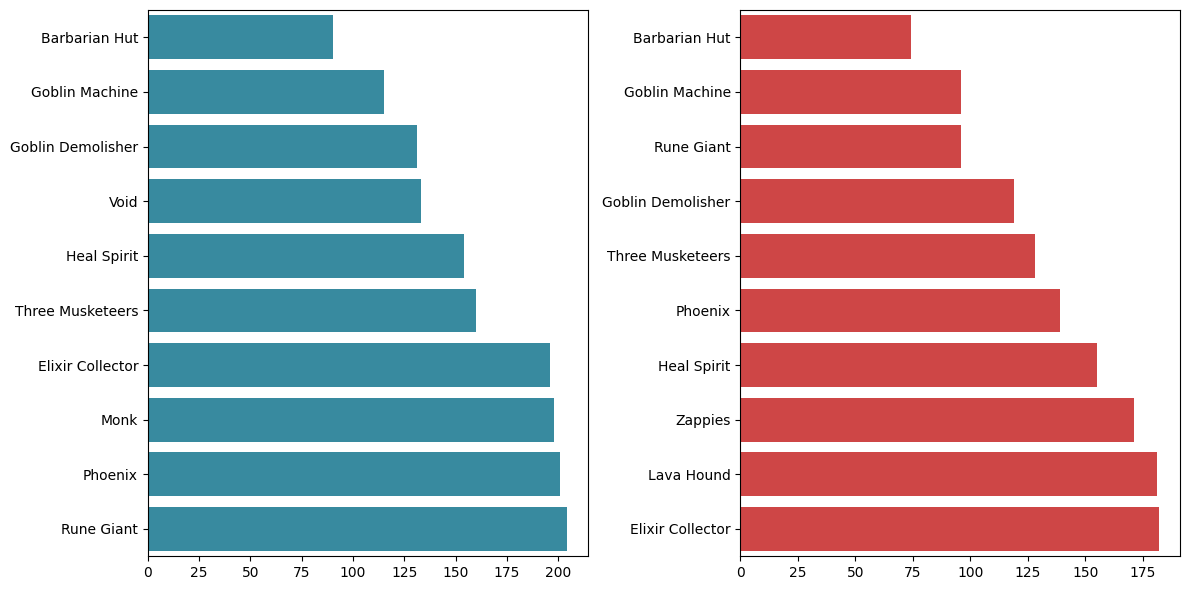

In [198]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=player1_cards.nsmallest(10), orient="h", color="#2794B0")

plt.subplot(1, 2, 2)
sns.barplot(data=player2_cards.nsmallest(10), orient="h", color="#E52F2F")

plt.tight_layout()
plt.show()

Después de hacer el recuento, las cartas más usadas para ambos son muy parecidas. Para las diez menos usadas, hay algunas coincidencias y otras cambian entre jugadores. Llama la atención que la Valquiria y El Tronco se utilizan en más de un tercio de las partidas del conjunto de entrenamiento.

Hacemos lo mismo con la tropa de las torres y su rareza:

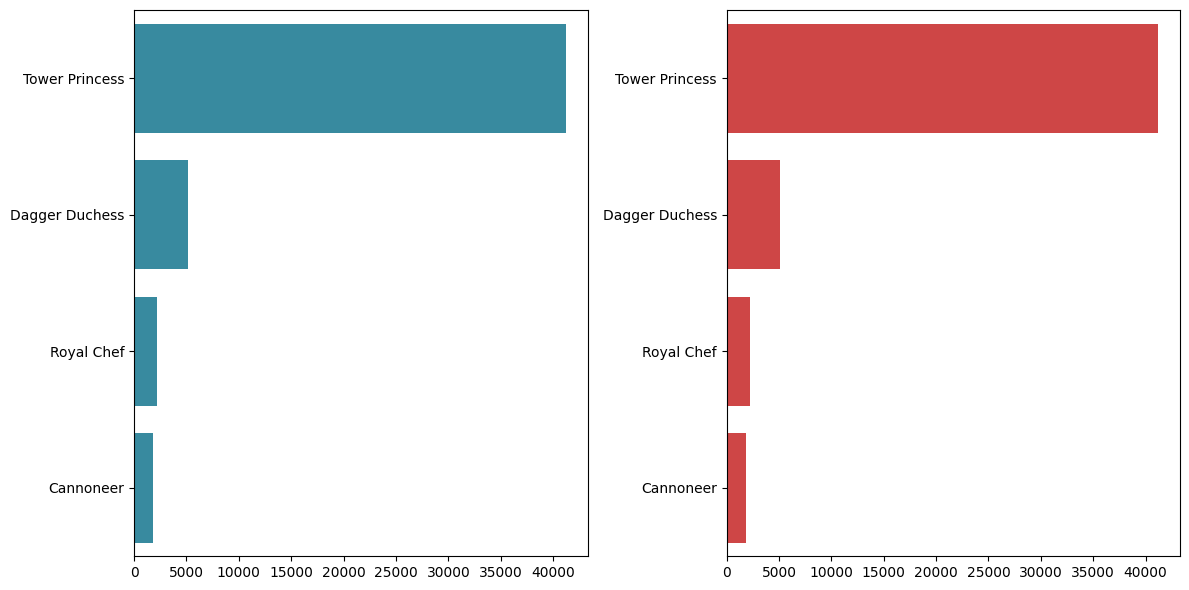

In [199]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df_train["player1_supportCardName"].value_counts(), orient="h", color="#2794B0").set(xlabel=None, ylabel=None)

plt.subplot(1, 2, 2)
sns.barplot(data=df_train["player1_supportCardName"].value_counts(), orient="h", color="#E52F2F").set(xlabel=None, ylabel=None)

plt.tight_layout()
plt.show()

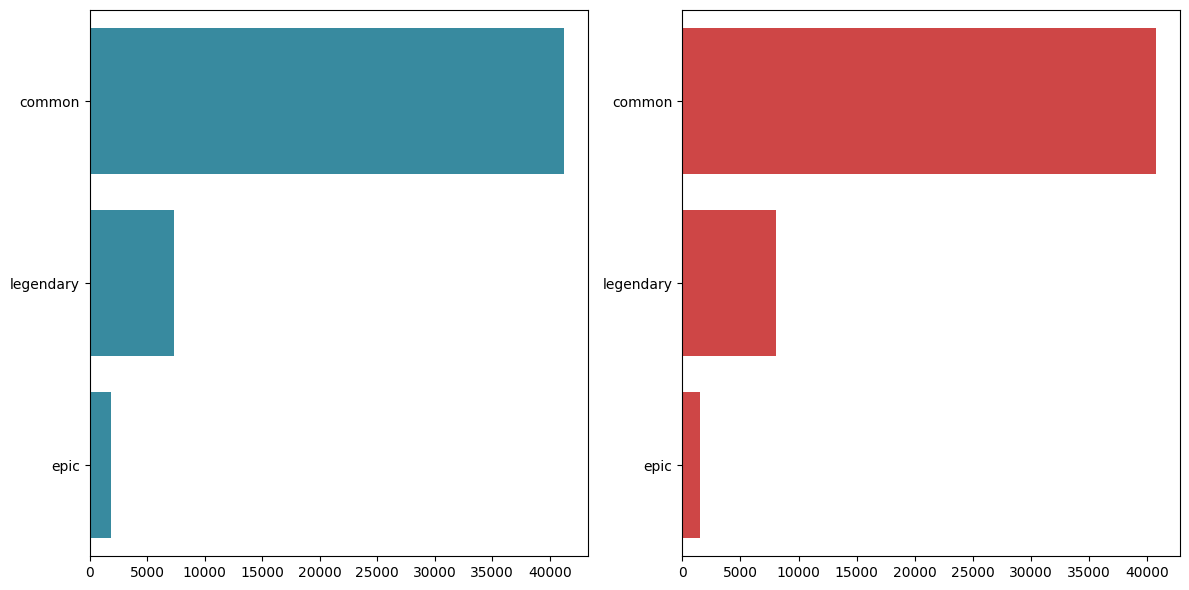

In [200]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df_train["player1_supportCardRarity"].value_counts(), orient="h", color="#2794B0").set(xlabel=None, ylabel=None)

plt.subplot(1, 2, 2)
sns.barplot(data=df_train["player2_supportCardRarity"].value_counts(), orient="h", color="#E52F2F").set(xlabel=None, ylabel=None)

plt.tight_layout()
plt.show()

Se aprecia claramente que la más usada es la princesa. Al haber solamente cuatro cartas, las gráficas de la rareza son equivalentes sumando la frecuencia de las dos legendarias.

Aunque esta fase se limita a la exploración y no se modificará el conjunto de entrenamiento en ningún momento (el preprocesamiento se realizará en la siguiente fase en base a las decisiones que tomemos después de realizar la exploración), podemos comenzar con la ingeniería de características para estudiar nuevas posibilidades y tomar mejores decisiones. Hemos visto que tenemos las mismas variables para ambos jugadores, por lo que podemos hacer la diferencia (`player1_X - player2_X`) para medir la ventaja respecto a cada variable. Si el resultado es positivo, significará que el valor es mayor para el primer jugador y viceversa.

A continuación se va a mostrar mediante un histograma la distribución de todas las variables para ambos jugadores, así como la distribución de la diferencia entre cada par equivalente. Para las variables que pueden tomar un número reducido de valores (por ejemplo, el número de cartas de 0 a 8 con una propiedad determinada), se utilizará `discrete=True` para que las gráficas sean más descriptivas.

Además, esto nos servirá para evaluar cómo de sensible es el sistema de *matchmaking* respecto a las diferentes variables. Como contamos con un gran número de ellas, sólo se van a añadir comentarios para algunas de ellas y también al final.

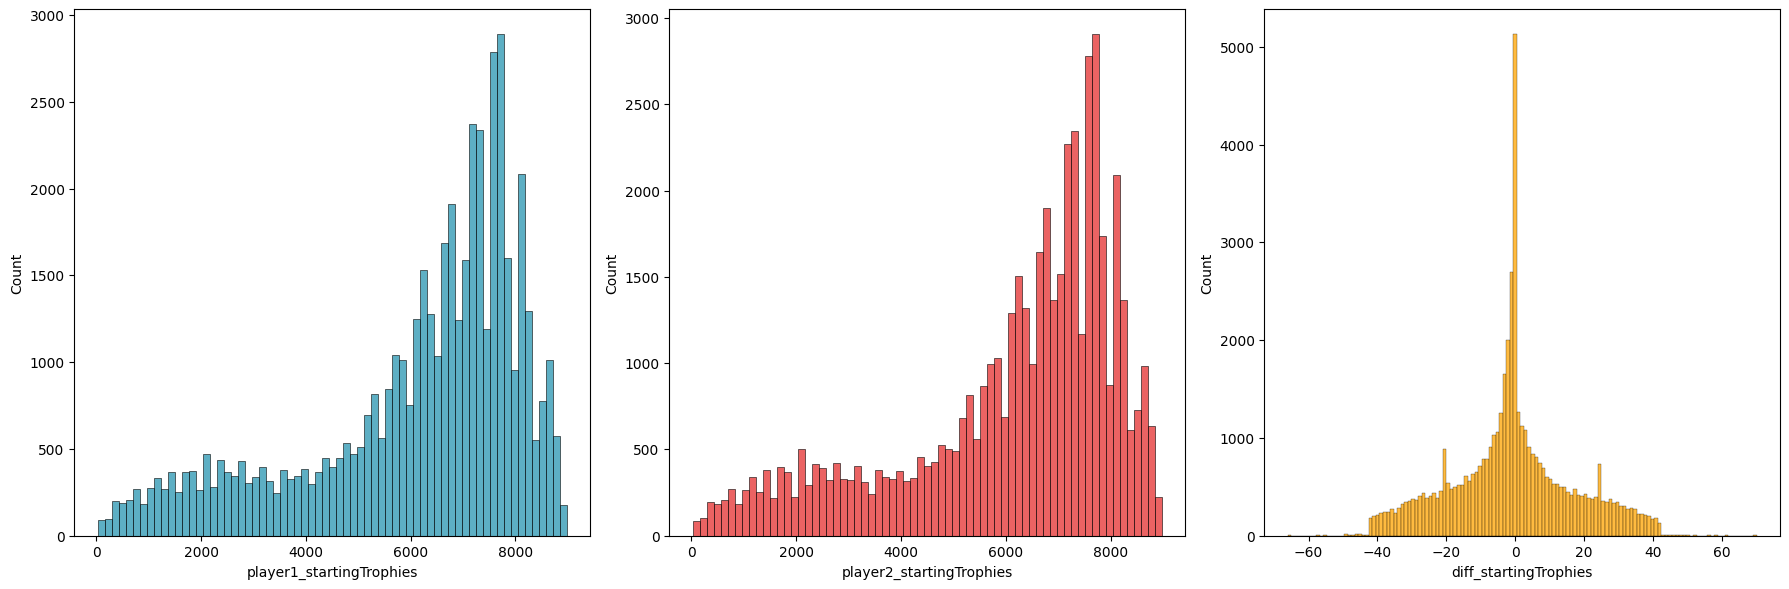

In [201]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_startingTrophies"], color="#2794B0")

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_startingTrophies"], color="#E52F2F")

plt.subplot(1, 3, 3)
diff_starting_trophies = df_train["player1_startingTrophies"] - df_train["player2_startingTrophies"]
sns.histplot(diff_starting_trophies, color="orange").set(xlabel="diff_startingTrophies")

plt.tight_layout()
plt.show()

La diferencia en los trofeos es mínima, ya que estamios trabajando con partidas de *Ladder* y el sistema de *matchmaking* empareja a jugadores en el mismo rango. Esta no supera las tres victorias de diferencia (unas 30 copas por partida).

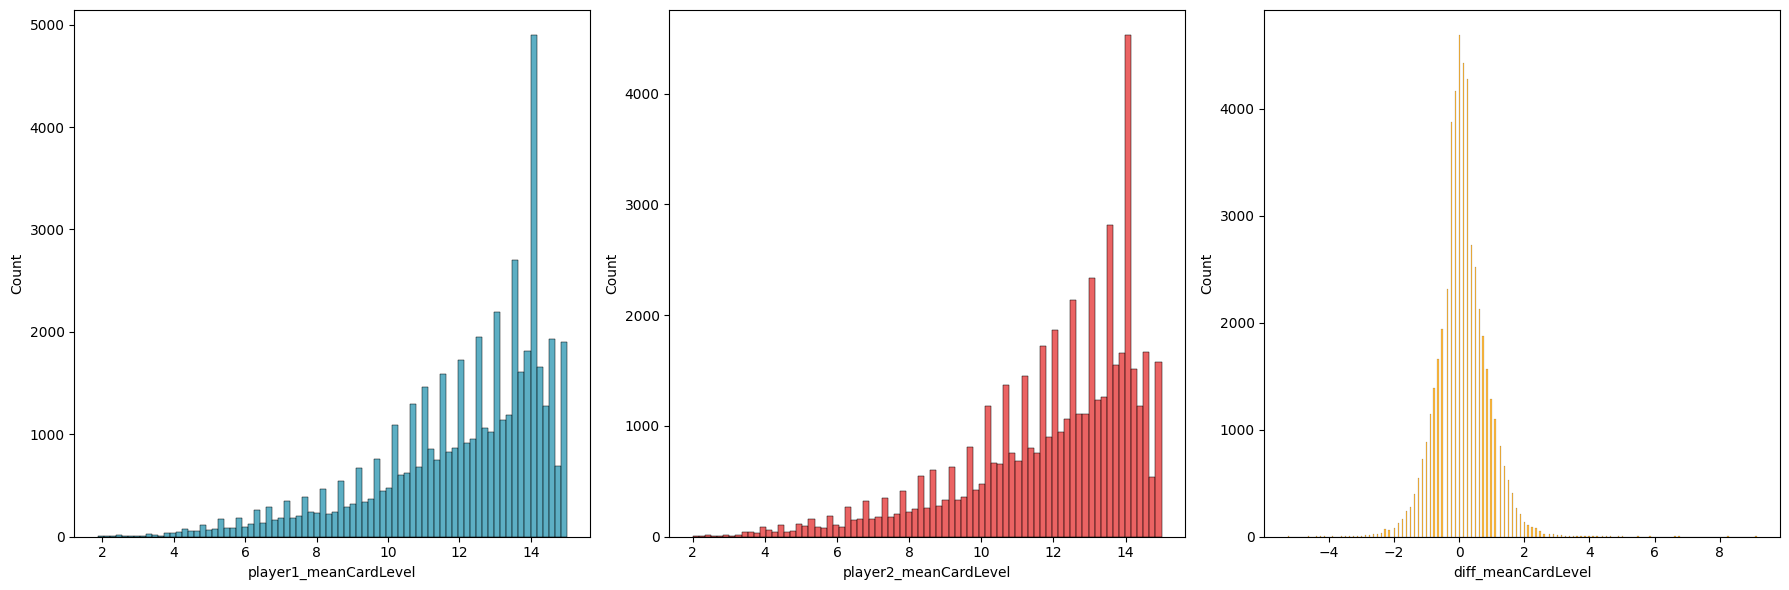

In [202]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_meanCardLevel"], color="#2794B0")

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_meanCardLevel"], color="#E52F2F")

plt.subplot(1, 3, 3)
diff_mean_card_level = df_train["player1_meanCardLevel"] - df_train["player2_meanCardLevel"]
sns.histplot(diff_mean_card_level, color="orange").set(xlabel="diff_meanCardLevel")

plt.tight_layout()
plt.show()

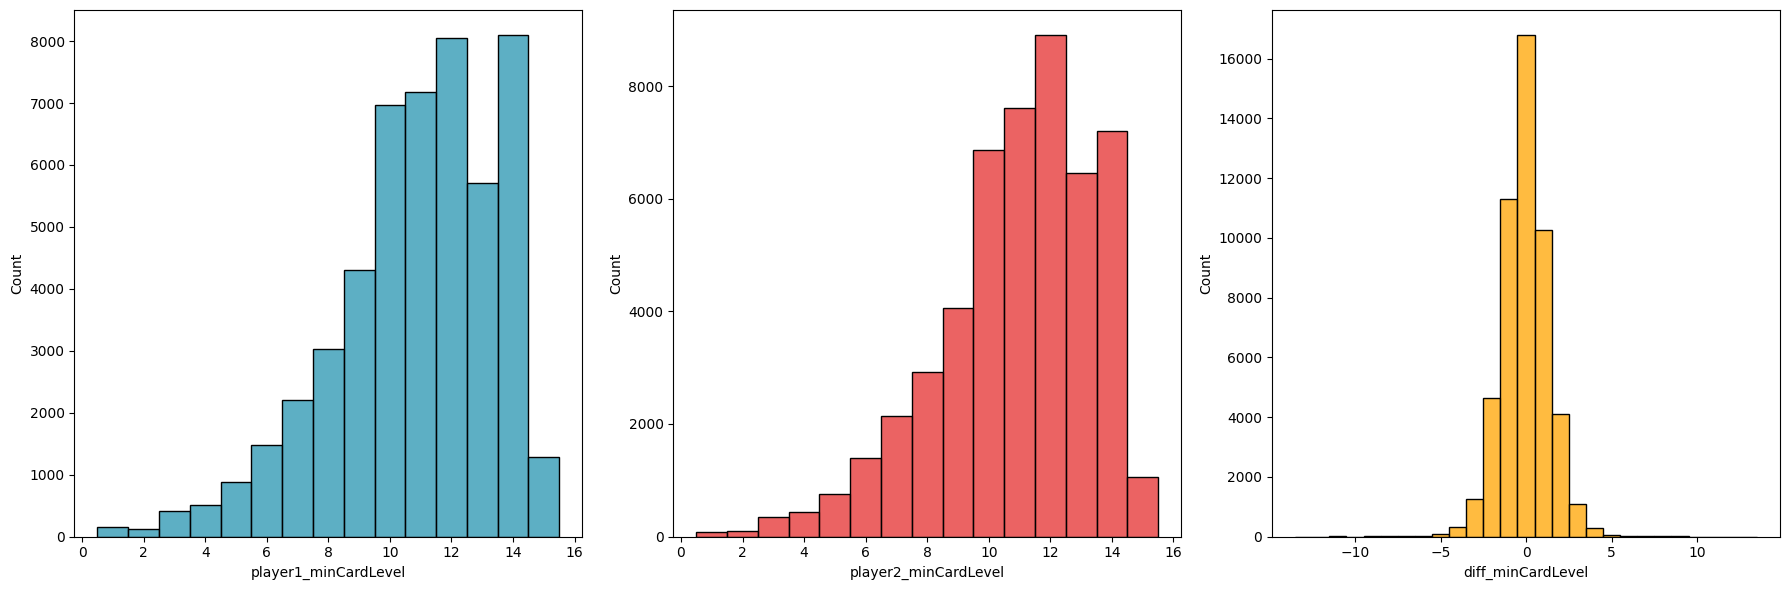

In [203]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_minCardLevel"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_minCardLevel"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_min_card_level = df_train["player1_minCardLevel"] - df_train["player2_minCardLevel"]
sns.histplot(diff_min_card_level, color="orange", discrete=True).set(xlabel="diff_minCardLevel")

plt.tight_layout()
plt.show()

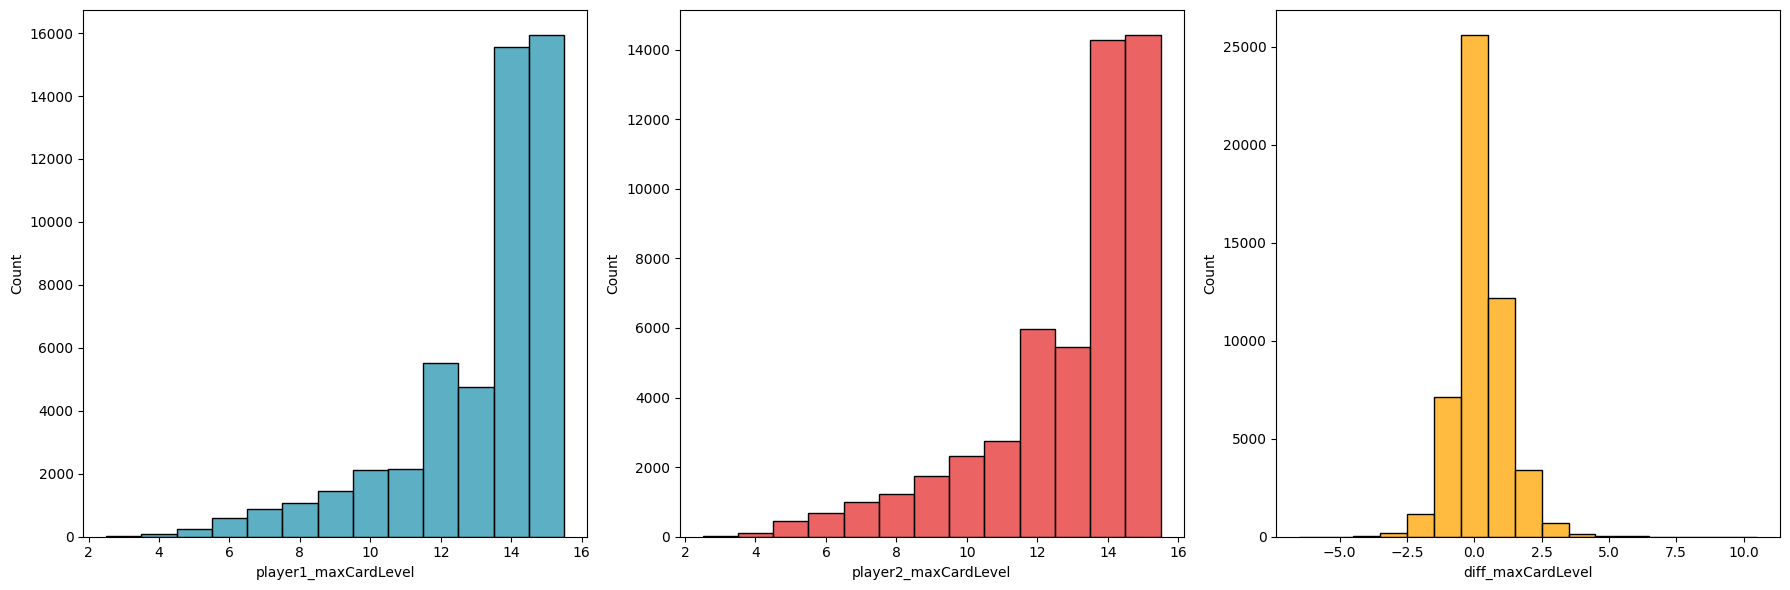

In [204]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_maxCardLevel"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_maxCardLevel"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_max_card_level = df_train["player1_maxCardLevel"] - df_train["player2_maxCardLevel"]
sns.histplot(diff_max_card_level, color="orange", discrete=True).set(xlabel="diff_maxCardLevel")

plt.tight_layout()
plt.show()

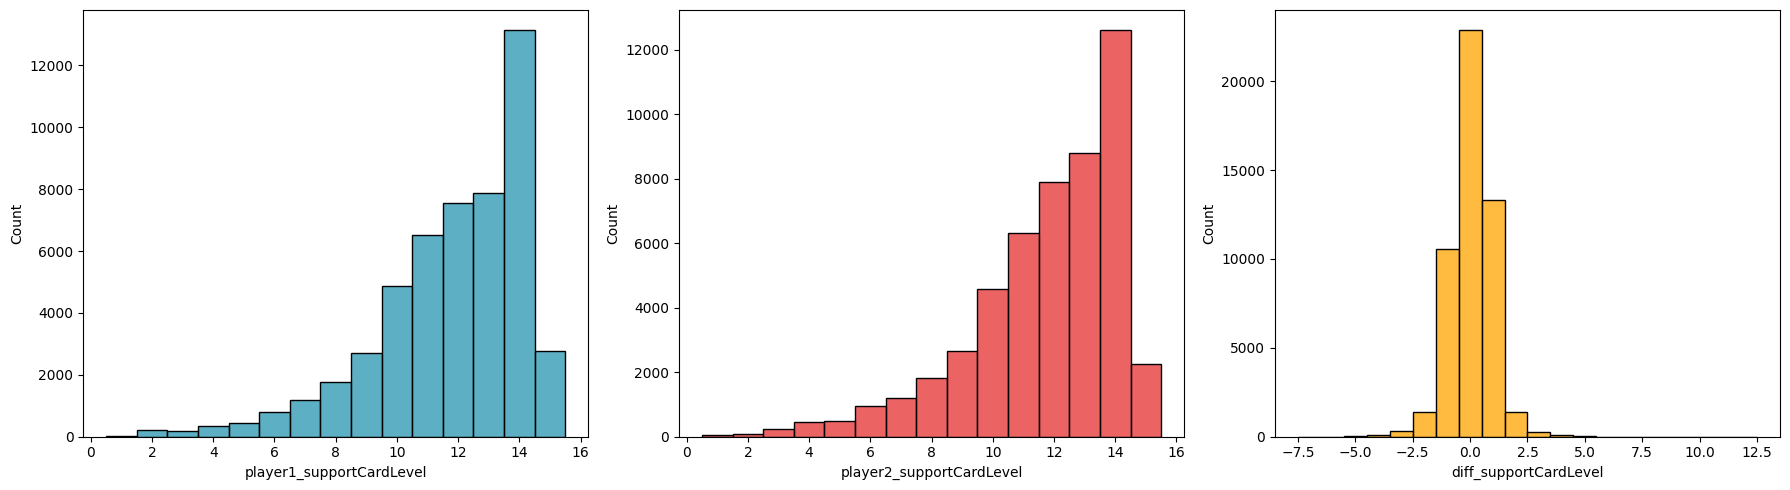

In [205]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_supportCardLevel"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_supportCardLevel"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_support_card_level = df_train["player1_supportCardLevel"] - df_train["player2_supportCardLevel"]
sns.histplot(diff_support_card_level, color="orange", discrete=True).set(xlabel="diff_supportCardLevel")

plt.tight_layout()
plt.show()

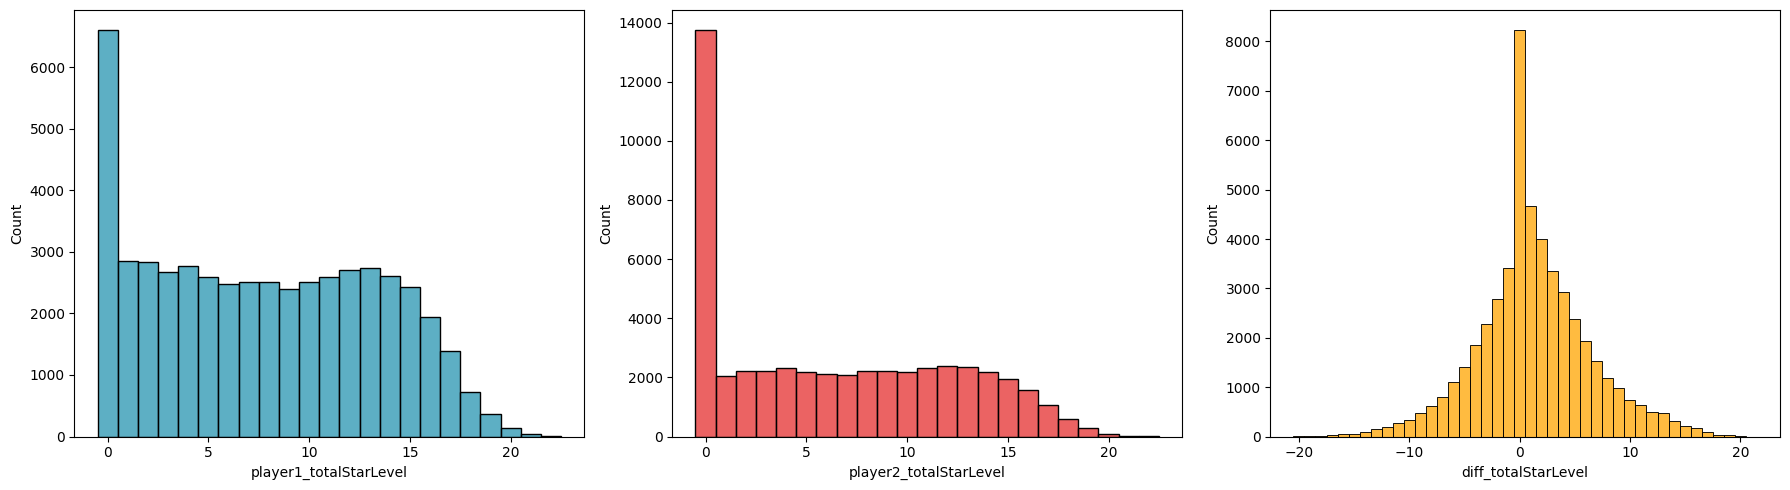

In [206]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_totalStarLevel"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_totalStarLevel"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_total_star_level = df_train["player1_totalStarLevel"] - df_train["player2_totalStarLevel"]
sns.histplot(diff_total_star_level, color="orange", discrete=True).set(xlabel="diff_totalStarLevel")

plt.tight_layout()
plt.show()

Los puntos estelares totales del mazo son mayores para el primer jugador, a diferencia de otras variables para las que las distribuciones son más parecidas.

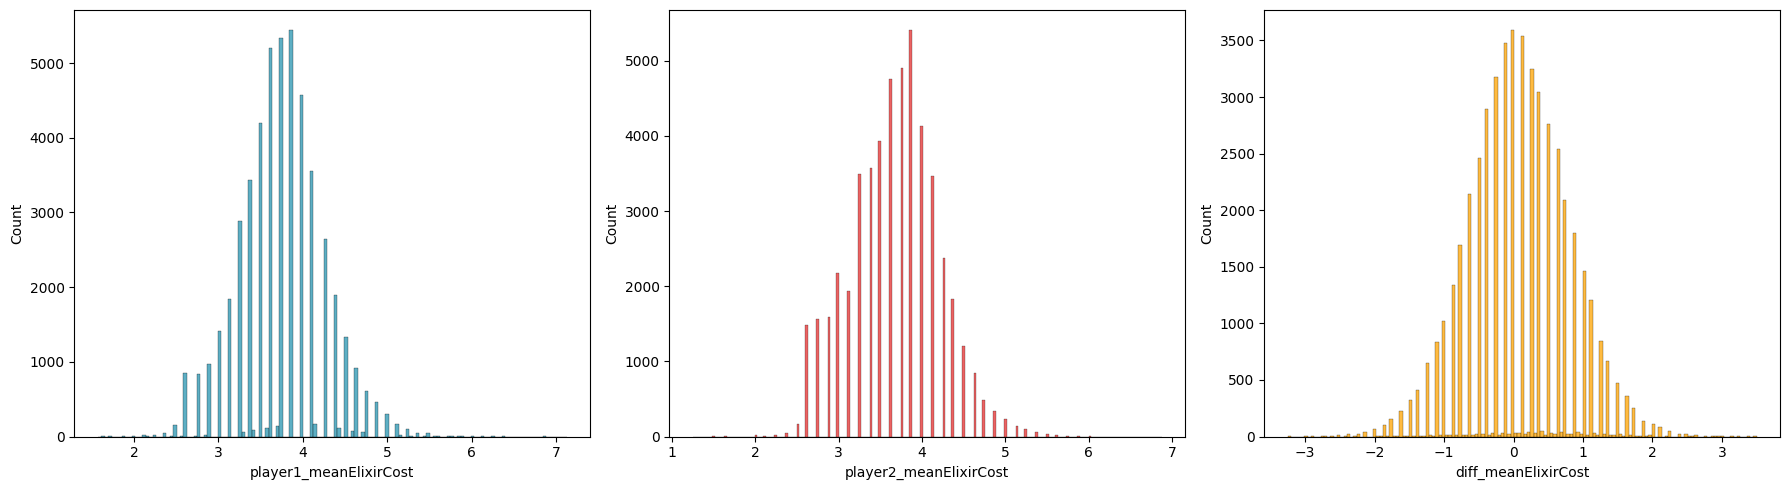

In [207]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_meanElixirCost"], color="#2794B0")

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_meanElixirCost"], color="#E52F2F")

plt.subplot(1, 3, 3)
diff_mean_elixir_cost = df_train["player1_meanElixirCost"] - df_train["player2_meanElixirCost"]
sns.histplot(diff_mean_elixir_cost, color="orange").set(xlabel="diff_meanElixirCost")

plt.tight_layout()
plt.show()

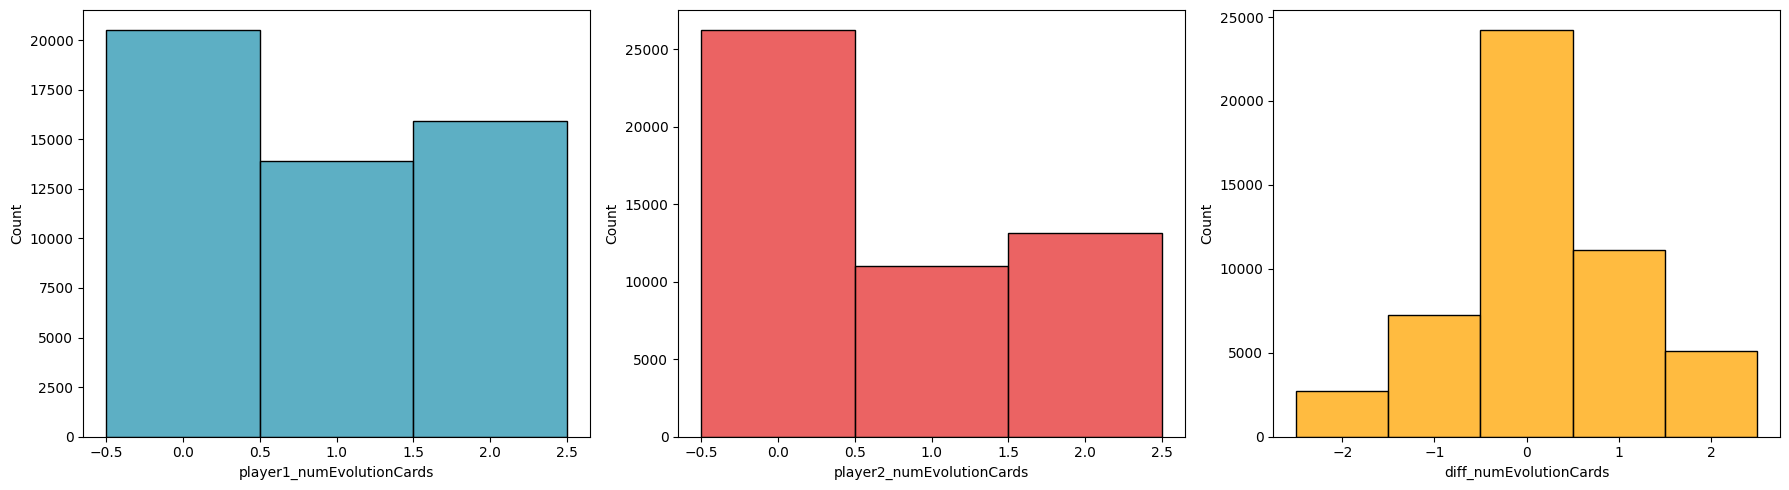

In [208]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numEvolutionCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numEvolutionCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_evolution_cards = df_train["player1_numEvolutionCards"] - df_train["player2_numEvolutionCards"]
sns.histplot(diff_num_evolution_cards, color="orange", discrete=True).set(xlabel="diff_numEvolutionCards")

plt.tight_layout()
plt.show()

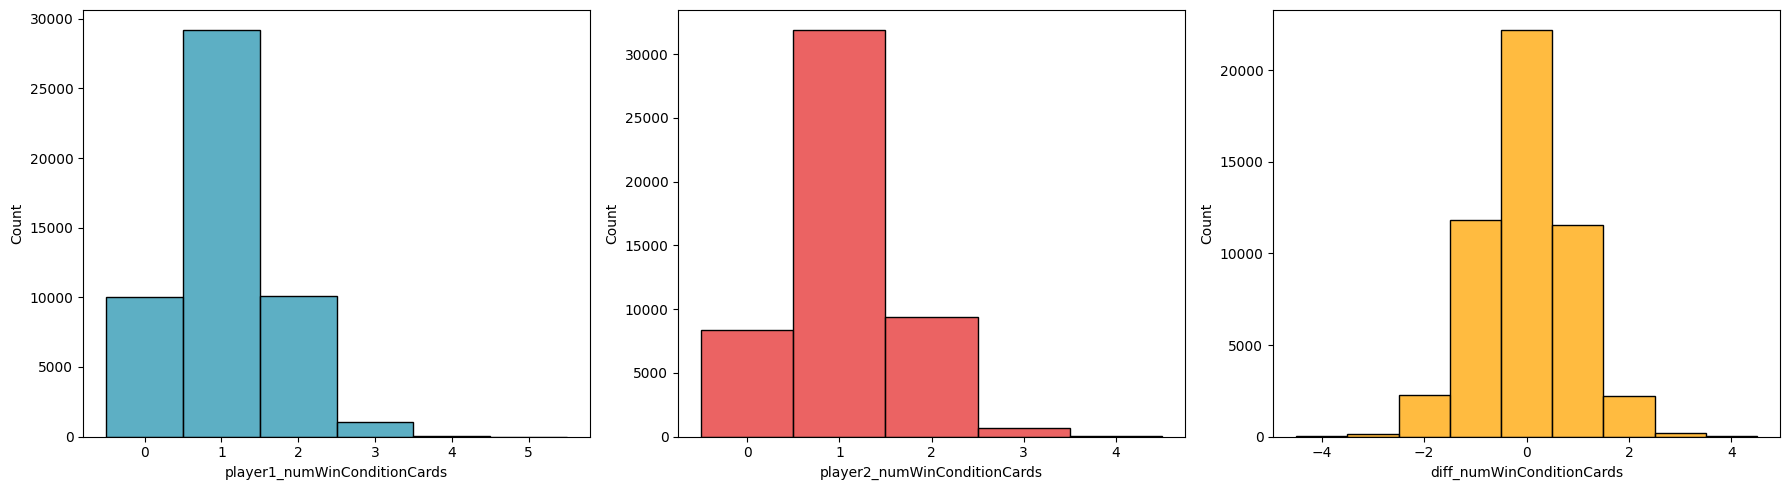

In [209]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numWinConditionCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numWinConditionCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_win_condition_cards = df_train["player1_numWinConditionCards"] - df_train["player2_numWinConditionCards"]
sns.histplot(diff_num_win_condition_cards, color="orange", discrete=True).set(xlabel="diff_numWinConditionCards")

plt.tight_layout()
plt.show()

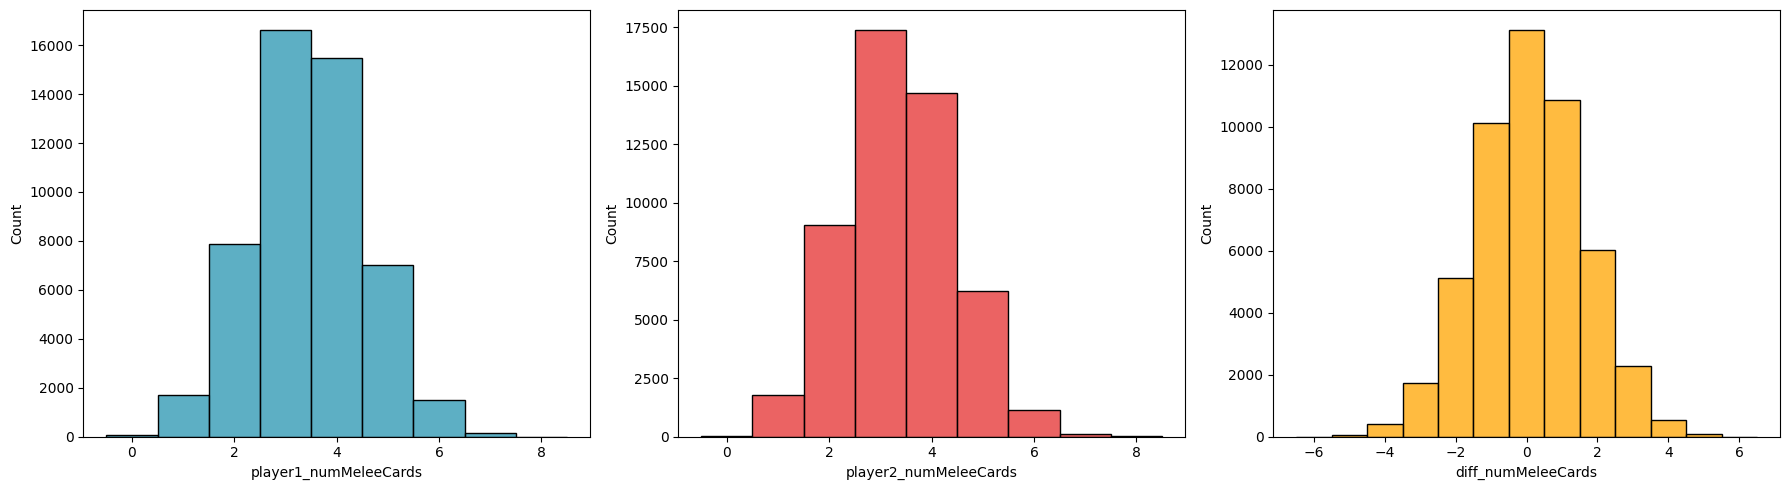

In [210]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numMeleeCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numMeleeCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_melee_cards = df_train["player1_numMeleeCards"] - df_train["player2_numMeleeCards"]
sns.histplot(diff_num_melee_cards, color="orange", discrete=True).set(xlabel="diff_numMeleeCards")

plt.tight_layout()
plt.show()

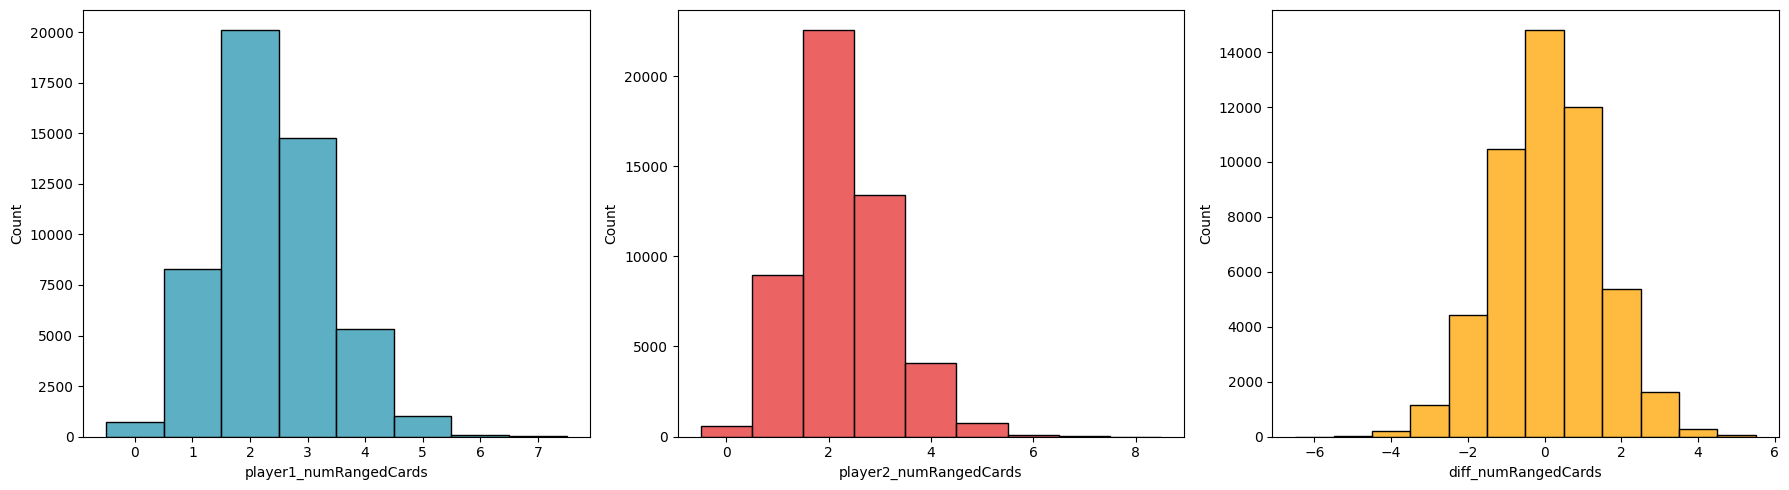

In [211]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numRangedCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numRangedCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_ranged_cards = df_train["player1_numRangedCards"] - df_train["player2_numRangedCards"]
sns.histplot(diff_num_ranged_cards, color="orange", discrete=True).set(xlabel="diff_numRangedCards")

plt.tight_layout()
plt.show()

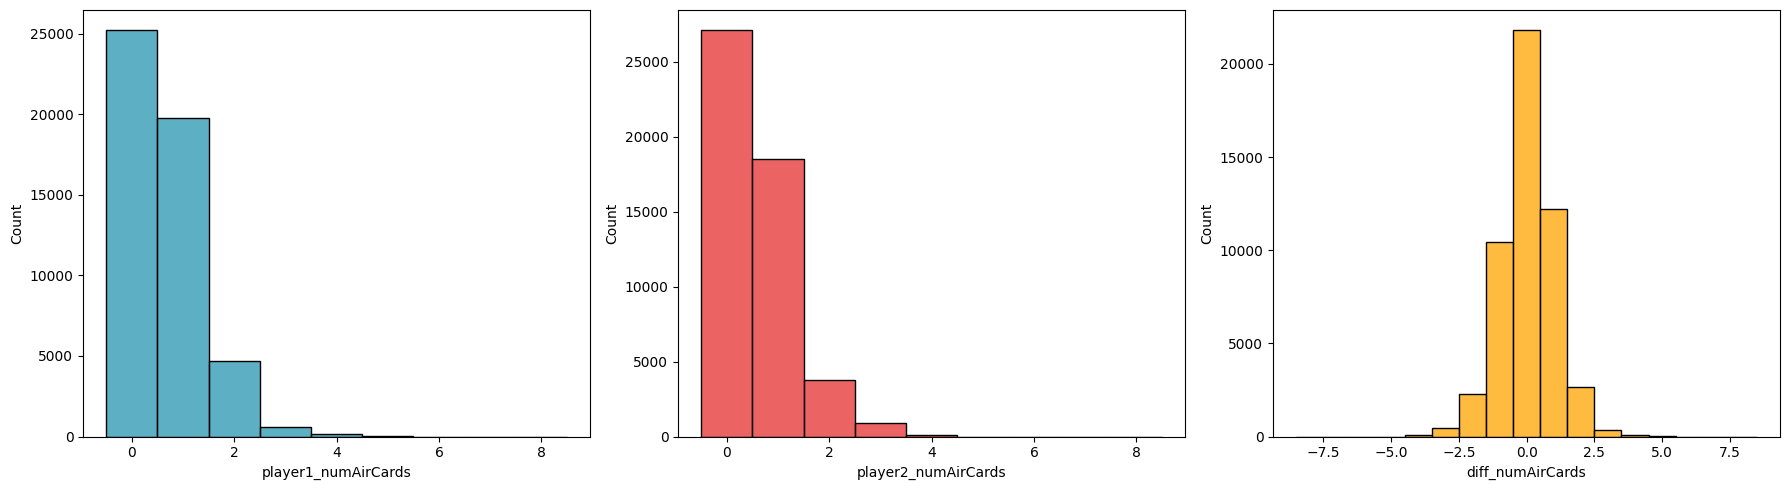

In [212]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numAirCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numAirCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_air_cards = df_train["player1_numAirCards"] - df_train["player2_numAirCards"]
sns.histplot(diff_num_air_cards, color="orange", discrete=True).set(xlabel="diff_numAirCards")

plt.tight_layout()
plt.show()

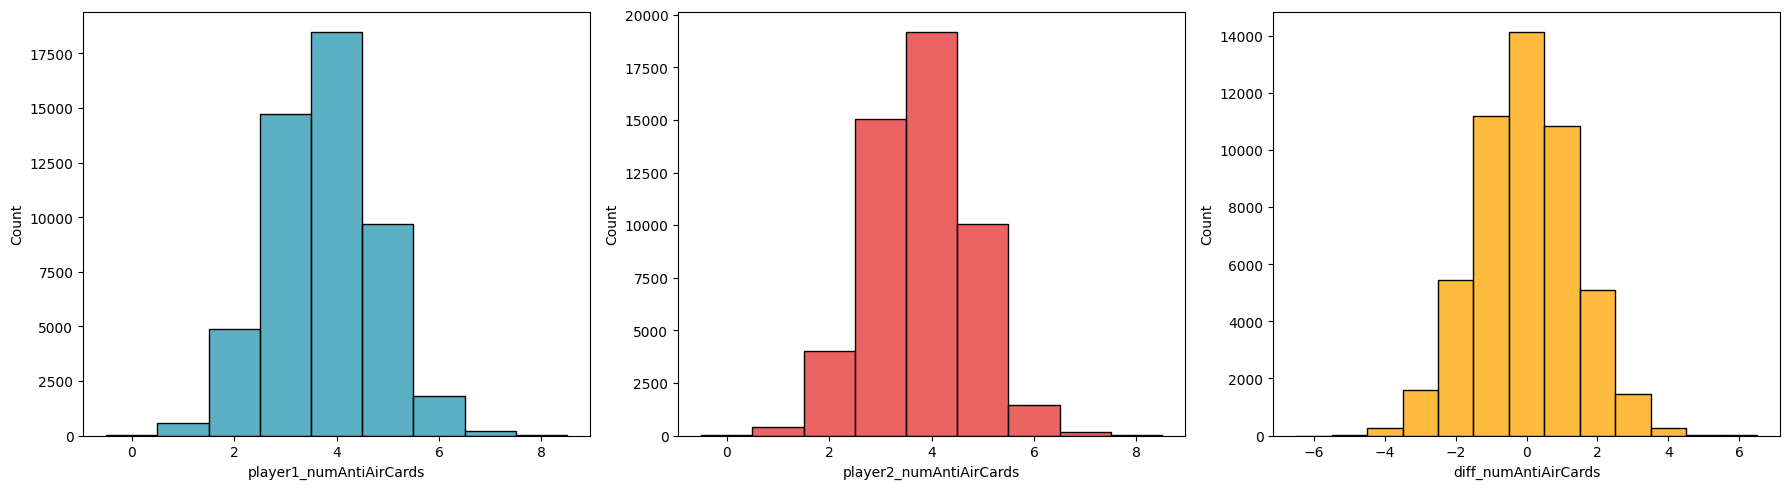

In [213]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numAntiAirCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numAntiAirCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_anti_air_cards = df_train["player1_numAntiAirCards"] - df_train["player2_numAntiAirCards"]
sns.histplot(diff_num_anti_air_cards, color="orange", discrete=True).set(xlabel="diff_numAntiAirCards")

plt.tight_layout()
plt.show()

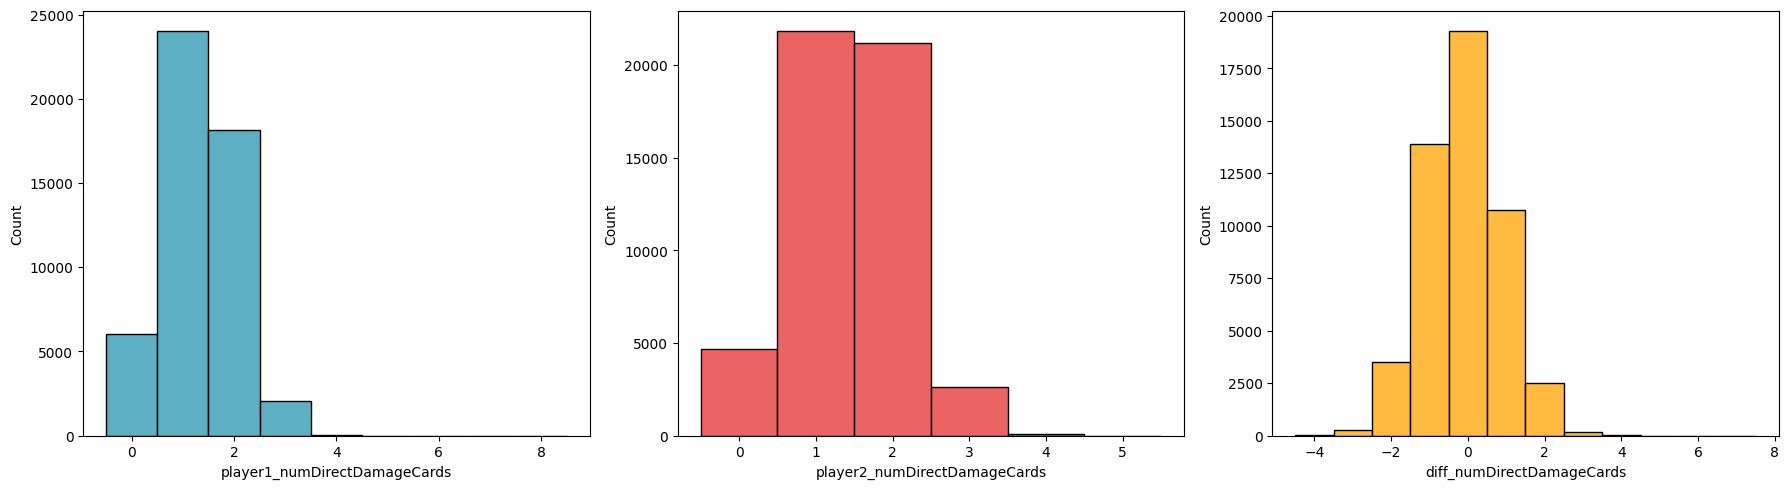

In [214]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numDirectDamageCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numDirectDamageCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_direct_damage_cards = df_train["player1_numDirectDamageCards"] - df_train["player2_numDirectDamageCards"]
sns.histplot(diff_num_direct_damage_cards, color="orange", discrete=True).set(xlabel="diff_numDirectDamageCards")

plt.tight_layout()
plt.show()

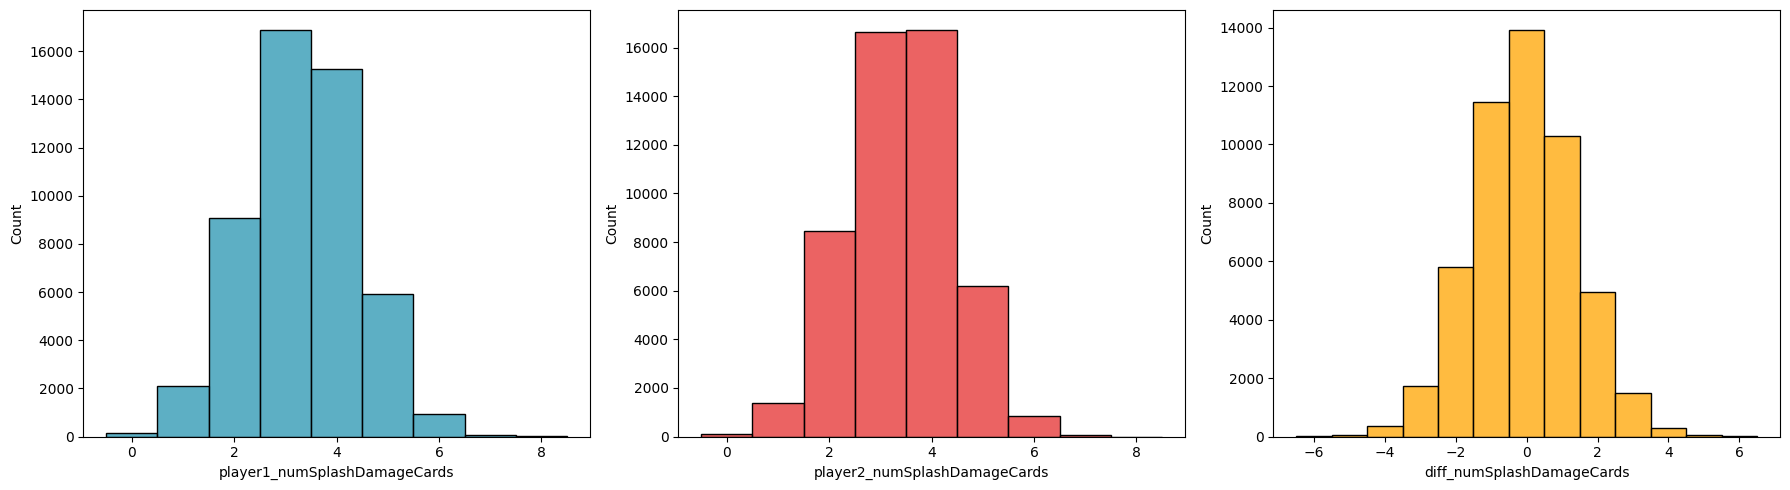

In [215]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numSplashDamageCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numSplashDamageCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_splash_damage_cards = df_train["player1_numSplashDamageCards"] - df_train["player2_numSplashDamageCards"]
sns.histplot(diff_num_splash_damage_cards, color="orange", discrete=True).set(xlabel="diff_numSplashDamageCards")

plt.tight_layout()
plt.show()

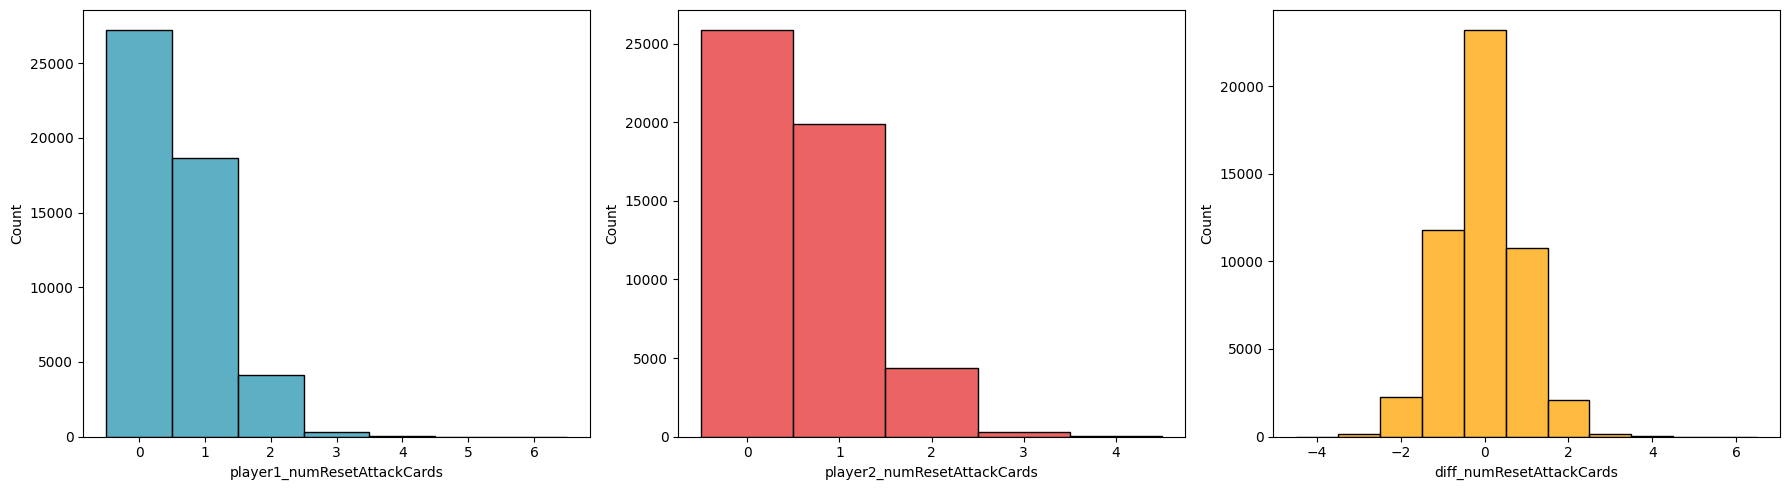

In [216]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numResetAttackCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numResetAttackCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_reset_attack_cards = df_train["player1_numResetAttackCards"] - df_train["player2_numResetAttackCards"]
sns.histplot(diff_num_reset_attack_cards, color="orange", discrete=True).set(xlabel="diff_numResetAttackCards")

plt.tight_layout()
plt.show()

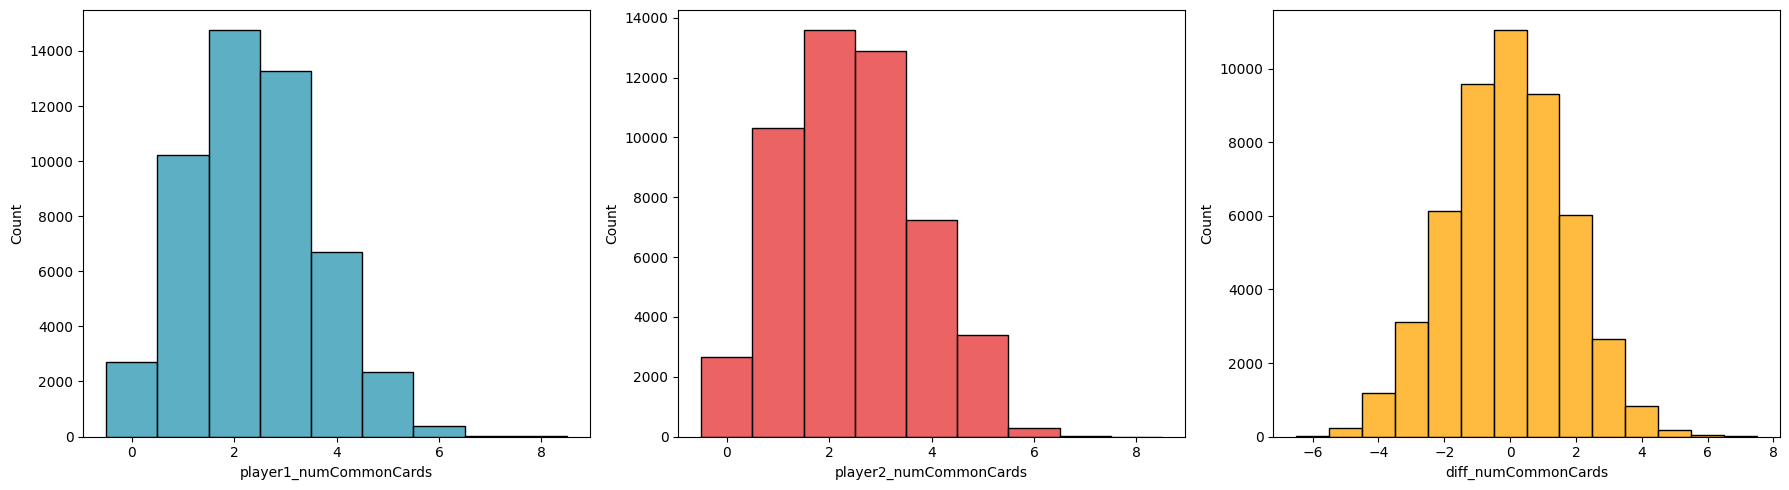

In [217]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numCommonCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numCommonCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_common_cards = df_train["player1_numCommonCards"] - df_train["player2_numCommonCards"]
sns.histplot(diff_num_common_cards, color="orange", discrete=True).set(xlabel="diff_numCommonCards")

plt.tight_layout()
plt.show()

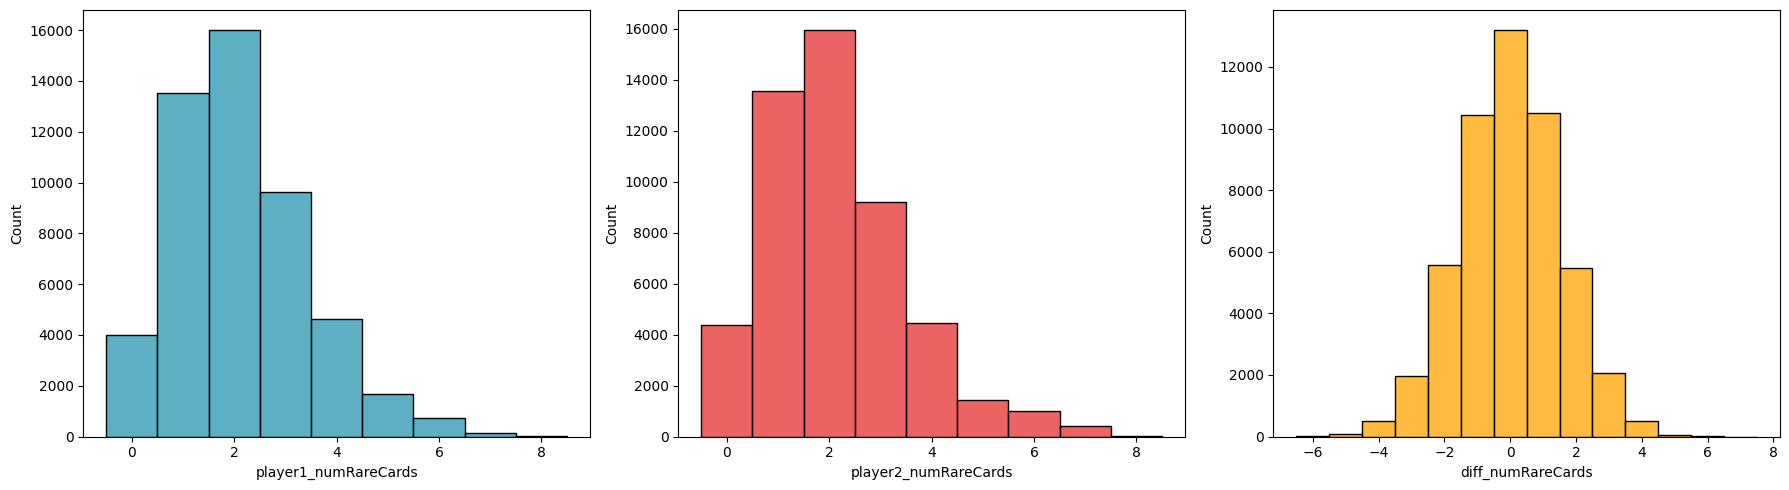

In [218]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numRareCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numRareCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_rare_cards = df_train["player1_numRareCards"] - df_train["player2_numRareCards"]
sns.histplot(diff_num_rare_cards, color="orange", discrete=True).set(xlabel="diff_numRareCards")

plt.tight_layout()
plt.show()

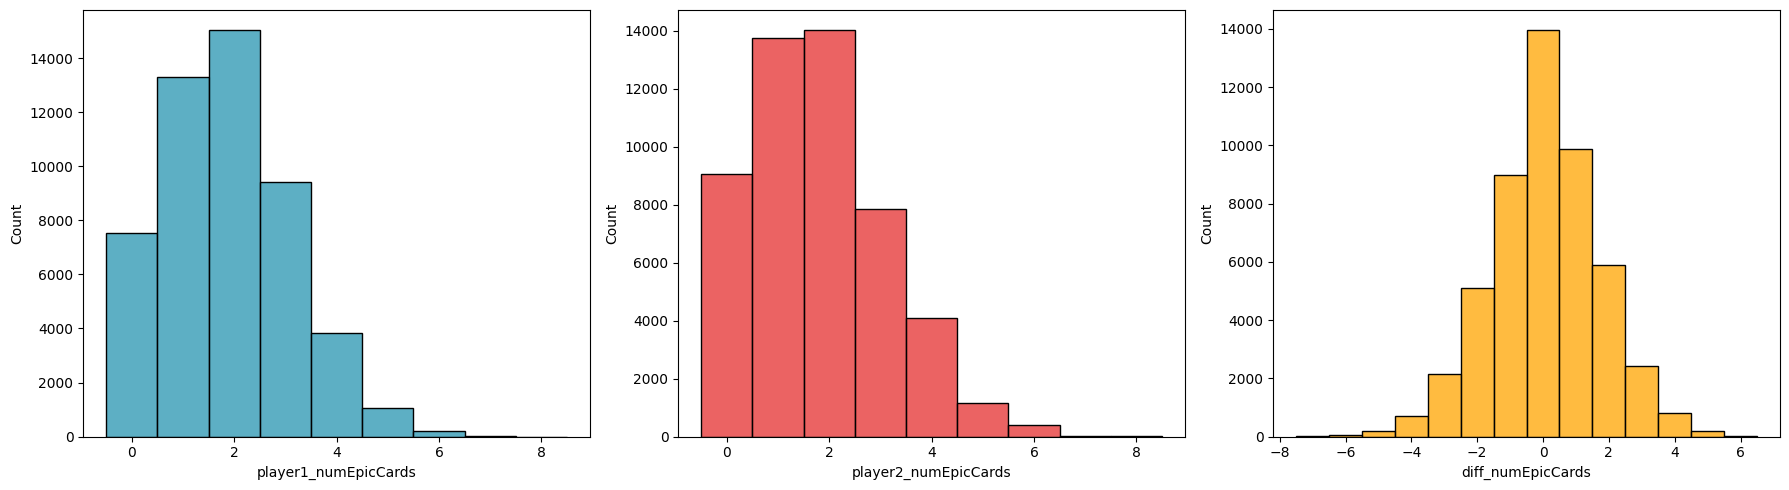

In [219]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numEpicCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numEpicCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_epic_cards = df_train["player1_numEpicCards"] - df_train["player2_numEpicCards"]
sns.histplot(diff_num_epic_cards, color="orange", discrete=True).set(xlabel="diff_numEpicCards")

plt.tight_layout()
plt.show()

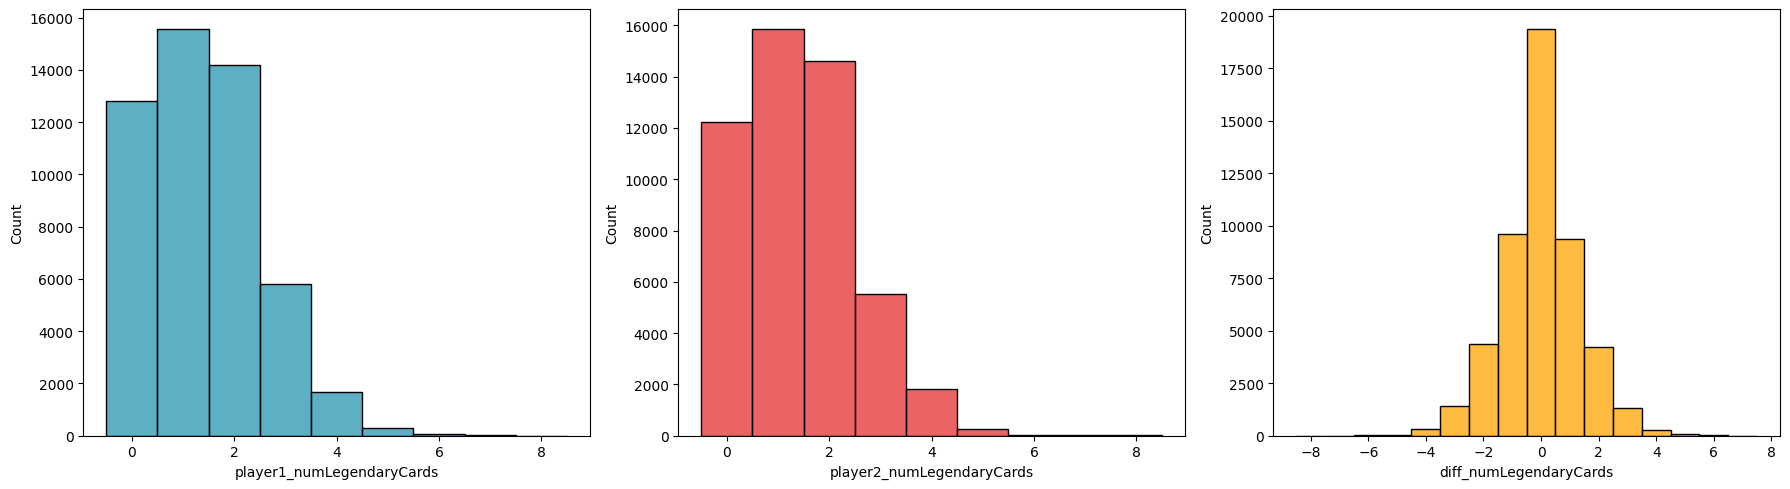

In [220]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numLegendaryCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numLegendaryCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_legendary_cards = df_train["player1_numLegendaryCards"] - df_train["player2_numLegendaryCards"]
sns.histplot(diff_num_legendary_cards, color="orange", discrete=True).set(xlabel="diff_numLegendaryCards")

plt.tight_layout()
plt.show()

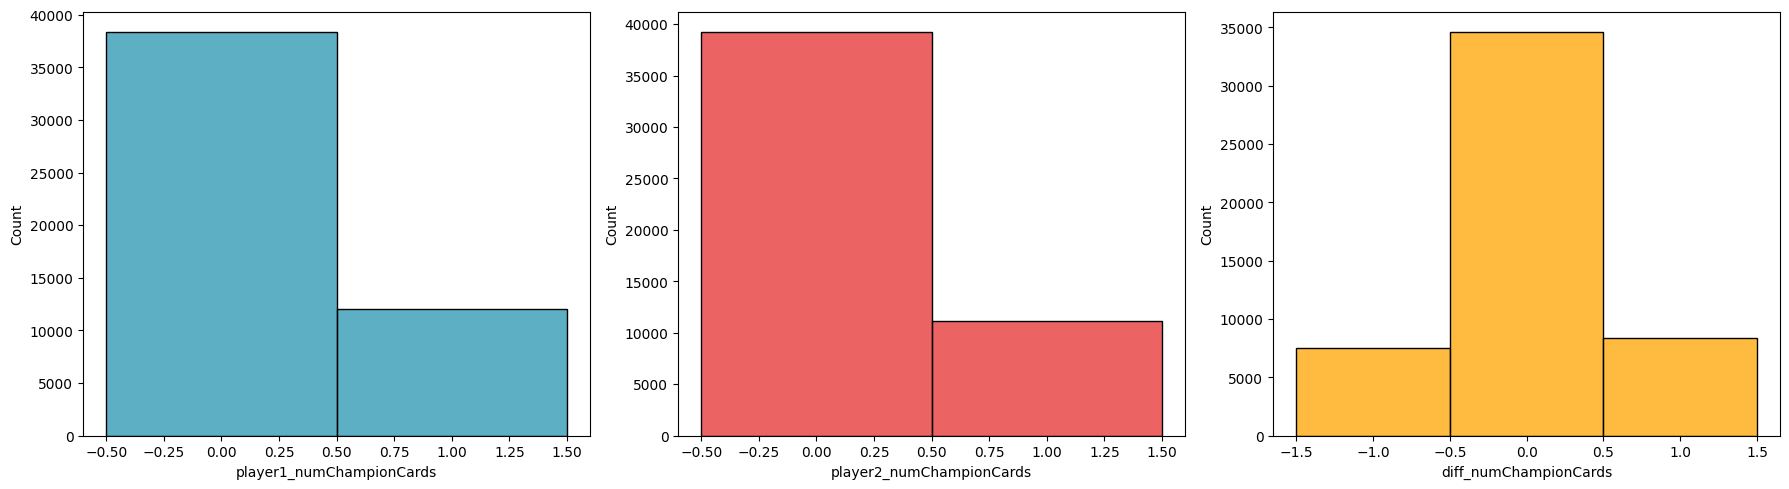

In [221]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numChampionCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numChampionCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_champion_cards = df_train["player1_numChampionCards"] - df_train["player2_numChampionCards"]
sns.histplot(diff_num_champion_cards, color="orange", discrete=True).set(xlabel="diff_numChampionCards")

plt.tight_layout()
plt.show()

No hay partidas con más de un campeón de diferencia. De hecho, como se comentó anteriormente, no hay partidas con más de un campeón por jugador.

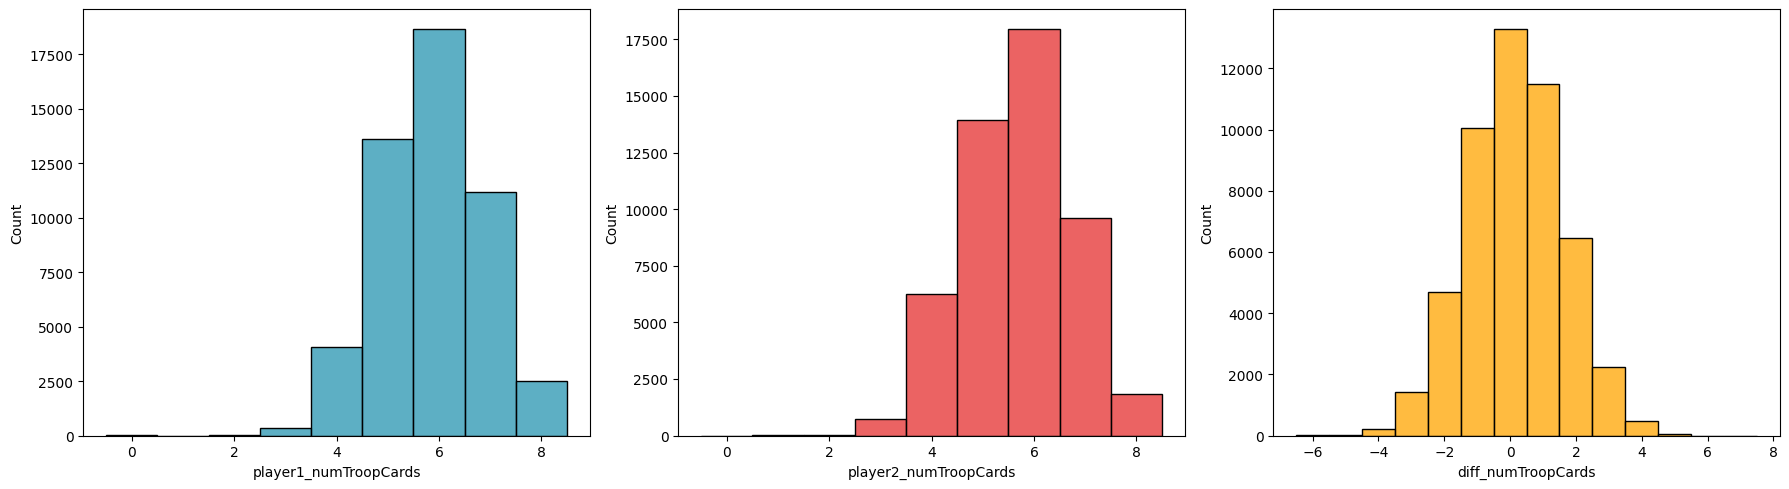

In [222]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numTroopCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numTroopCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_troop_cards = df_train["player1_numTroopCards"] - df_train["player2_numTroopCards"]
sns.histplot(diff_num_troop_cards, color="orange", discrete=True).set(xlabel="diff_numTroopCards")

plt.tight_layout()
plt.show()

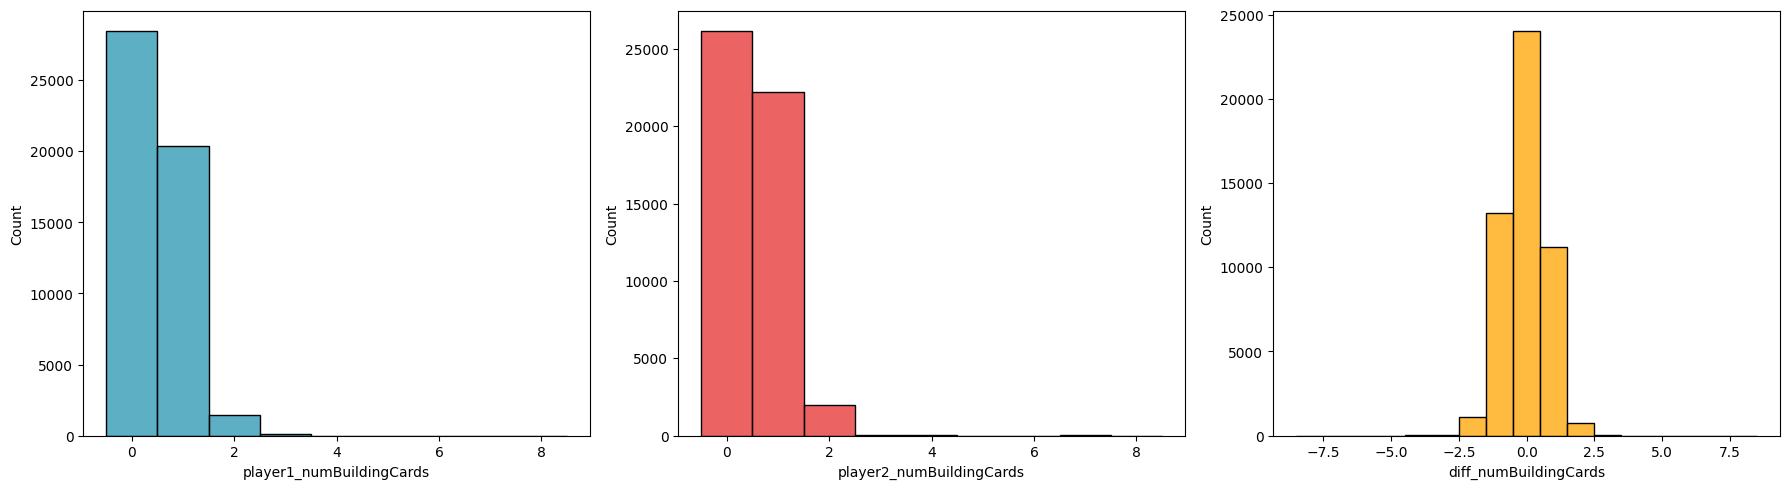

In [223]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numBuildingCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numBuildingCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_building_cards = df_train["player1_numBuildingCards"] - df_train["player2_numBuildingCards"]
sns.histplot(diff_num_building_cards, color="orange", discrete=True).set(xlabel="diff_numBuildingCards")

plt.tight_layout()
plt.show()

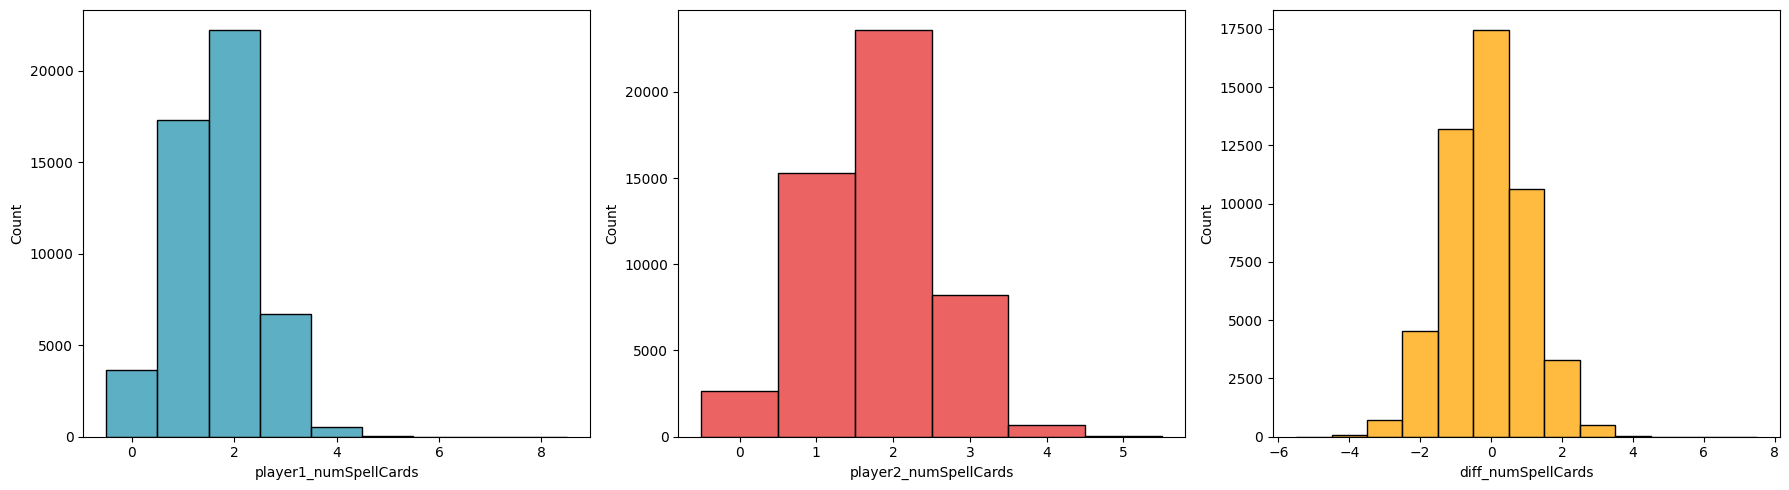

In [224]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numSpellCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numSpellCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_spell_cards = df_train["player1_numSpellCards"] - df_train["player2_numSpellCards"]
sns.histplot(diff_num_spell_cards, color="orange", discrete=True).set(xlabel="diff_numSpellCards")

plt.tight_layout()
plt.show()

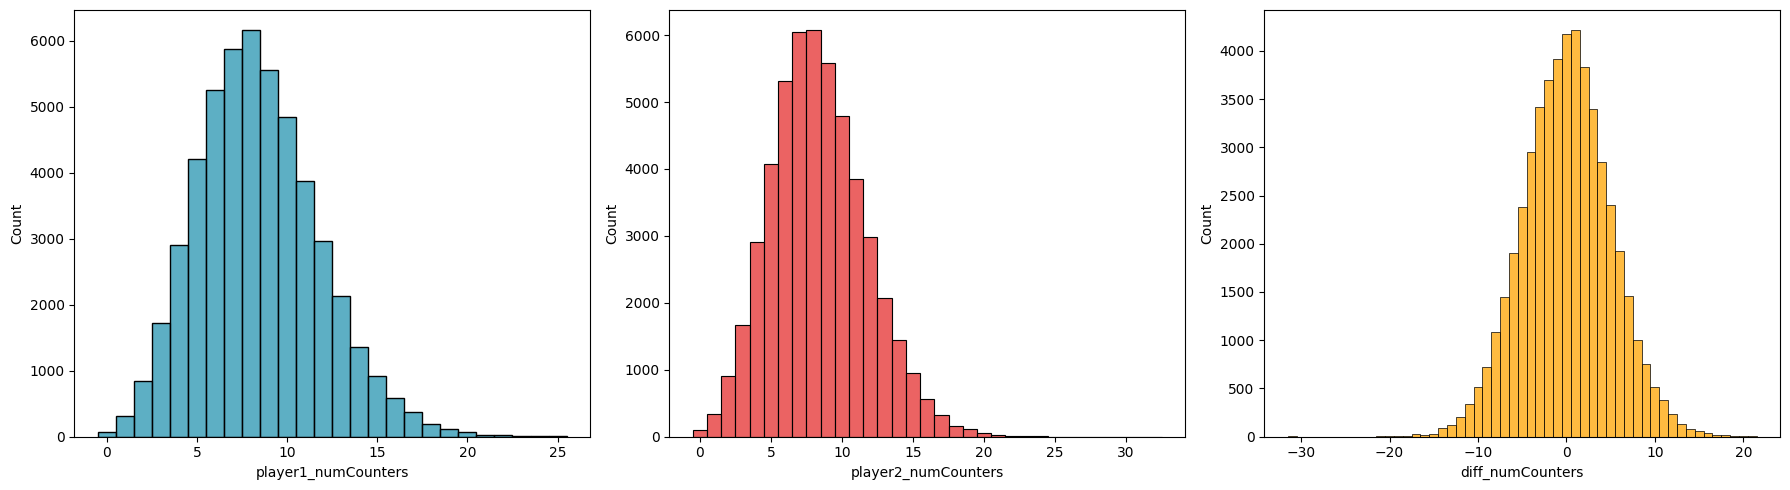

In [225]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numCounters"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numCounters"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_counters = df_train["player1_numCounters"] - df_train["player2_numCounters"]
sns.histplot(diff_num_counters, color="orange", discrete=True).set(xlabel="diff_numCounters")

plt.tight_layout()
plt.show()

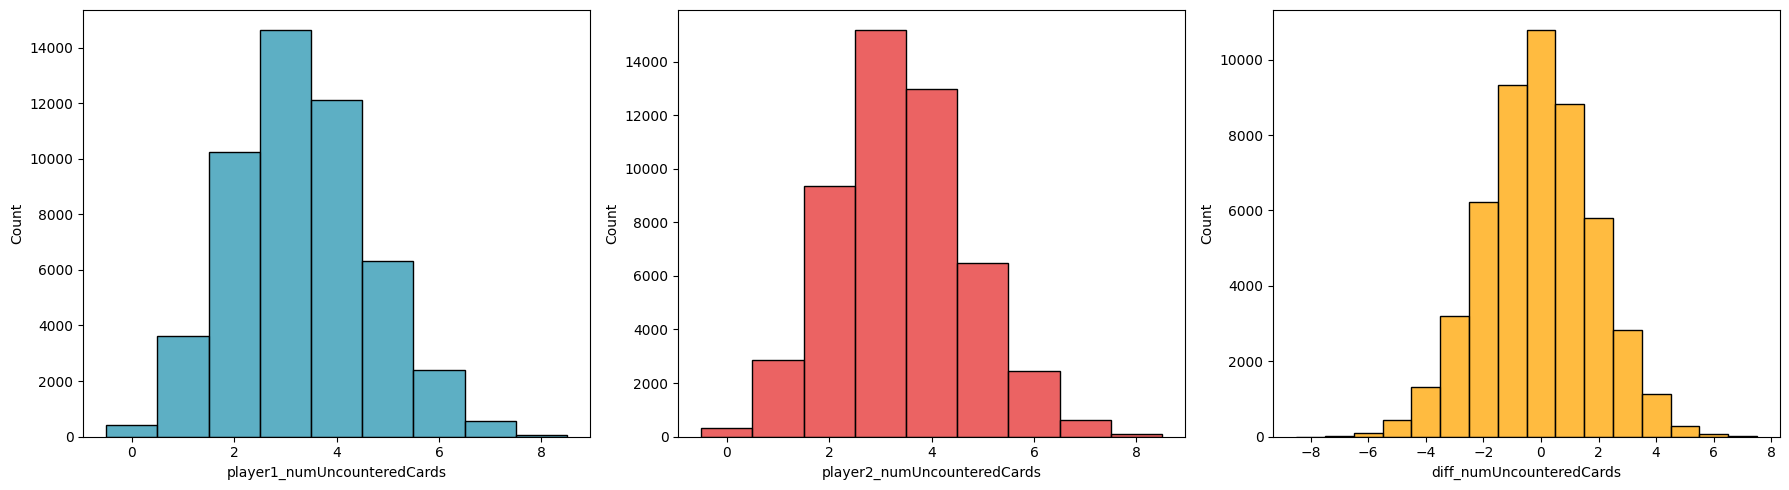

In [226]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["player1_numUncounteredCards"], color="#2794B0", discrete=True)

plt.subplot(1, 3, 2)
sns.histplot(df_train["player2_numUncounteredCards"], color="#E52F2F", discrete=True)

plt.subplot(1, 3, 3)
diff_num_uncountered_cards = df_train["player1_numUncounteredCards"] - df_train["player2_numUncounteredCards"]
sns.histplot(diff_num_uncountered_cards, color="orange", discrete=True).set(xlabel="diff_numUncounteredCards")

plt.tight_layout()
plt.show()

En líneas generales, hemos podido observar que las distribuciones para ambos jugadores son muy similares y que las diferencias tienden a seguir una distribución normal. En algunos casos la desviación es menor (por ejemplo `meanElixirCost` o `meanCardLevel`) y en otros es mayor (por ejemplo, `numAirCards` o `numEvolutionCards`). Esto nos ha permitido comprender mejor los límites que utiliza el *matchmaking* para emparejar en base a distintos factores, así como la frecuencia con la que ocurren estas diferencias entre jugadores.

Además, vamos a explorar la creación de cuatro nuevas variables que podrían aportarnos valor adicional. Analizaremos sus distribuciones, calcularemos la diferencia de estas entre ambos jugadores y estudiaremos también su relación con la variable objetivo y con otras características. Estas son:

* `airAdvantage`: Representa la ventaja aérea y se calcula como la resta entre las cartas aéreas de un jugador y las cartas antiaéreas del otro. Si es positiva significa que el jugador tiene determinada ventaja por aire frente a su rival, mientras que si es negativa significa que esta ventaja no existe y por lo tanto se utiliza un cero. Se puede calcular para ambos jugadores y hacer la resta sin problema porque individualmente siempre será mayor o igual que cero.

* `winConditionAdvantage`: Representa otro posible tipo de ventaja y se calcula como la resta entre las cartas *Win Condition* de un jugador y los edificios del otro. Si es positiva significa que el jugador tiene determinada ventaja porque posee cartas que habitualmente se dirigen directamente a las torres y el rival no tiene el mismo número de edificios para desviarlas, mientras que si es negativa significa que esta ventaja no existe y por lo tanto se utiliza un cero. Se puede calcular para ambos jugadores y hacer la resta sin problema porque individualmente siempre será mayor o igual que cero.

* `rarityScore`: Es una forma de calcular un puntaje a partir de las rarezas de las cartas del mazo. Es cierto que conforme la rareza sube las cartas son más difíciles de conseguir, pero no necesariamente por ello van a combinar mejor. Se quiere explorar la posibilidad de incluir esta variable para mejorar el rendimiento de los modelos por si realmente pudiera llegar a ser un factor relevante. Se puede calcular individualmente y hacer la resta.

* `balanceScore`: Se trata de otro puntaje calculado en base a conocimiento experto. Este mide de algún modo el equilibrio del mazo, sumando puntos a partir de factores esenciales o importantes como tener al menos una carta *Win Condition*, otra con daño directo a torre, etc. Se puede calcular individualmente y hacer la resta.

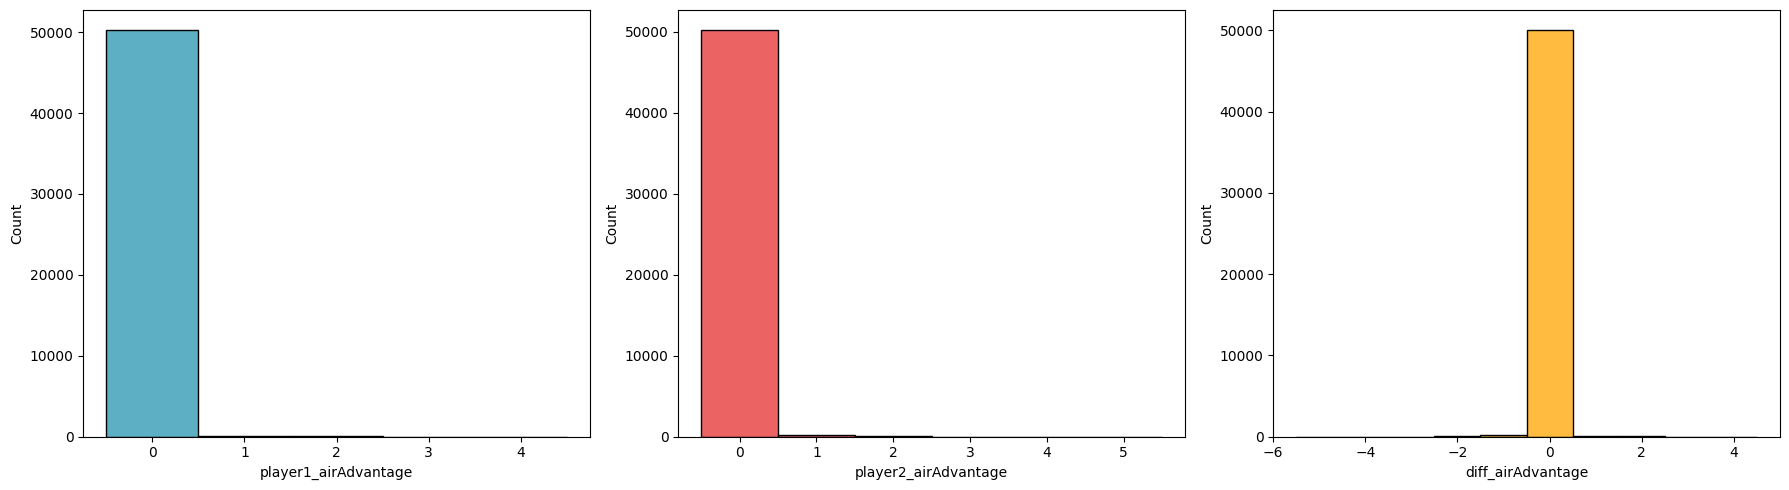

In [227]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
player1_air_advantage = np.maximum(0, df_train["player1_numAirCards"] - df_train["player2_numAntiAirCards"])
sns.histplot(player1_air_advantage, color="#2794B0", discrete=True).set(xlabel="player1_airAdvantage")

plt.subplot(1, 3, 2)
player2_air_advantage = np.maximum(0, df_train["player2_numAirCards"] - df_train["player1_numAntiAirCards"])
sns.histplot(player2_air_advantage, color="#E52F2F", discrete=True).set(xlabel="player2_airAdvantage")

plt.subplot(1, 3, 3)
diff_air_advantage = player1_air_advantage - player2_air_advantage
sns.histplot(diff_air_advantage, color="orange", discrete=True).set(xlabel="diff_airAdvantage")

plt.tight_layout()
plt.show()

Apenas tenemos ejemplos en los que exista una ventaja aérea real.

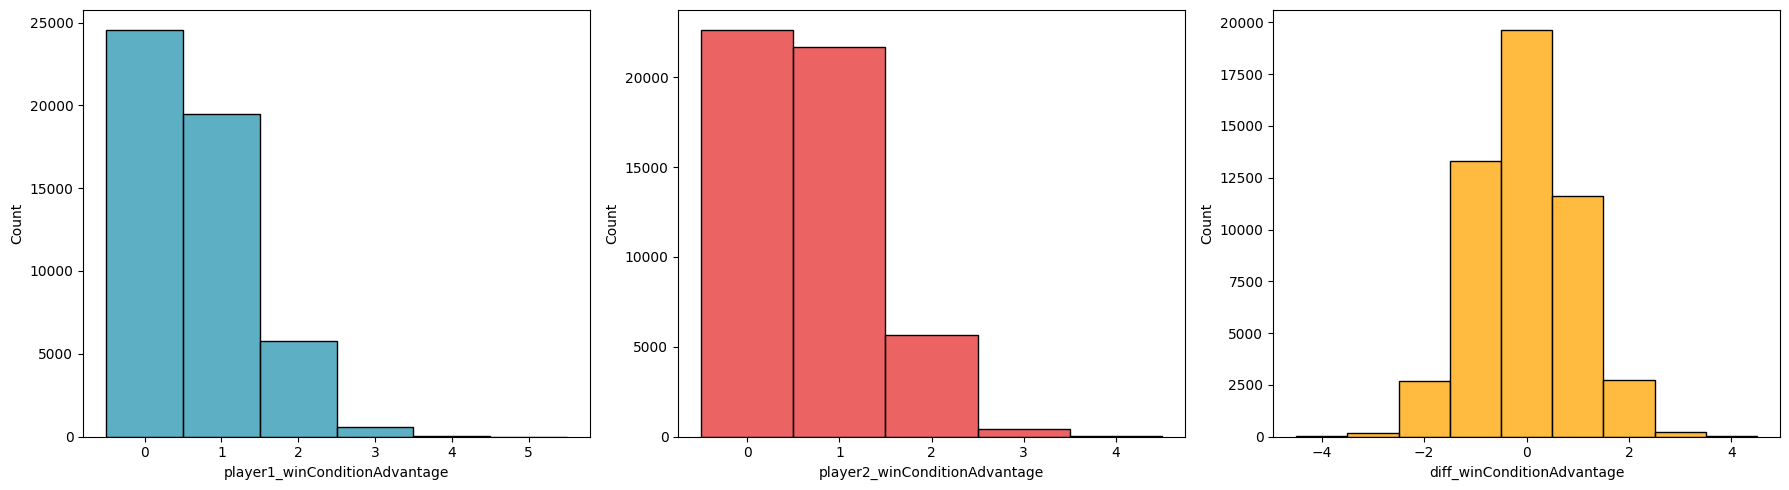

In [228]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
player1_win_condition_advantage = np.maximum(0, df_train["player1_numWinConditionCards"] - df_train["player2_numBuildingCards"])
sns.histplot(player1_win_condition_advantage, color="#2794B0", discrete=True).set(xlabel="player1_winConditionAdvantage")

plt.subplot(1, 3, 2)
player2_win_condition_advantage = np.maximum(0, df_train["player2_numWinConditionCards"] - df_train["player1_numBuildingCards"])
sns.histplot(player2_win_condition_advantage, color="#E52F2F", discrete=True).set(xlabel="player2_winConditionAdvantage")

plt.subplot(1, 3, 3)
diff_win_condition_advantage = player1_win_condition_advantage - player2_win_condition_advantage
sns.histplot(diff_win_condition_advantage, color="orange", discrete=True).set(xlabel="diff_winConditionAdvantage")

plt.tight_layout()
plt.show()

En este caso sí tenemos bastantes partidas en las que un jugador utiliza más *Win Condition* que edificios su rival.

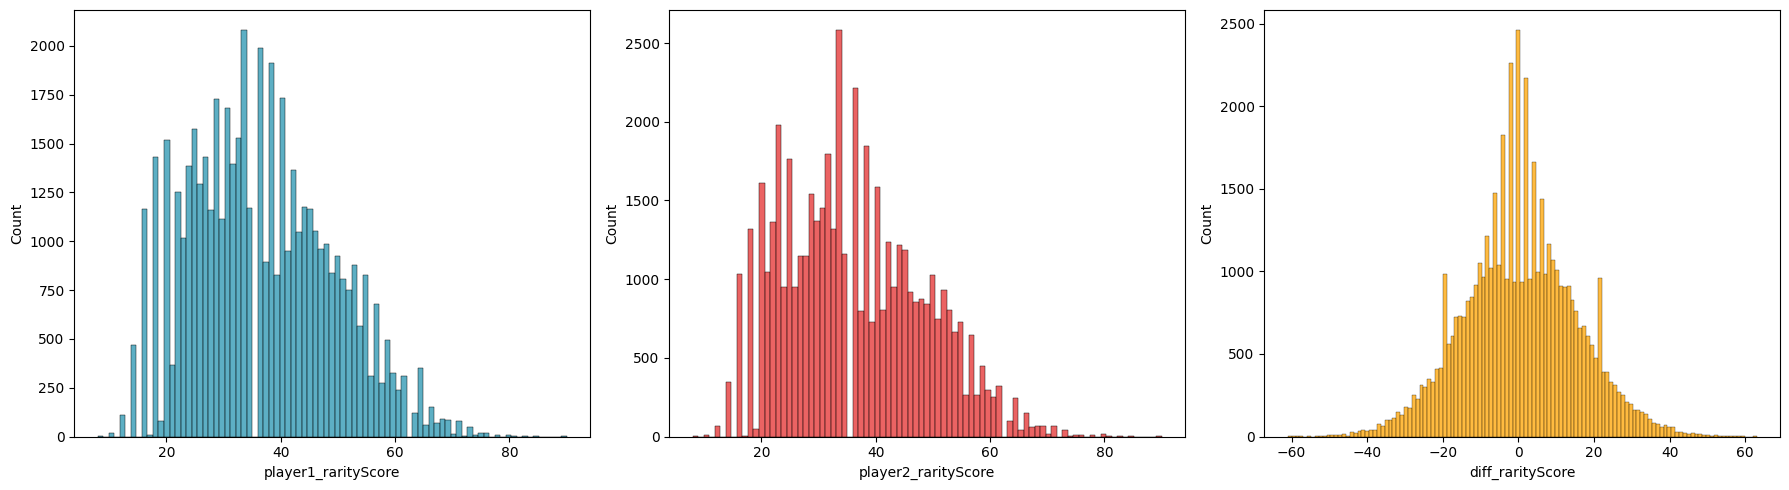

In [229]:
rarity_points = {
    "numCommonCards": 1,
    "numRareCards": 3,
    "numEpicCards": 5,
    "numLegendaryCards": 10,
    "numChampionCards": 20
}

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
player1_rarity_score = sum(df_train["player1_" + col] * points for col, points in rarity_points.items())
sns.histplot(player1_rarity_score, color="#2794B0").set(xlabel="player1_rarityScore")

plt.subplot(1, 3, 2)
player2_rarity_score = sum(df_train["player2_" + col] * points for col, points in rarity_points.items())
sns.histplot(player2_rarity_score, color="#E52F2F").set(xlabel="player2_rarityScore")

plt.subplot(1, 3, 3)
diff_rarity_score = player1_rarity_score - player2_rarity_score
sns.histplot(diff_rarity_score, color="orange").set(xlabel="diff_rarityScore")

plt.tight_layout()
plt.show()

Para nuestras puntuaciones, las distribuciones parecen muy similares pero podemos ver que realmente sí existen diferencias. Esto se puede deber a que las cartas legendarias y los campeones suman bastantes más puntos que el resto.

Por último, calcularemos el *score* de balance con la función definida a continuación, que utiliza diferentes factores importantes para sumar puntos.

In [230]:
def compute_balance_score(df, prefix):
    score = pd.Series(0.0, index=df.index)
    score += (df[f"{prefix}numWinConditionCards"] >= 1).astype(float) * 3
    score += (df[f"{prefix}numDirectDamageCards"] >= 1).astype(float) * 2
    score += (df[f"{prefix}numAntiAirCards"] >= 1).astype(float) * 1
    score += (df[f"{prefix}numSplashDamageCards"] >= 1).astype(float) * 1
    score += (df[f"{prefix}numResetAttackCards"] >= 1).astype(float) * 1
    score += (df[f"{prefix}numBuildingCards"] >= 1).astype(float) * 1
    score += ((df[f"{prefix}numMeleeCards"] >= 1) & (df[f"{prefix}numRangedCards"] >= 1)).astype(float) * 1
    score += (df[f"{prefix}numTroopCards"] >= 4).astype(float) * 1
    score += (df[f"{prefix}numAirCards"] >= 1).astype(float) * 1
    score += ((df[f"{prefix}meanElixirCost"] >= 2.5) & (df[f"{prefix}meanElixirCost"] <= 4.5)).astype(float) * 1
    score += (
        (df[f"{prefix}numTroopCards"] >= 1) &
        (df[f"{prefix}numSpellCards"] >= 1) &
        (df[f"{prefix}numBuildingCards"] >= 1)
    ).astype(float) * 1
    return score

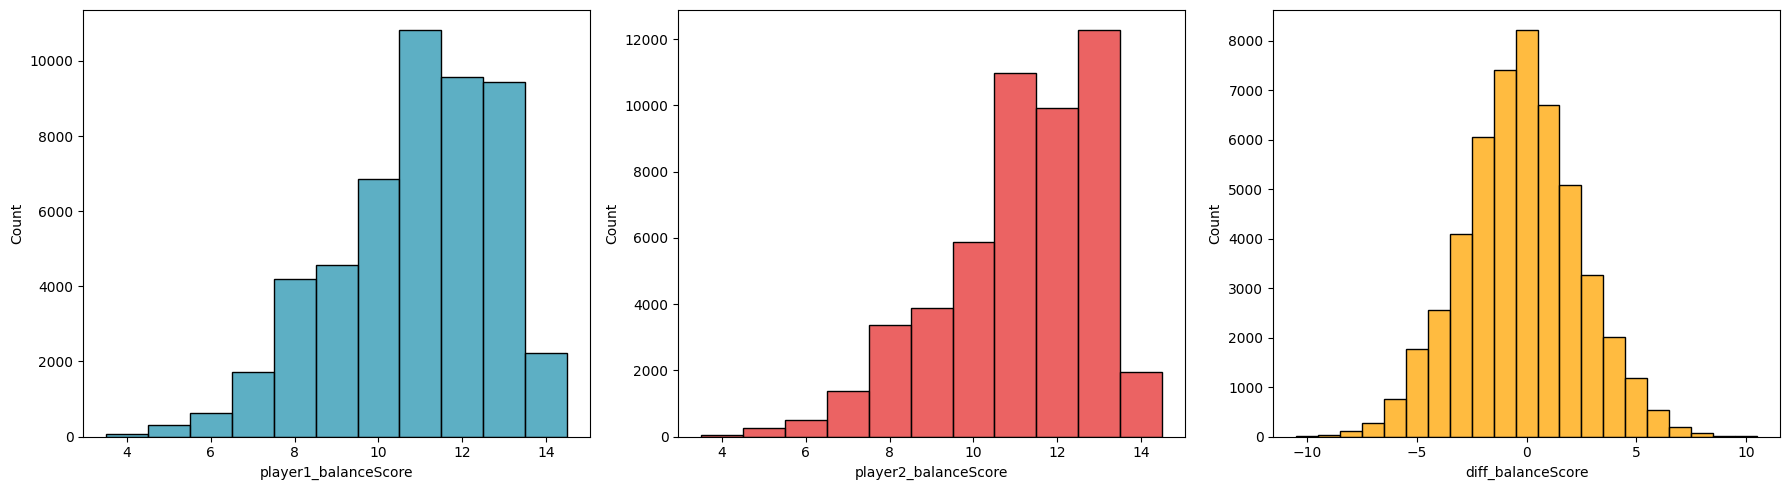

In [231]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
player1_balance_score = compute_balance_score(df_train, "player1_")
sns.histplot(player1_balance_score, color="#2794B0", discrete=True).set(xlabel="player1_balanceScore")

plt.subplot(1, 3, 2)
player2_balance_score = compute_balance_score(df_train, "player2_")
sns.histplot(player2_balance_score, color="#E52F2F", discrete=True).set(xlabel="player2_balanceScore")

plt.subplot(1, 3, 3)
diff_balance_score = player1_balance_score - player2_balance_score
sns.histplot(diff_balance_score, color="orange", discrete=True).set(xlabel="diff_balanceScore")

plt.tight_layout()
plt.show()

Vemos que en este caso las distribuciones también parecen bastante similares pero aun así existen diferencias en la gran mayoría de partidas. Es cierto que si tenemos en cuenta que el máximo es 14 puntos, las diferencias tampoco son excesivamente grandes y es normal que este valor no sea el mismo para la mayoría de partidas. Puede ser interesante incluir esta variable, más adelante vamos a estudiar su relación con la variable clase para ver cómo de influyente puede ser en el resultado el hecho de tener un mazo "más equilibrado" que el rival.

<a id="section3_3"></a>
### <font color="#00586D"> 3.3. Relaciones entre variables</font>

Tras realizar un análisis univarido completo en el que hemos explorado las distribuciones para todas las variables (numéricas) de cada jugador e incluso para sus diferencias, ha llegado el momento de estudiar las relaciones entre las variables. Para ello, mostraremos la distribución de densidad o un histograma según corresponda para las variables del apartado anterior, pero ahora respecto a la variable objetivo `winner`. Utilizaremos `multiple="fill"` para poder apreciar mejor en qué proporción gana la partida un jugador u otro, ya que si utilizamos las distribuciones anteriores no seremos capaces de distinguir los colores para intervalos de menor frecuencia.

Antes de comenzar con estas gráficas, vamos a ver otras relaciones. Por ejemplo, cómo la arena influye en el nivel medio de las cartas o los puntos estelares:

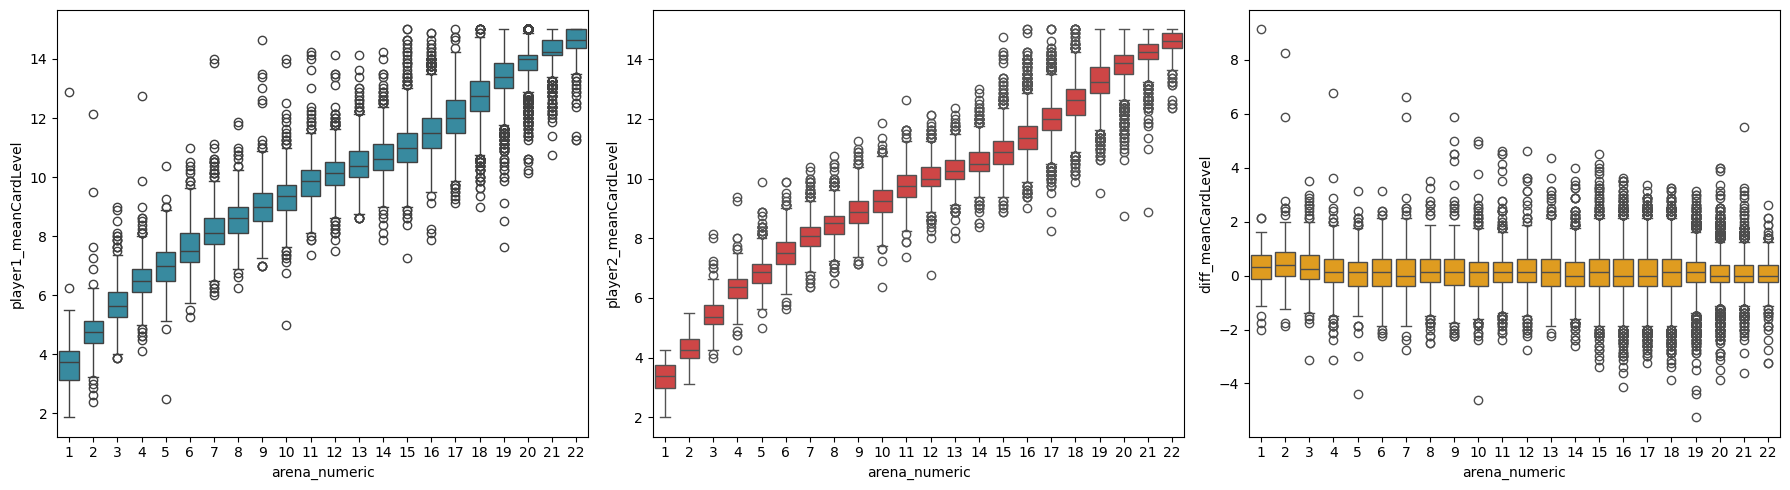

In [232]:
arena_order = [
    "Goblin Stadium", "Bone Pit", "Barbarian Bowl",
    "Spell Valley", "Builder's Workshop", "P.E.K.K.A's Playhouse", "Royal Arena", "Frozen Peak", "Jungle Arena",
    "Hog Mountain", "Electro Valley", "Spooky Town", "Rascal's Hideout", "Serenity Peak",
    "Miner's Mine", "Executioner's Kitchen", "Royal Crypt", "Silent Sanctuary", "Dragon Spa",
    "Boot Camp", "Clash Fest", "PANCAKES!", "Legendary Arena"
]

arena_numeric = pd.Categorical(df_train["arena"], categories=arena_order, ordered=True).codes + 1
arena_numeric = pd.Series(arena_numeric, name="arena_numeric")

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=arena_numeric, y=df_train["player1_meanCardLevel"], color="#2794B0")

plt.subplot(1, 3, 2)
sns.boxplot(x=arena_numeric, y=df_train["player2_meanCardLevel"], color="#E52F2F")

plt.subplot(1, 3, 3)
sns.boxplot(x=arena_numeric, y=diff_mean_card_level, color="orange").set(ylabel="diff_meanCardLevel")

plt.tight_layout()
plt.show()

Podemos ver de forma muy clara que nivel medio de las cartas crece con la arena para ambos jugadores. Respecto a la diferencia, no existe ninguna arena en la que claramente haya partidas menos parejas en este sentido.

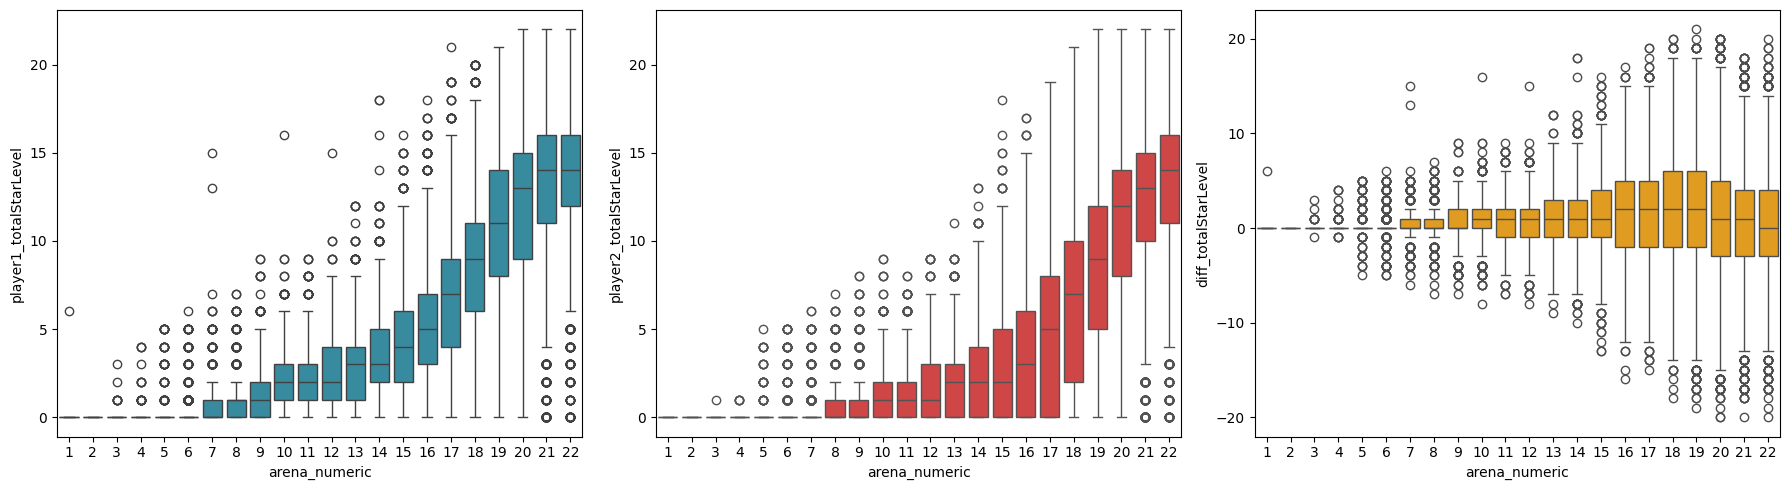

In [233]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=arena_numeric, y=df_train["player1_totalStarLevel"], color="#2794B0")

plt.subplot(1, 3, 2)
sns.boxplot(x=arena_numeric, y=df_train["player2_totalStarLevel"], color="#E52F2F")

plt.subplot(1, 3, 3)
sns.boxplot(x=arena_numeric, y=diff_total_star_level, color="orange").set(ylabel="diff_totalStarLevel")

plt.tight_layout()
plt.show()

Para los puntos estelares es similar, aunque en este caso la mediana es cero o cercana a cero para las primeras arenas. En el caso de la diferencia, conforme crece la arena los datos tiene mayor variabilidad (se alejan más del rango central).

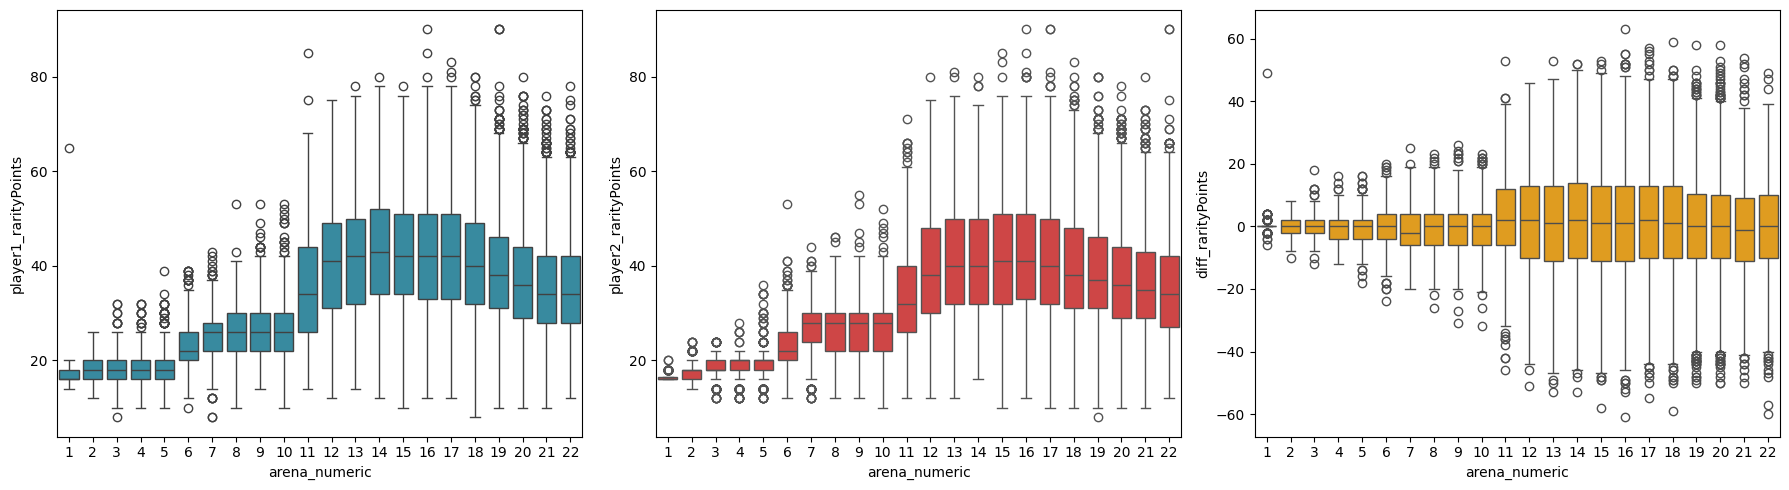

In [234]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=arena_numeric, y=player1_rarity_score, color="#2794B0").set(ylabel="player1_rarityPoints")

plt.subplot(1, 3, 2)
sns.boxplot(x=arena_numeric, y=player2_rarity_score, color="#E52F2F").set(ylabel="player2_rarityPoints")

plt.subplot(1, 3, 3)
sns.boxplot(x=arena_numeric, y=diff_rarity_score, color="orange").set(ylabel="diff_rarityPoints")

plt.tight_layout()
plt.show()

El puntaje de rareza también crece con la arena porque cartas como las legendarias no se pueden desbloquear en arenas bajas, aunque vuelve a estabilizarse para las más altas. La diferencia es similar al caso anterior.

Vamos a comenzar ahora con las variables de cada jugador respecto al ganador. Esto nos puede servir para determinar su poder discriminativo individual, es decir, cómo de influyentes pueden llegar a ser por sí mismas en el resultado.

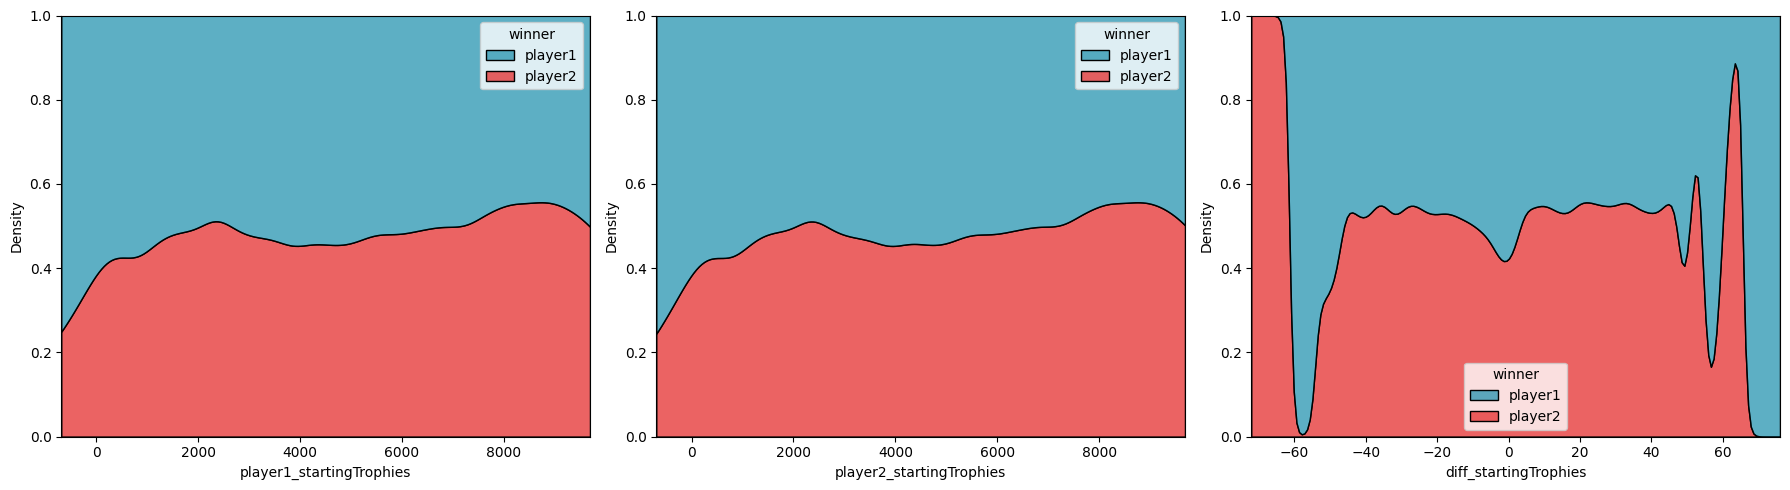

In [235]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(df_train, x="player1_startingTrophies", hue="winner", multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.kdeplot(df_train, x="player2_startingTrophies", hue="winner", multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.kdeplot(x=diff_starting_trophies, hue=df_train["winner"], multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_startingTrophies")

plt.tight_layout()
plt.show()

Dentro del juego la diferencia de copas no debería ser un factor determinante, ambos jugadores están en un rango muy similar y las diferencias del emparejamiento suelen deberse más bien a rachas de victorias o derrotas que desconocemos. Aun así, es llamativo que los jugadores con dos partidas de ventaja tienden a ganar.

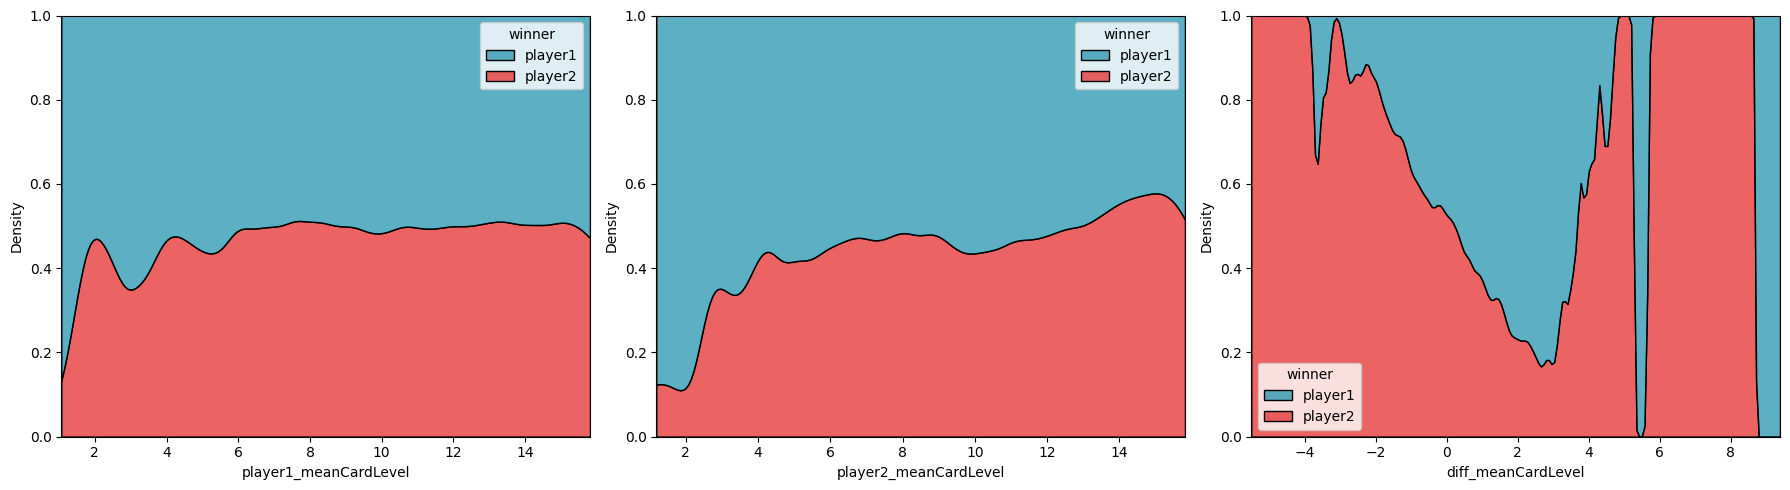

In [236]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(df_train, x="player1_meanCardLevel", hue="winner", multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.kdeplot(df_train, x="player2_meanCardLevel", hue="winner", multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.kdeplot(x=diff_mean_card_level, hue=df_train["winner"], multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_meanCardLevel")

plt.tight_layout()
plt.show()

Dejando a un lado los *outliers*, la diferencia en el nivel de las cartas parece un factor muy determinante en el resultado de la partida.

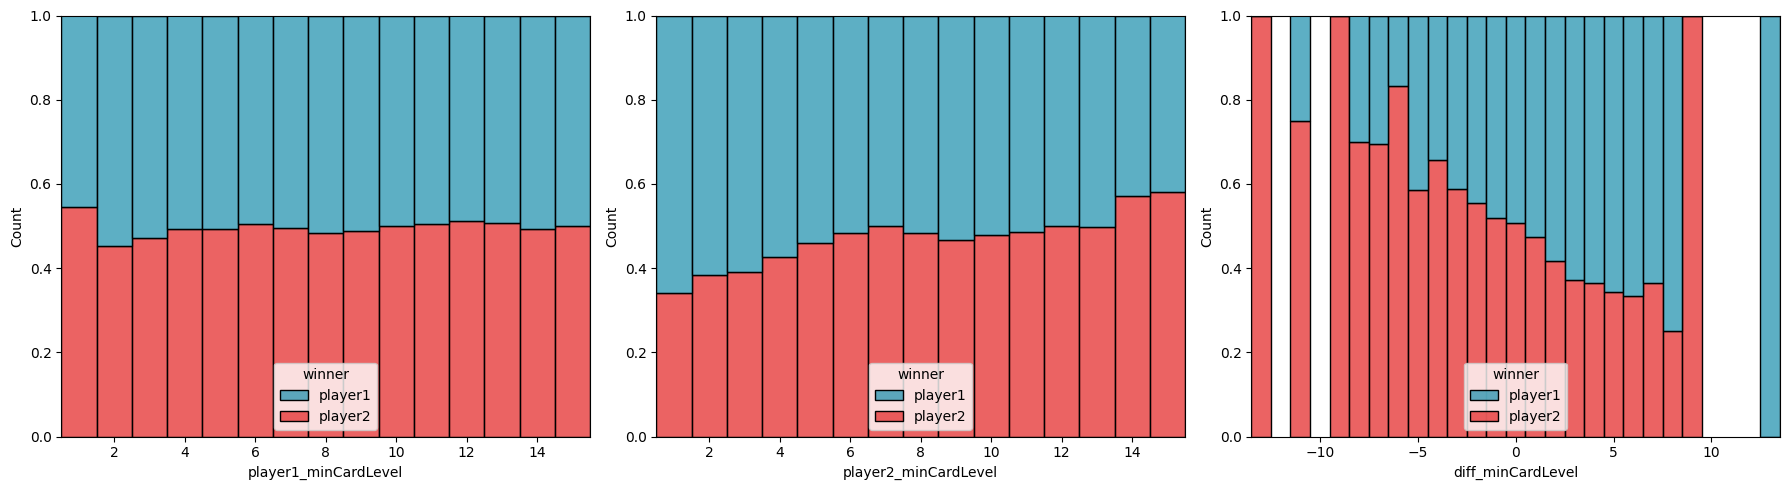

In [237]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_minCardLevel", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_minCardLevel", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_min_card_level, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_minCardLevel")

plt.tight_layout()
plt.show()

El nivel mínimo también parece ser relevante por sí solo, ya que una sola carta con un nivel mucho más bajo que las del rival puede suponer una gran diferencia.

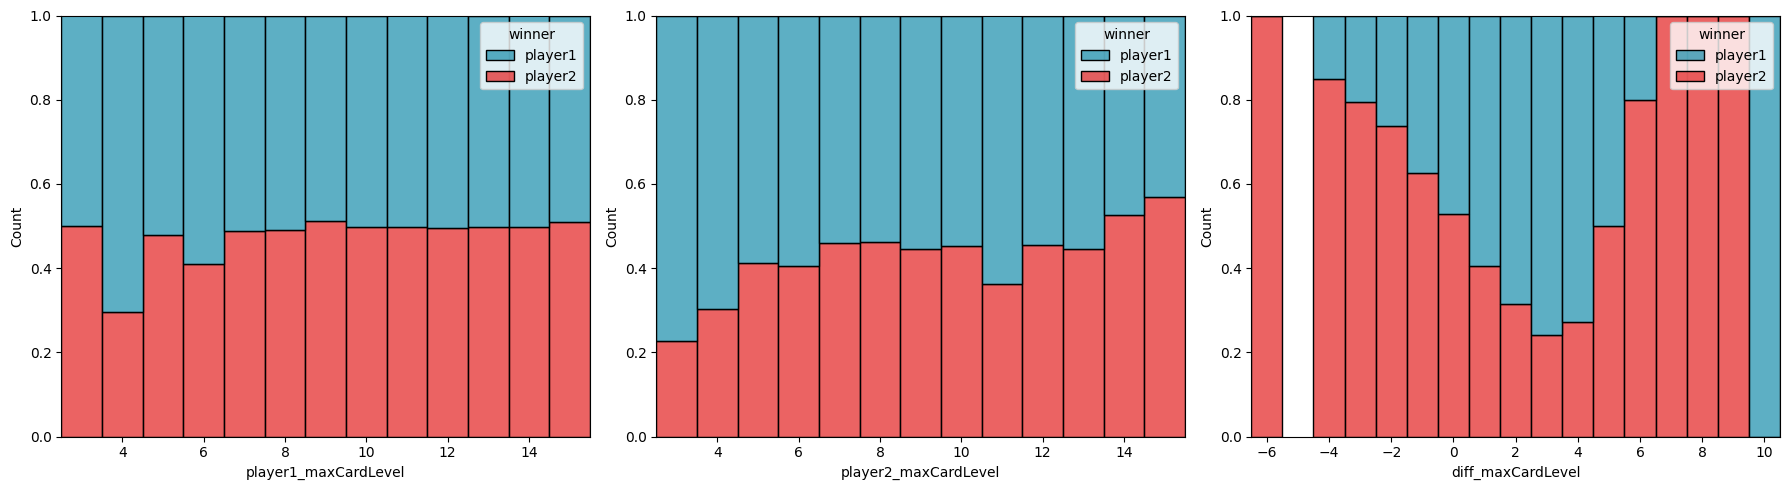

In [238]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_maxCardLevel", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_maxCardLevel", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_max_card_level, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_maxCardLevel")

plt.tight_layout()
plt.show()

Con el nivel máximo ocurre algo similar.

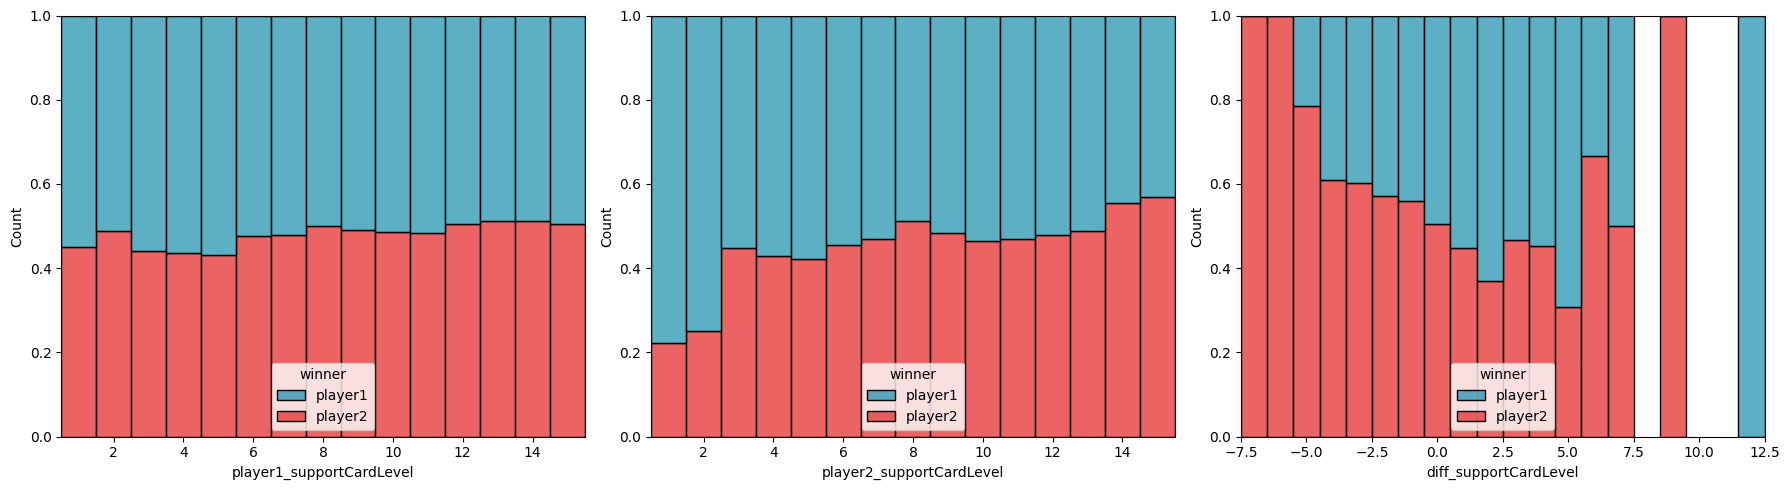

In [239]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_supportCardLevel", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_supportCardLevel", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_support_card_level, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_supportCardLevel")

plt.tight_layout()
plt.show()

Lo mismo ocurre con el nivel de la tropa de las torres, conforme la diferencia aumenta mayor parece la ventaja.

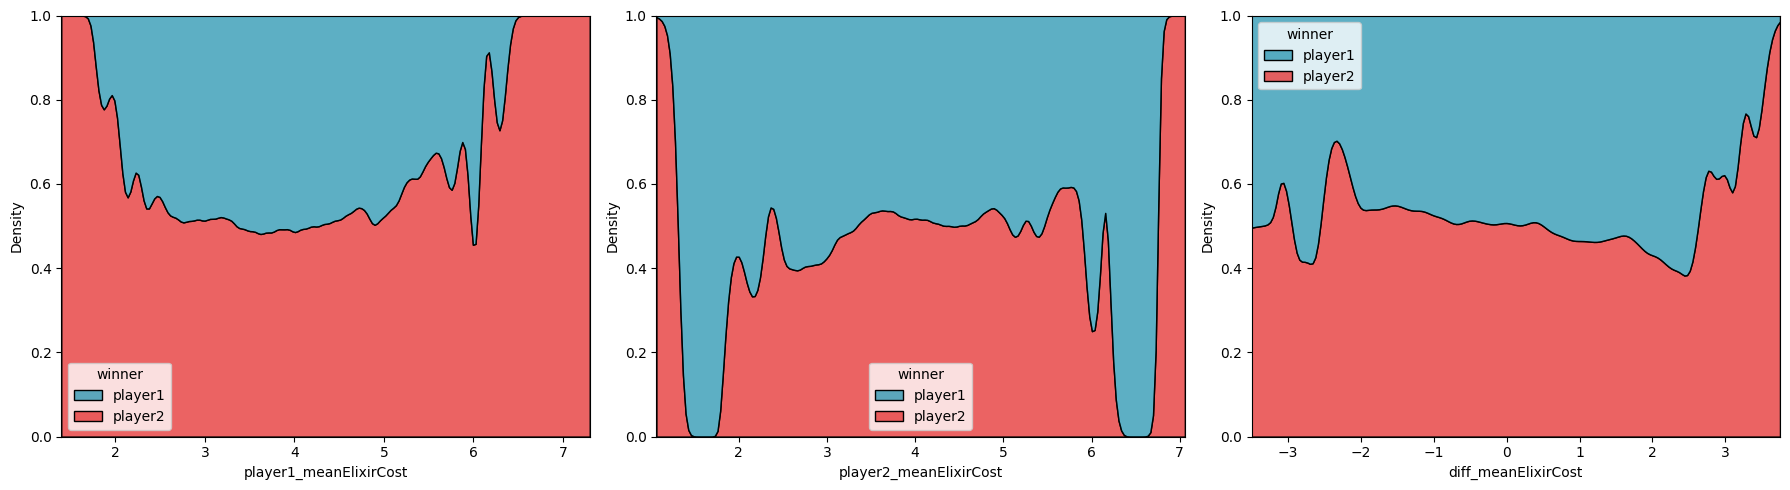

In [240]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(df_train, x="player1_meanElixirCost", hue="winner", multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.kdeplot(df_train, x="player2_meanElixirCost", hue="winner", multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.kdeplot(x=diff_mean_elixir_cost, hue=df_train["winner"], multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_meanElixirCost")

plt.tight_layout()
plt.show()

Cuando la diferencia en el coste medio de elixir crece mucho, el jugador con el mazo más barato tiende a ganar.

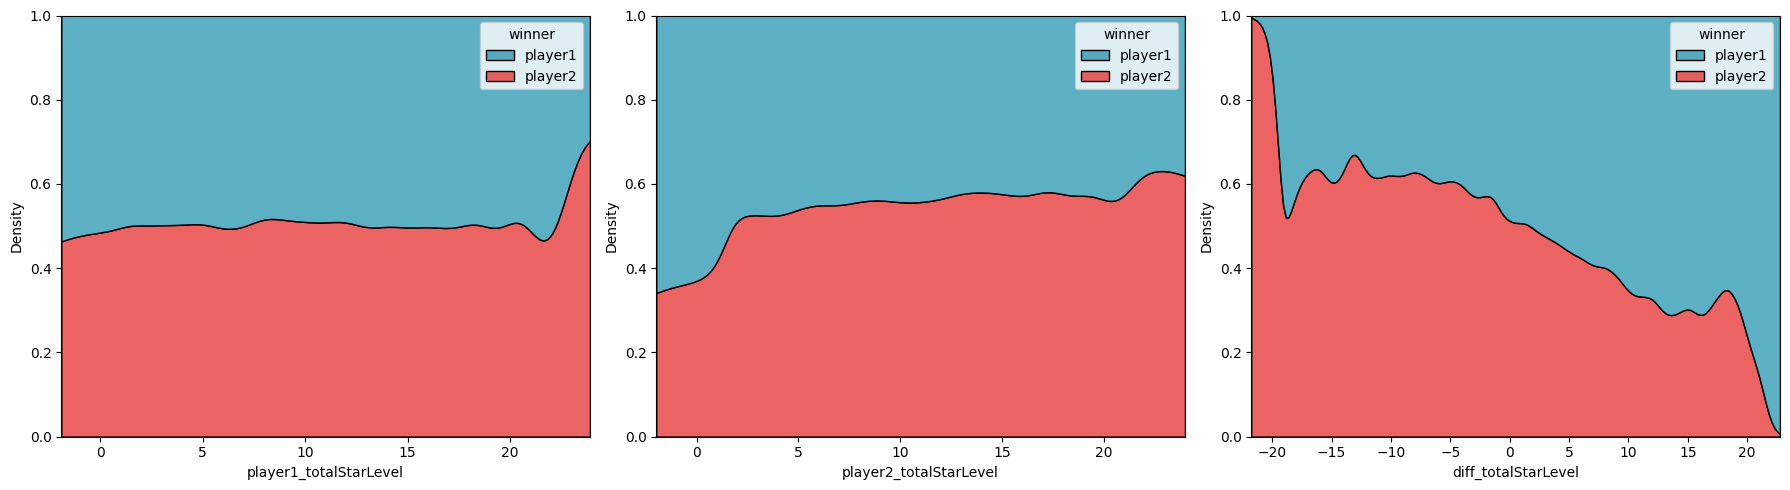

In [241]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(df_train, x="player1_totalStarLevel", hue="winner", multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.kdeplot(df_train, x="player2_totalStarLevel", hue="winner", multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.kdeplot(x=diff_total_star_level, hue=df_train["winner"], multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_totalStarLevel")

plt.tight_layout()
plt.show()

Los puntos estelares también parecen ser un factor muy determinante en el resultado.

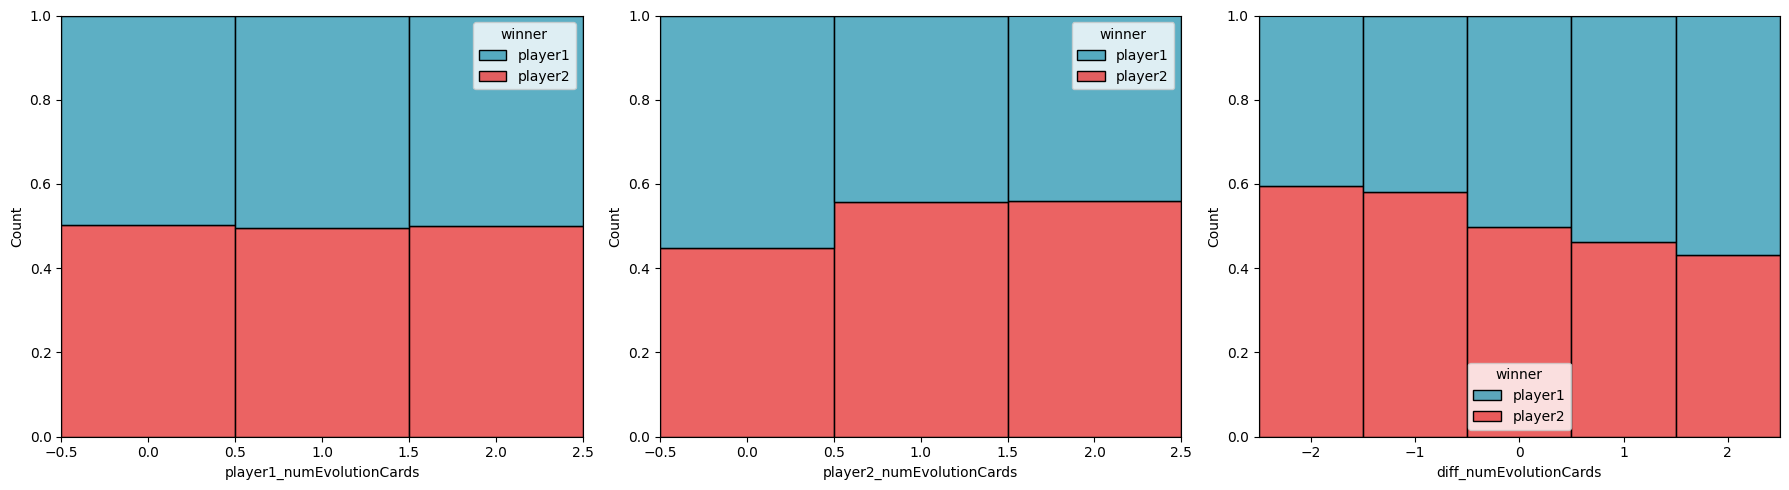

In [242]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numEvolutionCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numEvolutionCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_evolution_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numEvolutionCards")

plt.tight_layout()
plt.show()

Si bien no es tan exagerado como con el nivel o los puntos estelares, vemos que conforme crece la ventaja (independientemente del jugador) más partidas se ganan.

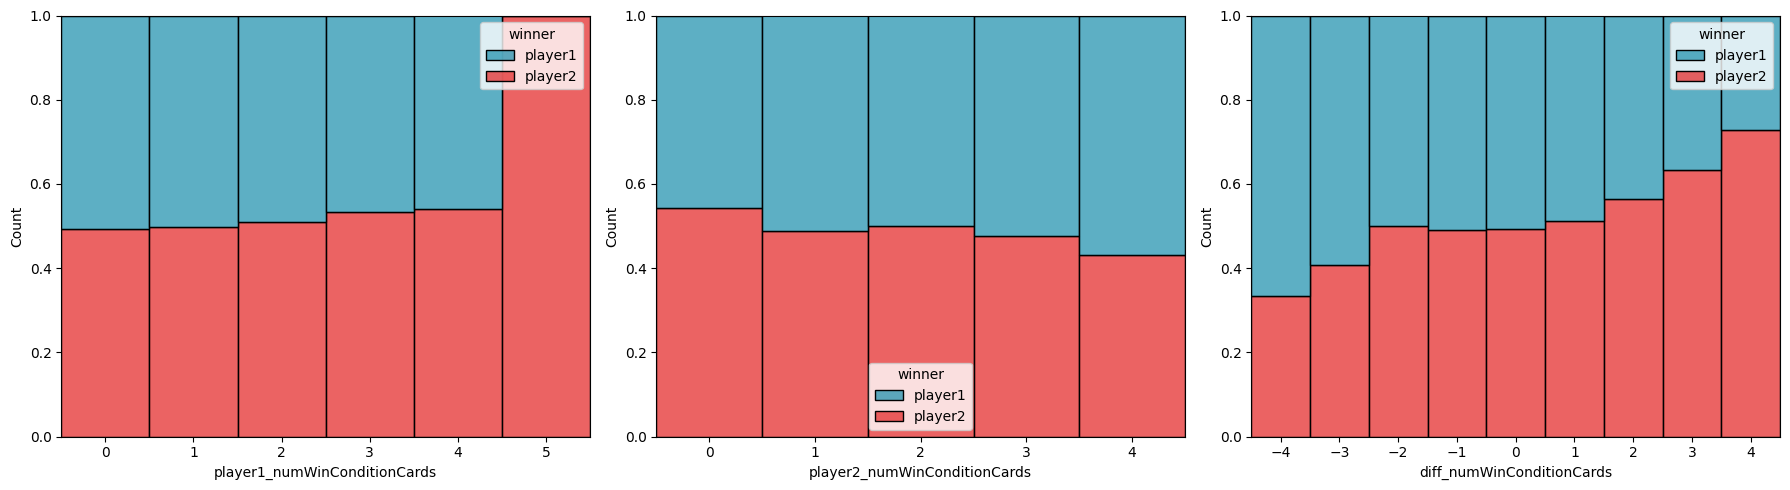

In [243]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numWinConditionCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numWinConditionCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_win_condition_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numWinConditionCards")

plt.tight_layout()
plt.show()

Tener al menos una carta *Win Condition* en el mazo es fundamental en Clash Royale. Sin embargo, vemos que los jugadores que tienen más que su rival tienden a perder. Esto puede ocurrir porque no dejan espacio a otras cartas que puedan aportar habilidades diferentes y aumenten la sinergia y el equilibrio.

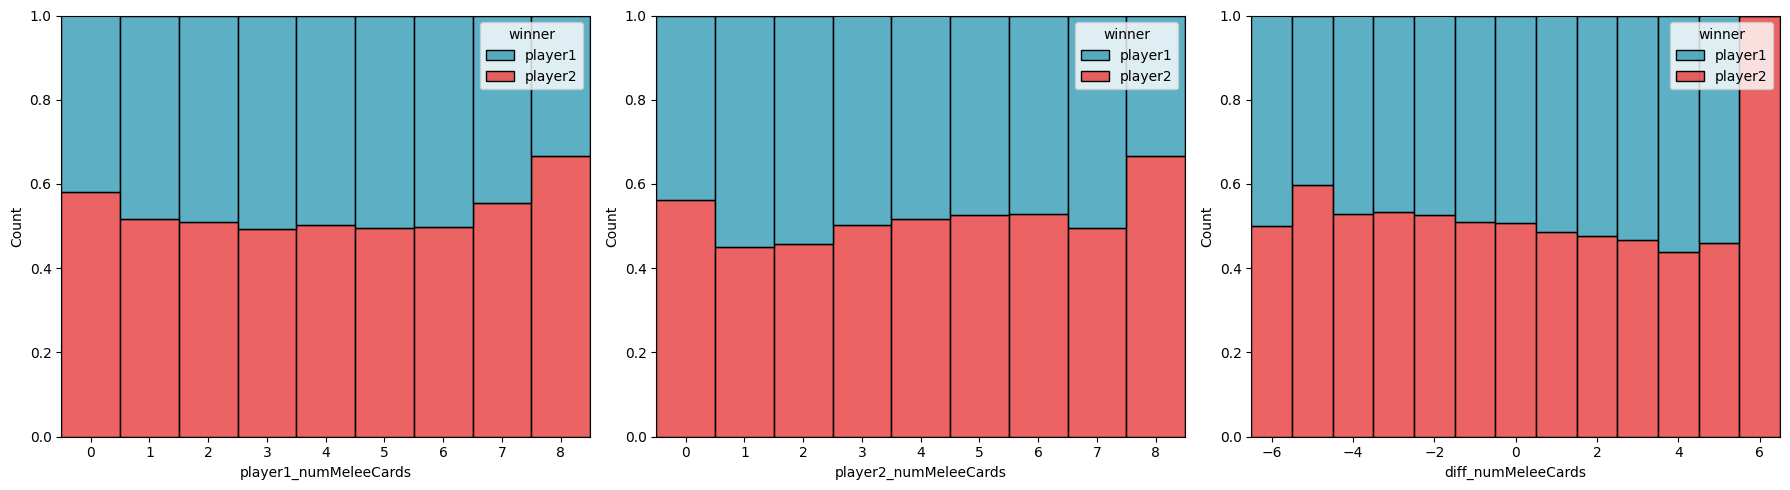

In [244]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numMeleeCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numMeleeCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_melee_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numMeleeCards")

plt.tight_layout()
plt.show()

Tener algunas cartas cuerpo a cuerpo más que el rival parece suponer una ligera ventaja, pero no demasiada.

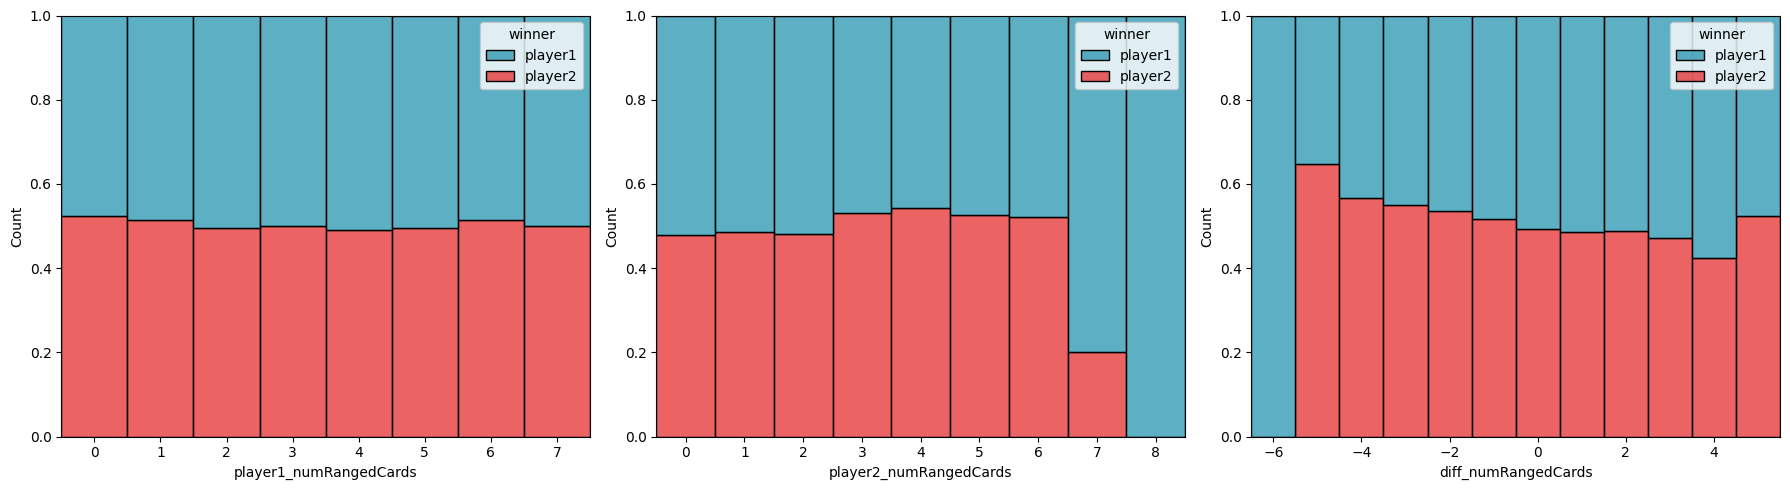

In [245]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numRangedCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numRangedCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_ranged_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numRangedCards")

plt.tight_layout()
plt.show()

Algo parecido ocurre con las cartas a distancia.

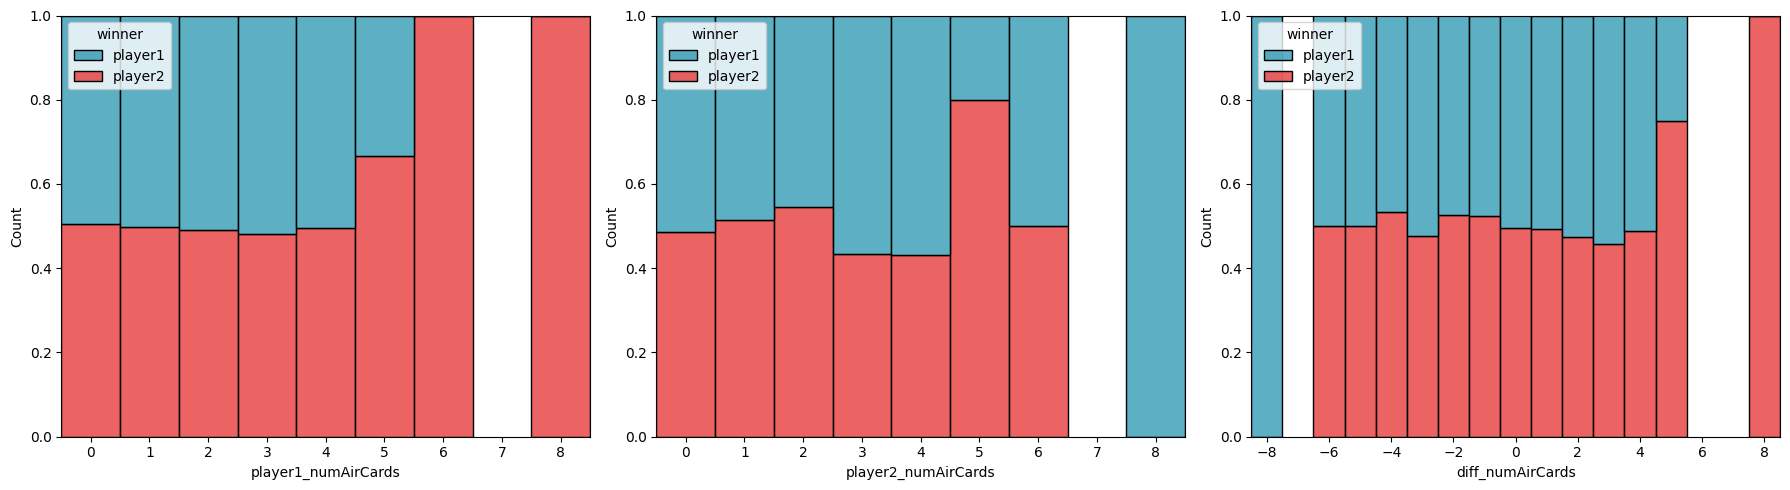

In [246]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numAirCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numAirCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_air_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numAirCards")

plt.tight_layout()
plt.show()

Es importante tener alguna carta aérea, pues puede suponer una ventaja importante. Sin embargo, podemos observar que utilizar demasiadas (o bastantes más que el rival), aumentará las probabilidades de derrota.

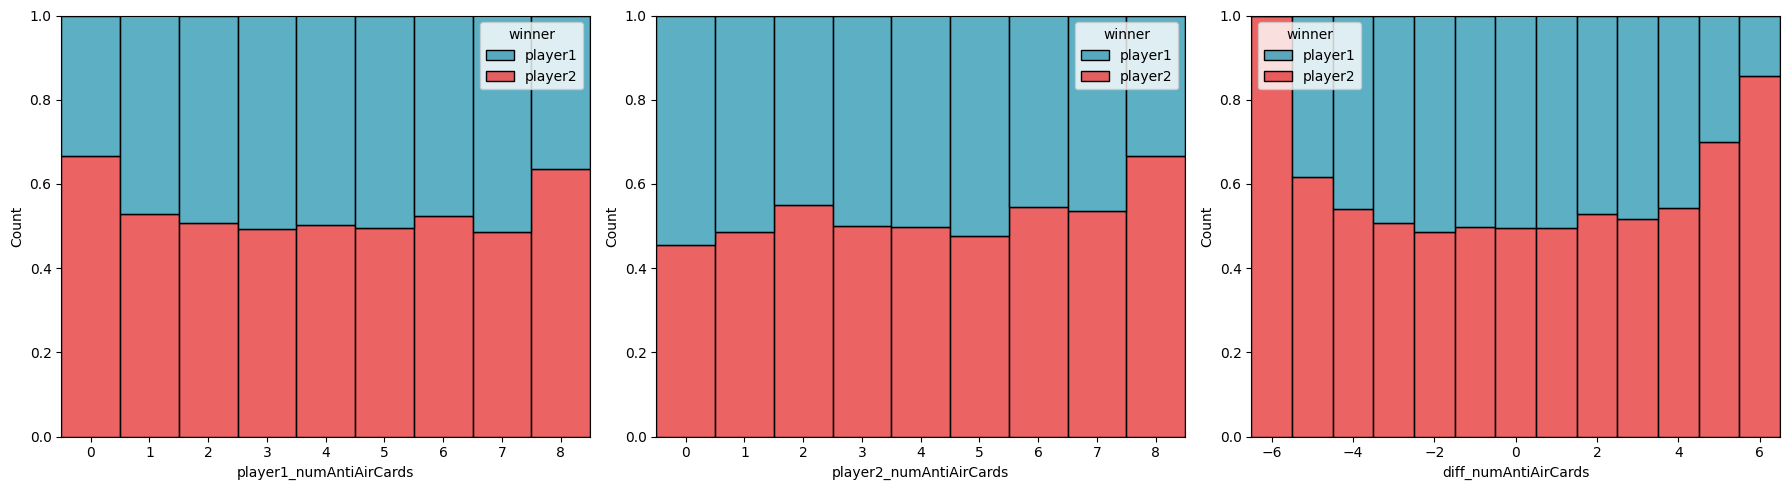

In [247]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numAntiAirCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numAntiAirCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_anti_air_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numAntiAirCards")

plt.tight_layout()
plt.show()

Tampoco parece adecuado utilizar un número excesivo de cartas antiaéreas.

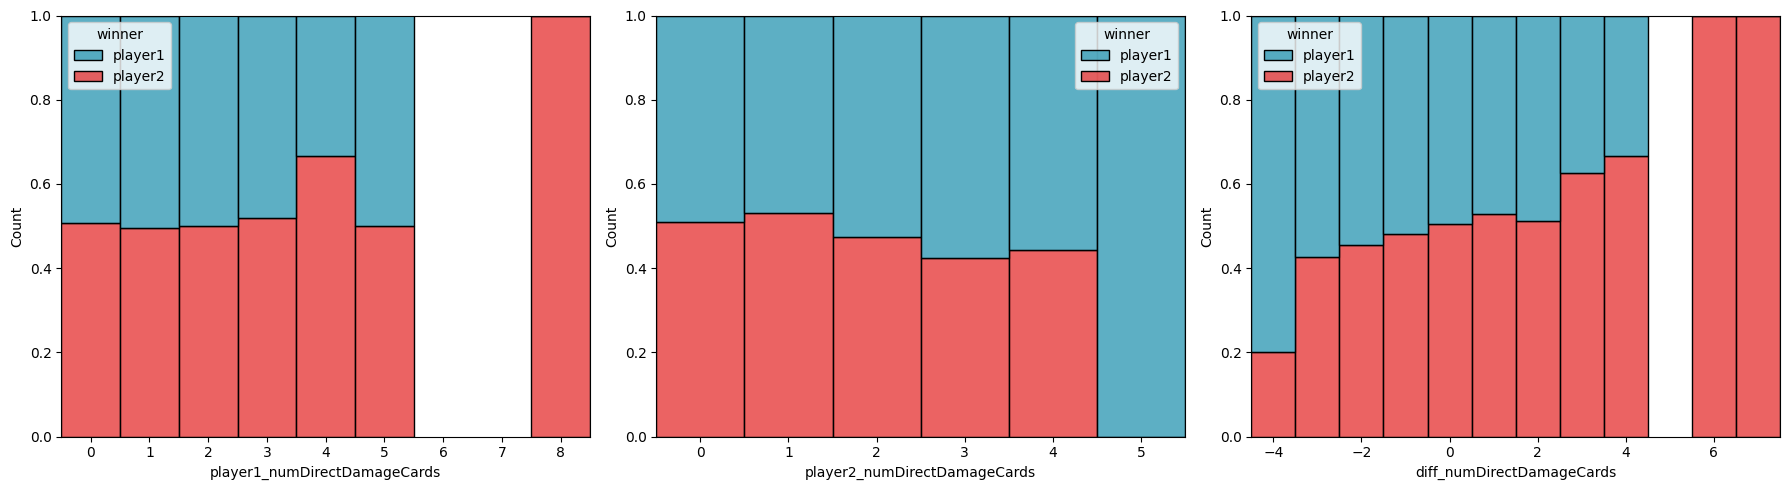

In [248]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numDirectDamageCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numDirectDamageCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_direct_damage_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numDirectDamageCards")

plt.tight_layout()
plt.show()

Es imprescindible contar con alguna carta de daño directo a torre que nos permita cerrar la partida. Sin embargo, todas estas coinciden con hechizos y utilizar un número elevado de ellas implica dejar de utilizar tropas esenciales para competir a un buen nivel. Es por ello que mucha ventaja para este tipo de carta no es precisamente favorable.

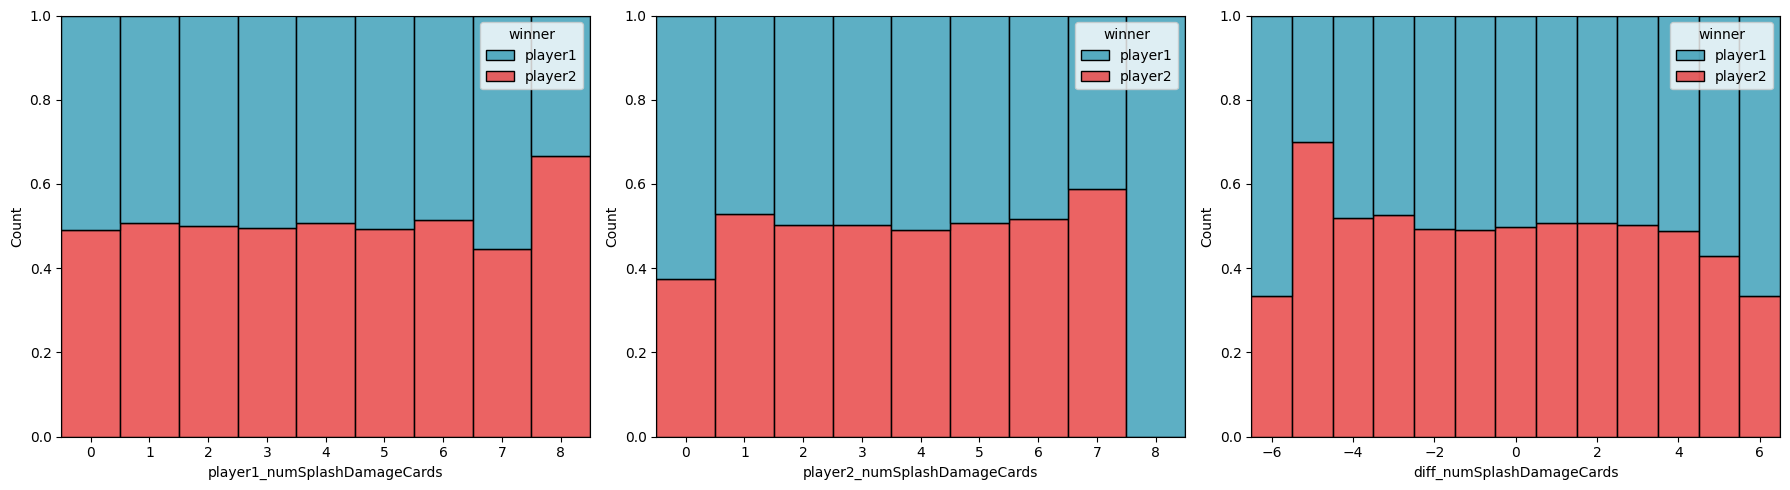

In [249]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numSplashDamageCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numSplashDamageCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_splash_damage_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numSplashDamageCards")

plt.tight_layout()
plt.show()

A primera vista, la salpicadura no parece ser un factor muy determinante.

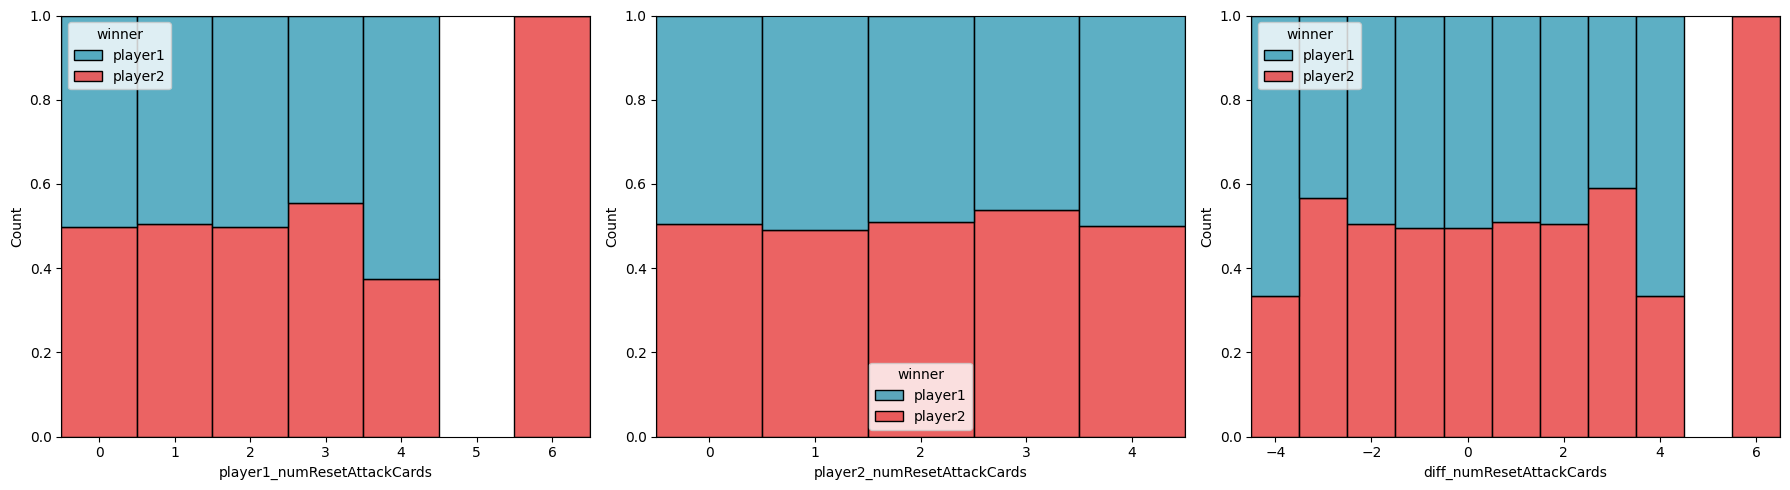

In [250]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numResetAttackCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numResetAttackCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_reset_attack_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numResetAttackCards")

plt.tight_layout()
plt.show()

Es importante contar con alguna carta que resetee los ataques de las cartas rivales, pero no individualmente no parece tener tanto potencial como otras variables.

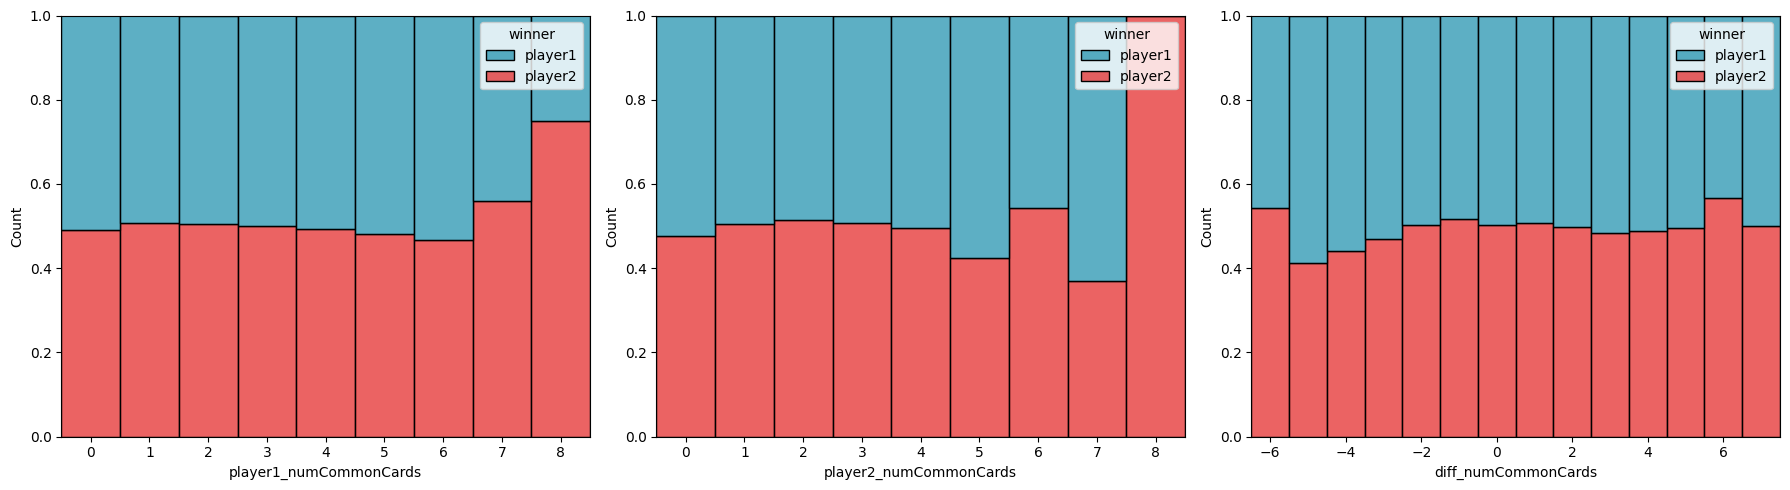

In [251]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numCommonCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numCommonCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_common_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numCommonCards")

plt.tight_layout()
plt.show()

Las cartas comunes tampoco parecen muy determinantes. En los mazos rápidos se suele utilizar un número elevado de ellas.

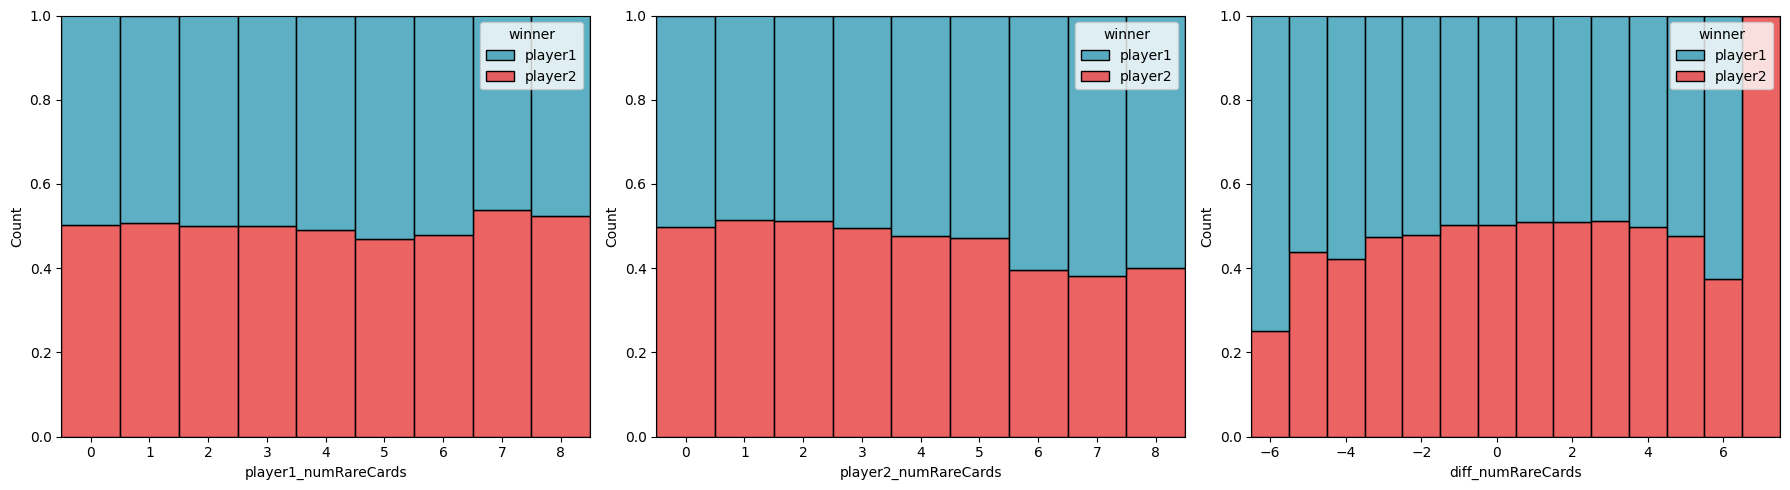

In [252]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numRareCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numRareCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_rare_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numRareCards")

plt.tight_layout()
plt.show()

Utilizar un número muy elevado de cartas raras parece ser ligeramente perjudicial.

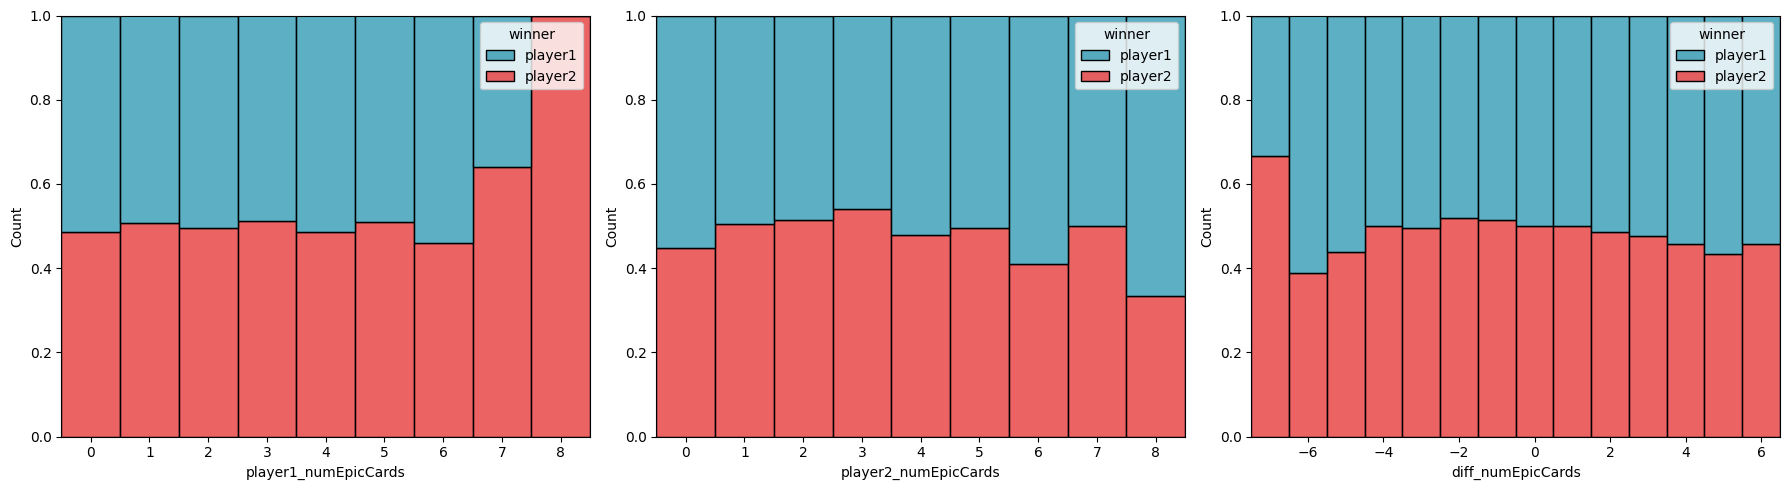

In [253]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numEpicCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numEpicCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_epic_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numEpicCards")

plt.tight_layout()
plt.show()

El número de cartas épicas tampoco parece especialmente relvante por sí solo.

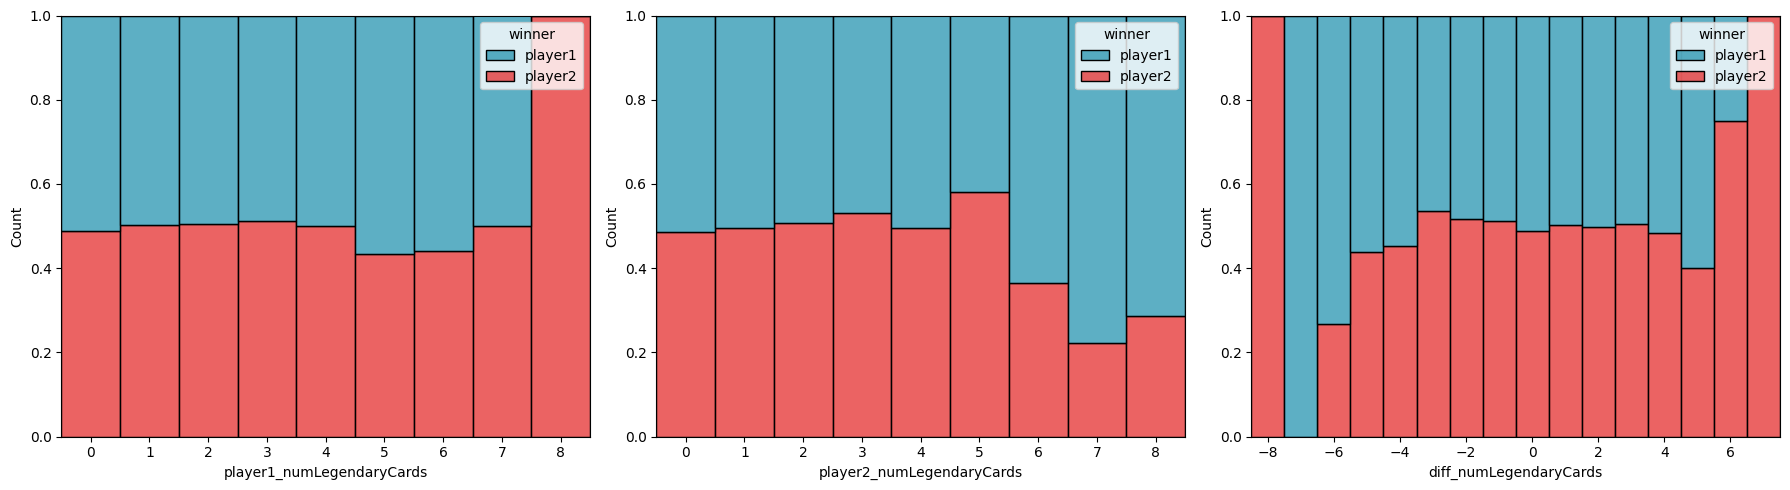

In [254]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numLegendaryCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numLegendaryCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_legendary_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numLegendaryCards")

plt.tight_layout()
plt.show()

Los jugadores que utilizan un número demasiado elevado de cartas legendarias (o bastantes más que su rival), tienden a perder.

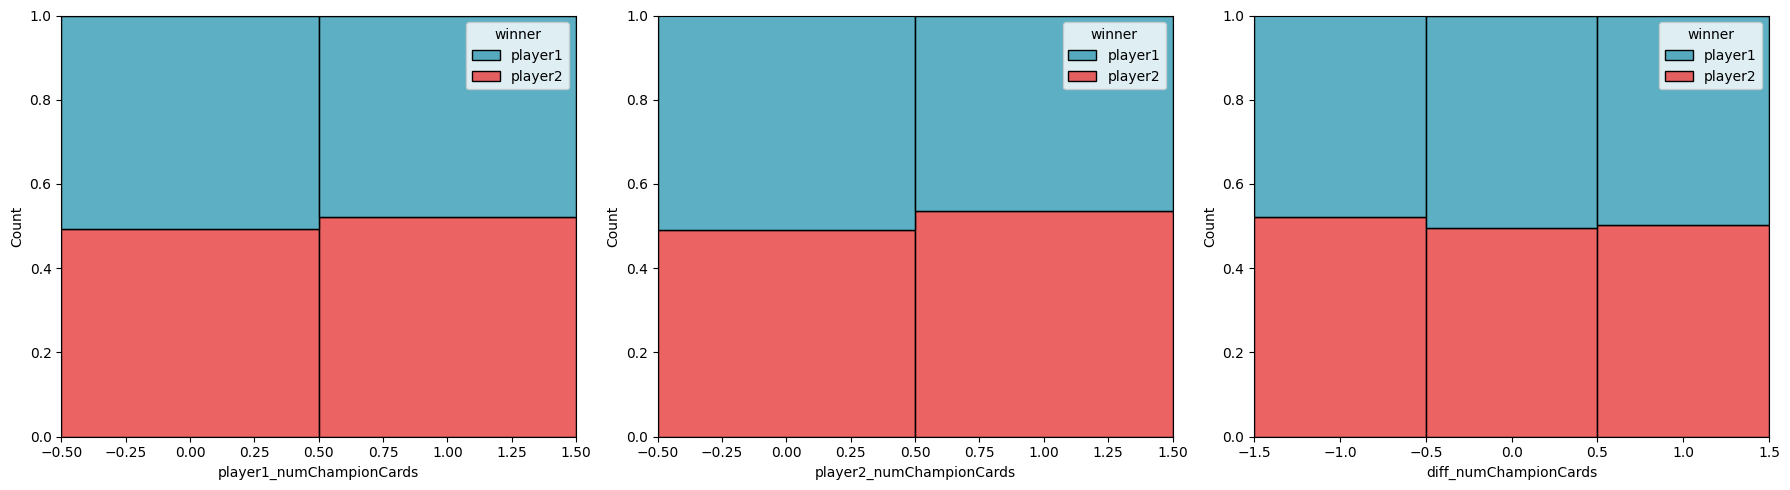

In [255]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numChampionCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numChampionCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_champion_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numChampionCards")

plt.tight_layout()
plt.show()

El número de campeones no parece en absoluto relevante por sí solo.

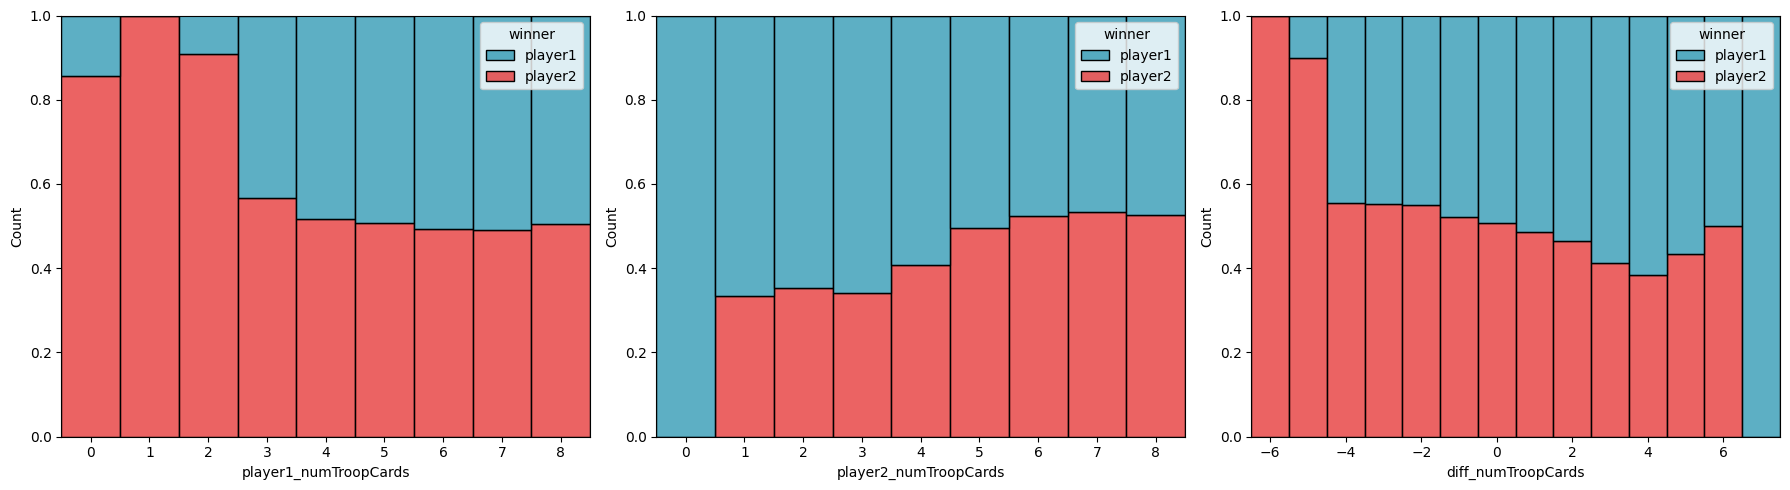

In [256]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numTroopCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numTroopCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_troop_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numTroopCards")

plt.tight_layout()
plt.show()

Utilizar un número demasiado bajo de tropas es claramente perjudicial. Respecto a la diferencia, cuanta más mejor porque significa que no sólo tenemos un número considerable de tropas sino que además el rival está ocupando otros espacios del mazo con edificios o hechizos (algo inviable en el juego si el número es demasiado elevado).

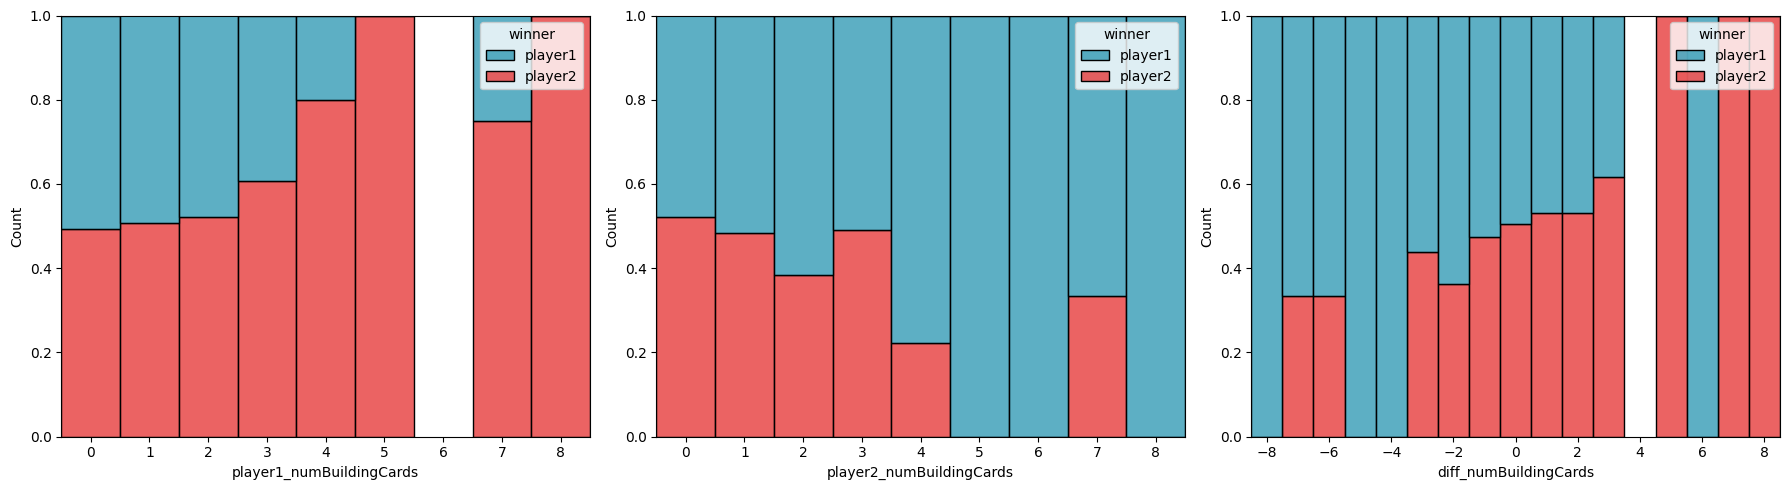

In [257]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numBuildingCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numBuildingCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_building_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numBuildingCards")

plt.tight_layout()
plt.show()

Como se ha comentado anteriormente, es fundamental incluir tropas y las probabilidades de derrota crecen conforme el número de edificios aumenta. Más de dos es excesivo, y como mucho uno más que el rival.

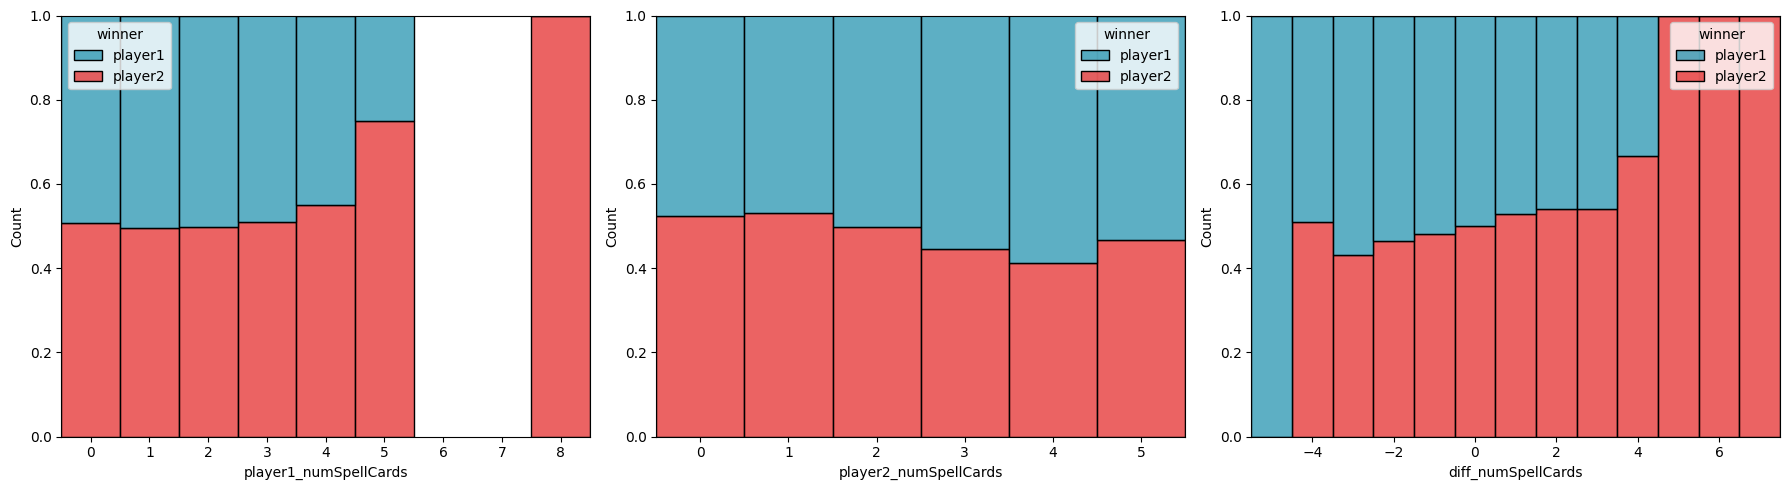

In [258]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numSpellCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numSpellCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_spell_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numSpellCards")

plt.tight_layout()
plt.show()

Con los hechizos ocurre algo bastante similar.

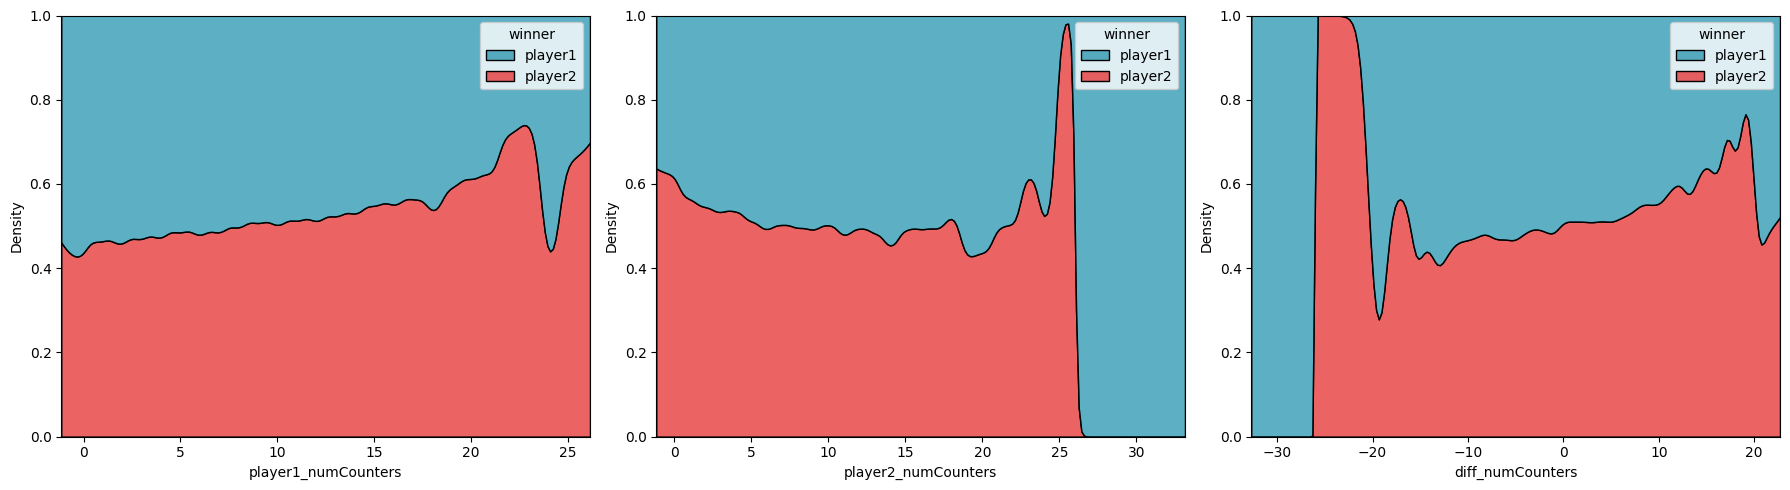

In [259]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(df_train, x="player1_numCounters", hue="winner", multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.kdeplot(df_train, x="player2_numCounters", hue="winner", multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.kdeplot(x=diff_num_counters, hue=df_train["winner"], multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numCounters")

plt.tight_layout()
plt.show()

Debemos tener en cuenta que cuando la variable `numCounters` crece para un jugador, significa que su rival cuenta con más unidades para contrarrestar sus cartas de forma efectiva. Por lo tanto, es comprensible que tener ventaja en este caso no sea favorable. De hecho, a primera vista parece ser una variable con bastante potencial discriminativo.

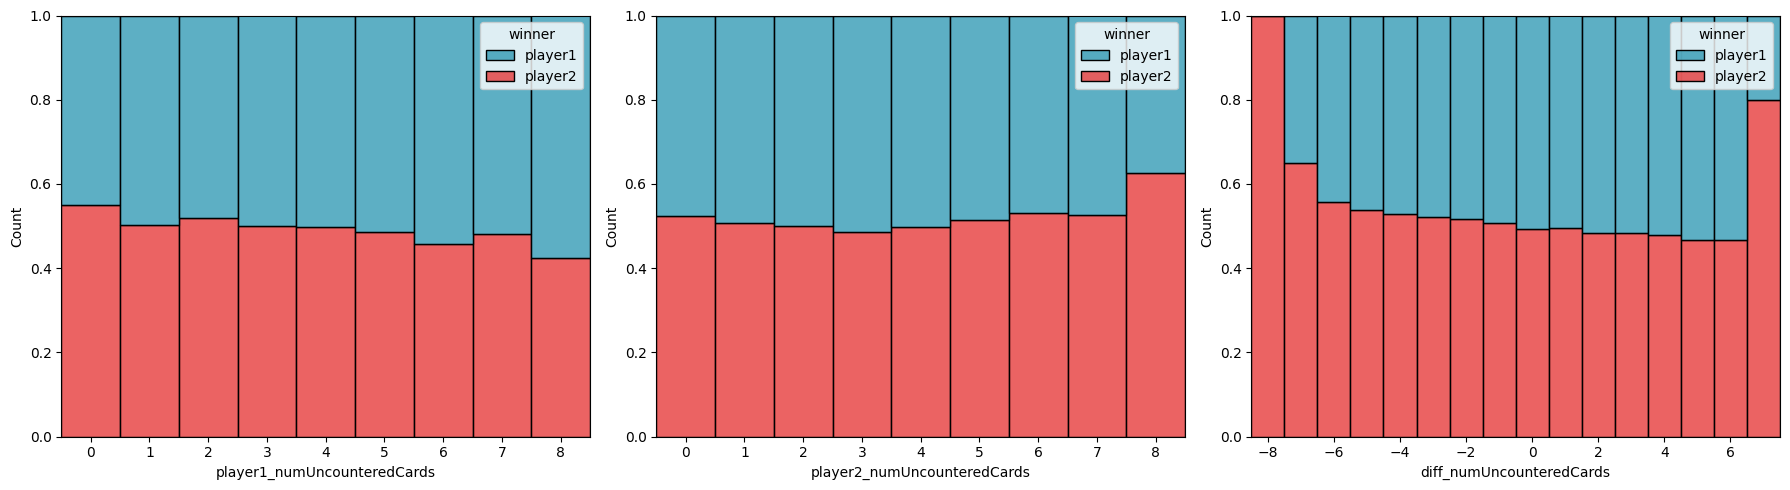

In [260]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train, x="player1_numUncounteredCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 2)
sns.histplot(df_train, x="player2_numUncounteredCards", hue="winner", multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"})

plt.subplot(1, 3, 3)
sns.histplot(x=diff_num_uncountered_cards, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_numUncounteredCards")

plt.tight_layout()
plt.show()

A nivel de cada jugador no parece ser muy relevante, pero la diferencia con el rival sí parece suponer una ligera ventaja (dejando a un lado algunos valores extremos).

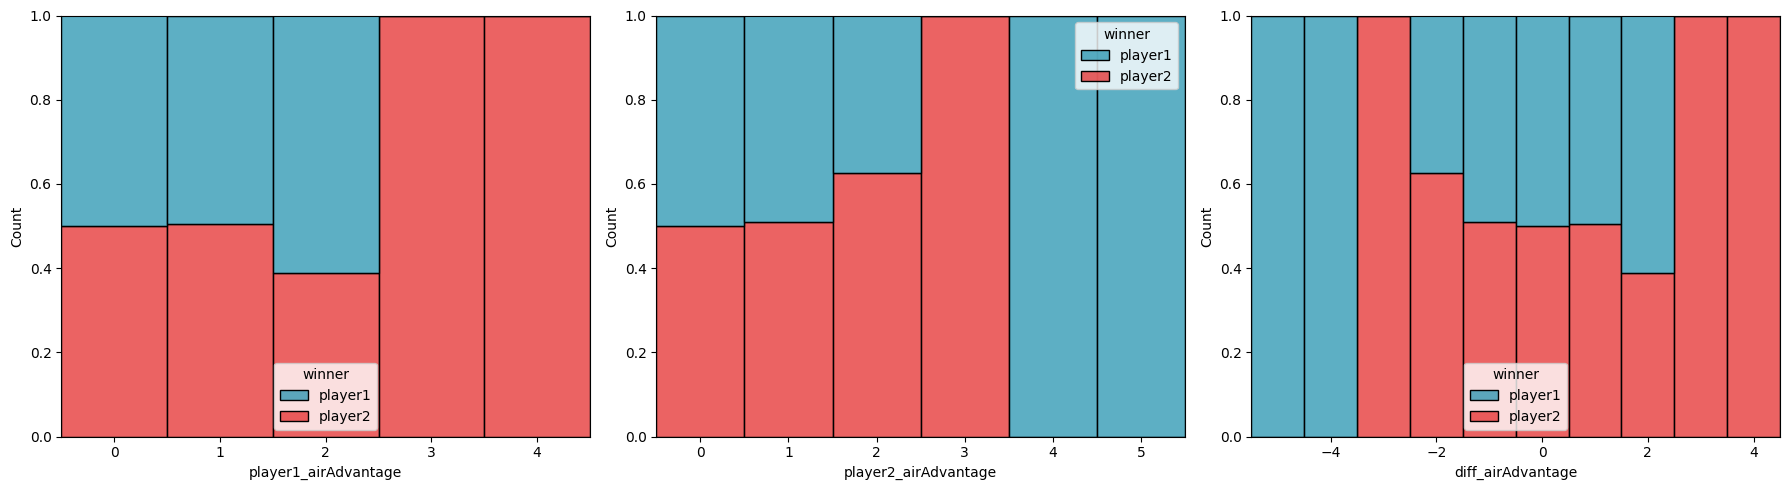

In [261]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(x=player1_air_advantage, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="player1_airAdvantage")

plt.subplot(1, 3, 2)
sns.histplot(x=player2_air_advantage, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="player2_airAdvantage")

plt.subplot(1, 3, 3)
sns.histplot(x=diff_air_advantage, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_airAdvantage")

plt.tight_layout()
plt.show()

Antes hemos visto que apenas disponemos de partidas en las que esta ventaja existe. Cuando la hay, parece que es positiva siempre que no sea excesiva. Sin embargo, no vemos que sea especialmente relevante.

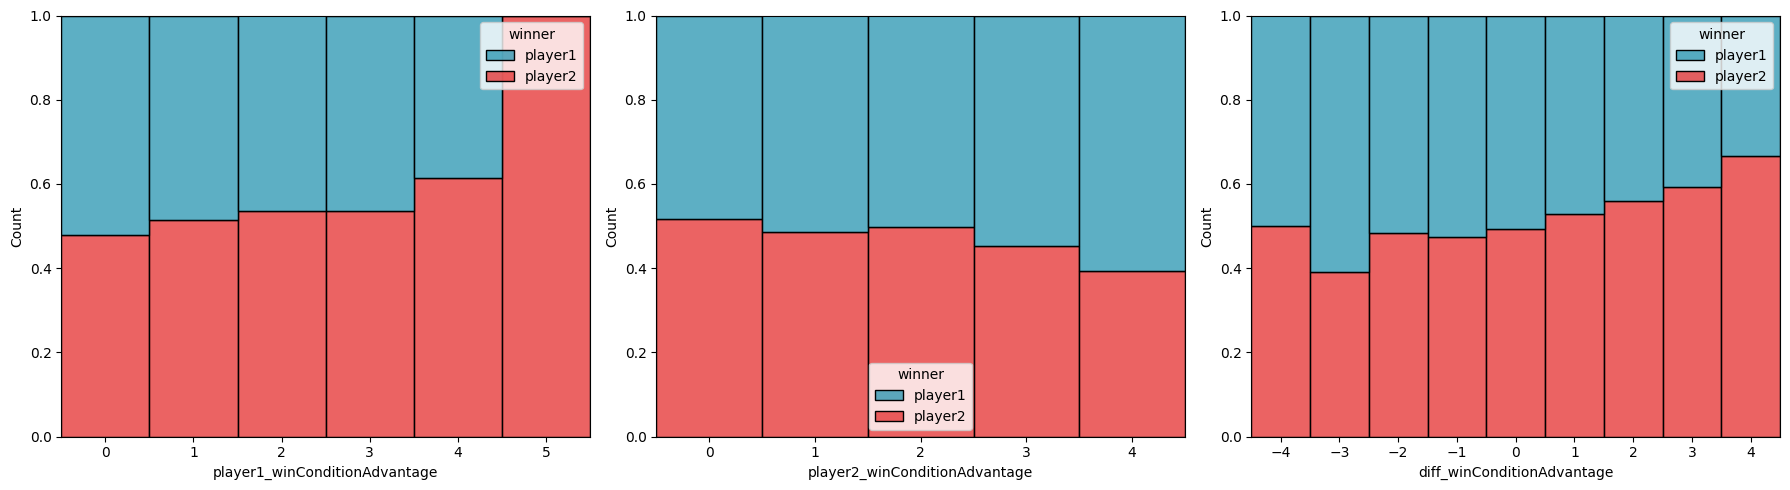

In [262]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(x=player1_win_condition_advantage, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="player1_winConditionAdvantage")

plt.subplot(1, 3, 2)
sns.histplot(x=player2_win_condition_advantage, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="player2_winConditionAdvantage")

plt.subplot(1, 3, 3)
sns.histplot(x=diff_win_condition_advantage, hue=df_train["winner"], multiple="fill", discrete=True, palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_winConditionAdvantage")

plt.tight_layout()
plt.show()

Habíamos decidido explorar esta posibilidad porque podía suponer una ventaja real, pero sorprendentemente parece ser al revés.

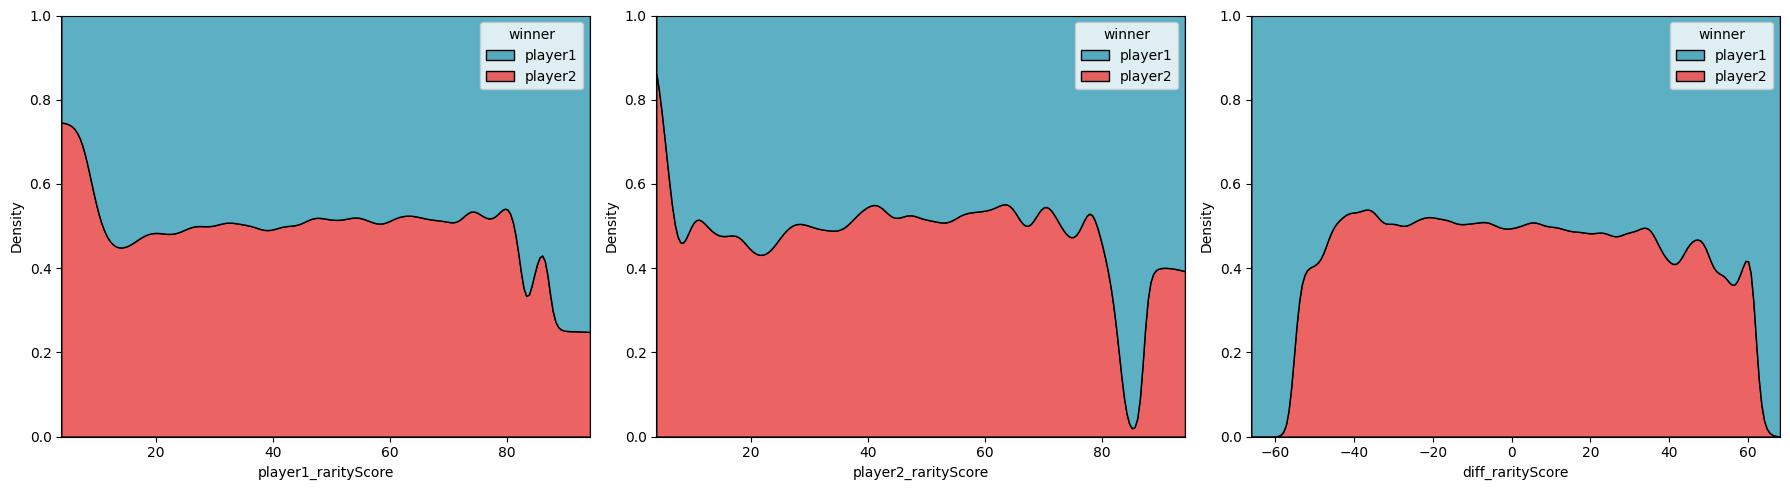

In [263]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(x=player1_rarity_score, hue=df_train["winner"], multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="player1_rarityScore")

plt.subplot(1, 3, 2)
sns.kdeplot(x=player2_rarity_score, hue=df_train["winner"], multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="player2_rarityScore")

plt.subplot(1, 3, 3)
sns.kdeplot(x=diff_rarity_score, hue=df_train["winner"], multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_rarityScore")

plt.tight_layout()
plt.show()

Salvando los valores extremos, tener mayor puntaje de rareza que el rival parece suponer una pequeña ventaja.

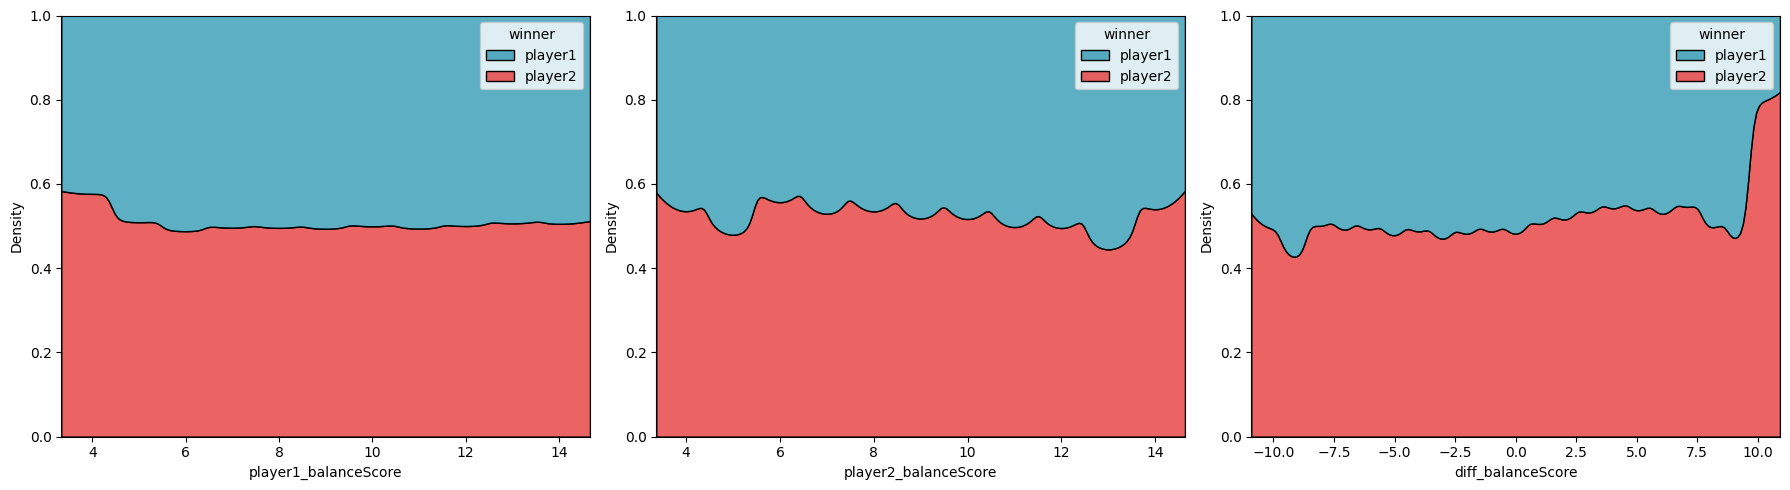

In [264]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(x=player1_balance_score, hue=df_train["winner"], multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="player1_balanceScore")

plt.subplot(1, 3, 2)
sns.kdeplot(x=player2_balance_score, hue=df_train["winner"], multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="player2_balanceScore")

plt.subplot(1, 3, 3)
sns.kdeplot(x=diff_balance_score, hue=df_train["winner"], multiple="fill", palette={"player1": "#2794B0", "player2": "#E52F2F"}).set(xlabel="diff_balanceScore")

plt.tight_layout()
plt.show()

A primera vista, no observamos que el puntaje de balance sea especialmente discriminativo por sí mismo.

Una vez realizado este análisis, vamos a mostrar diferentes matrices de correlación para las variables numéricas. Ya hemos visto que las distribuciones de las variables de ambos jugadores son muy parecidas, por lo que estarán altamente correlacionadas entre sí y por temas de dimensionalidad no merece la pena mostrar una matriz con todas. Por lo tanto, vamos a centrarnos solamente en:

* Una matriz de correlación con las variables numéricas del primer jugador.
* Una matriz de correlación con las varianles numéricas del segundo jugador.
* Una matriz de correlación con las diferencias de las variables numéricas de cada jugador.

¿Cómo las interpretamos?
* Un valor cercano a 1 significa que las dos variables están directamente correlacionadas (cuando una crece, la otra también lo hace y viceversa).
* Un valor cercano a -1 significa que las dos variables están inversamente correlacionadas (cuando una crece, la otra decrece y viceversa).
* Un valor cercano a 0 significa que la correlación es muy débil.

¿Qué valor pueden aportarnos?
* Nos permite sacar conclusiones y comprender mejor las relaciones entre diferentes factores dentro del juego.
* Es posible que conservar dos variables altamente correlacionadas efecte negativamente al rendimiento de los modelos (especialmente aquellos que sean lineales), es preferible descartar una de ellas para encontrar patrones de forma más clara porque ambas explican prácticamente lo mismo.

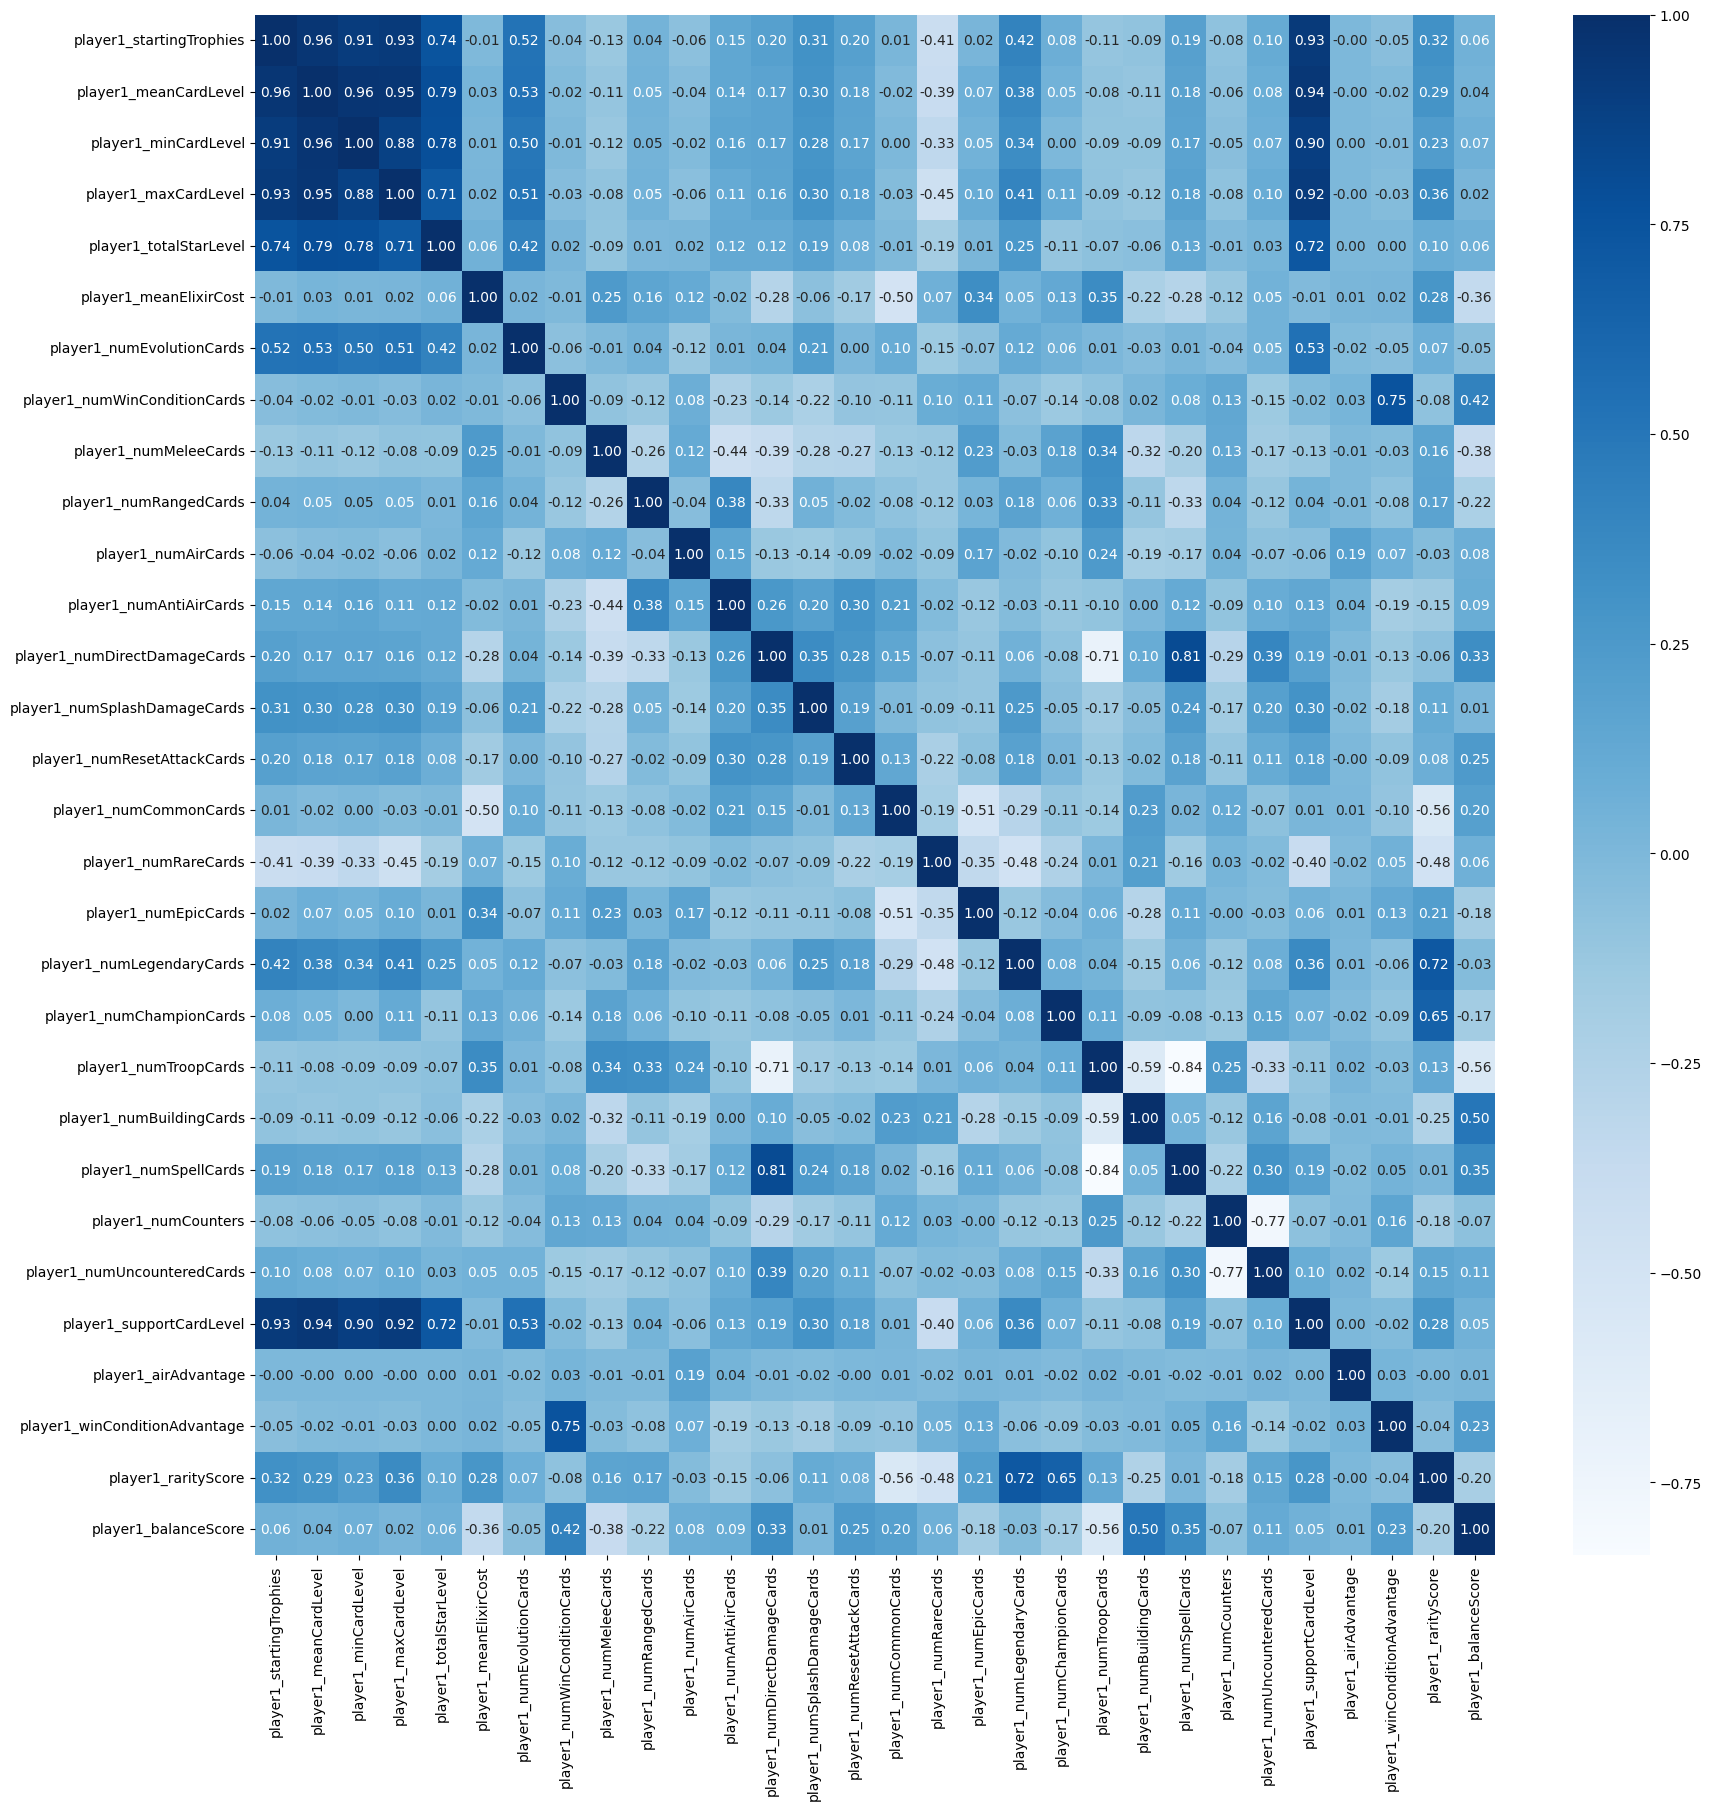

In [265]:
df_player1 = (
    df_train[[col for col in df_train.columns if col.startswith("player1_") and not col.startswith("player1_has")]]
    .drop(columns=["player1_tag", "player1_name", "player1_supportCardName", "player1_supportCardRarity"])
    .assign(
        player1_airAdvantage=player1_air_advantage,
        player1_winConditionAdvantage=player1_win_condition_advantage,
        player1_rarityScore=player1_rarity_score,
        player1_balanceScore=player1_balance_score
    )
)

plt.figure(figsize=(20, 20))
sns.heatmap(df_player1.corr(), annot=True, cmap="Blues", fmt=".2f", cbar=True)
plt.show()

Respecto a las variables individuales del primer jugador, tenemos algunas relaciones de interés entre pares:

* `meanCardLevel - startingTrophies (0.96)`
* `minCardLevel - startingTrophies (0.91)`
* `minCardLevel - meanCardLevel (0.96)`
* `maxCardLevel - startingTrophies (0.93)`
* `maxCardLevel - meanCardLevel (0.95)`
* `maxCardLevel - minCardLevel (0.88)`
* `totalStarLevel - startingTrophies (0.74)`
* `totalStarLevel - meanCardLevel (0.79)`
* `totalStarLevel - minCardLevel (0.78)`
* `totalStarLevel - maxCardLevel (0.71)`
* `supportCardLevel - startingTrophies (0.93)`
* `supportCardLevel - meanCardLevel (0.94)`
* `supportCardLevel - minCardLevel (0.90)`
* `supportCardLevel - maxCardLevel (0.92)`
* `supportCardLevel - totalStarLevel (0.72)`
* `numSpellCards - numDirectDamageCards (0.81)`
* `winConditionAdvantage - numWinConditionCards (0.75)`
* `rarityScore - numLegendaryCards (0.72)`
* `numSpellCards - numTroopCards (-0.84)`
* `numDirectDamageCards - numTroopCards (-0.71)`
* `numUncounteredCards - numCounters (-0.77)`

Es comprensible que las variables que involucren niveles estén correlacionadas entre ellas, así como que los niveles crezcan con los trofeos o que los puntos estelares aumenten con los niveles. Por otra parte, todas las cartas de daño directo a torre son hechizos y aumentar el número de estos implica utilizar menos tropas en el mazo. Tampoco es sorprendente que cuando un jugador tiene más cartas sin contrarrestar, el número total de counters disminuya.

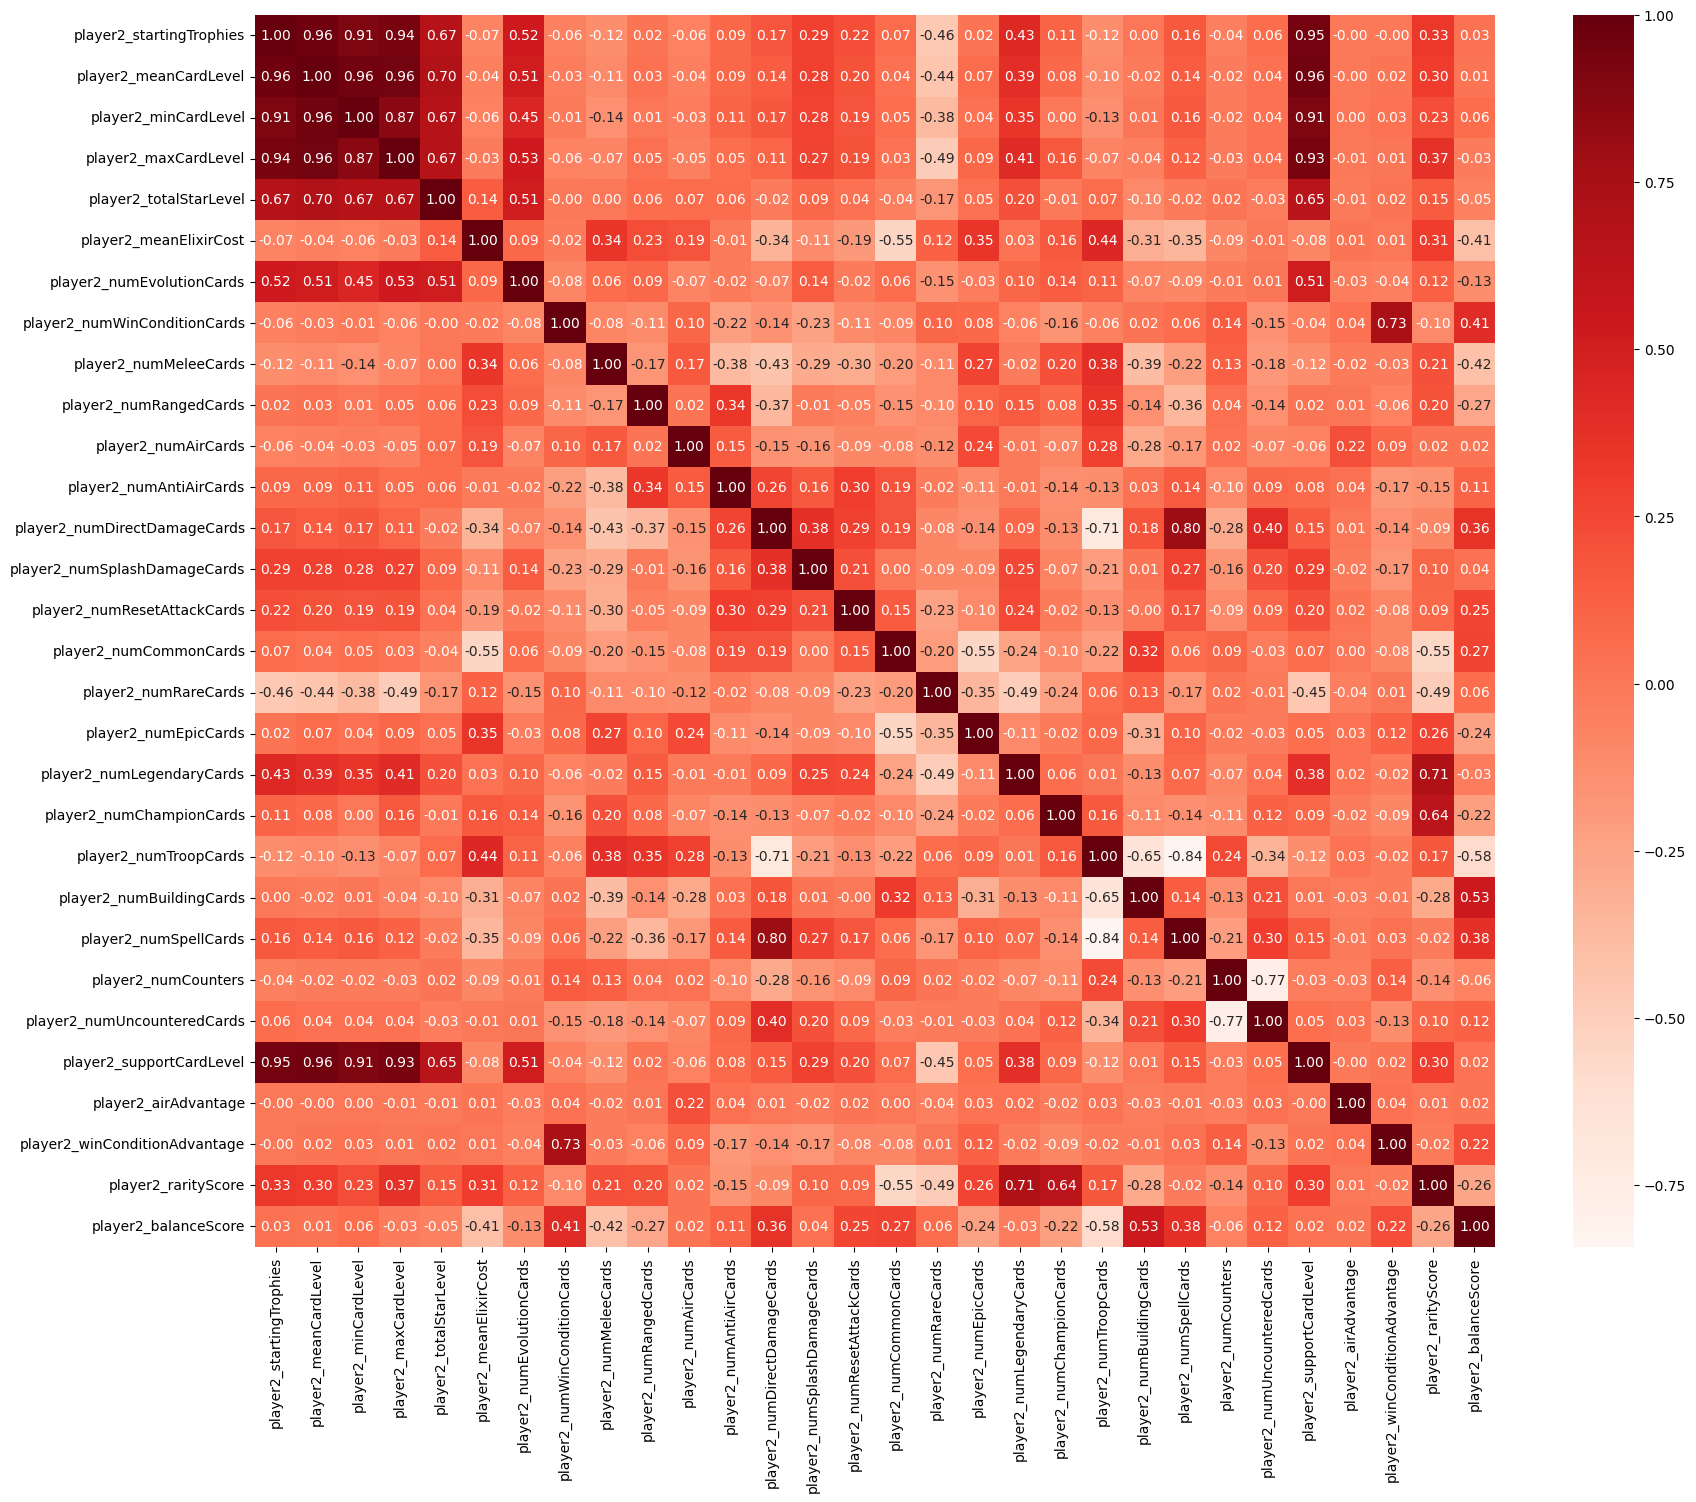

In [266]:
df_player2 = (
    df_train[[col for col in df_train.columns if col.startswith("player2_") and not col.startswith("player2_has")]]
    .drop(columns=["player2_tag", "player2_name", "player2_supportCardName", "player2_supportCardRarity"])
    .assign(
        player2_airAdvantage=player2_air_advantage,
        player2_winConditionAdvantage=player2_win_condition_advantage,
        player2_rarityScore=player2_rarity_score,
        player2_balanceScore=player2_balance_score
    )
)

plt.figure(figsize=(20, 16))
sns.heatmap(df_player2.corr(), annot=True, cmap="Reds", fmt=".2f", cbar=True)
plt.show()

Respecto al segundo jugador los valores cambian ligeramente, pero en líneas generales la matriz es muy parecida debido a que las distribuciones de las variables son similares para ambos jugadores.

Vamos a explorar ahora las relaciones entre las diferencias, que puede ser lo que más nos interese de cara a descartar alguna de cara al preprocesamiento:

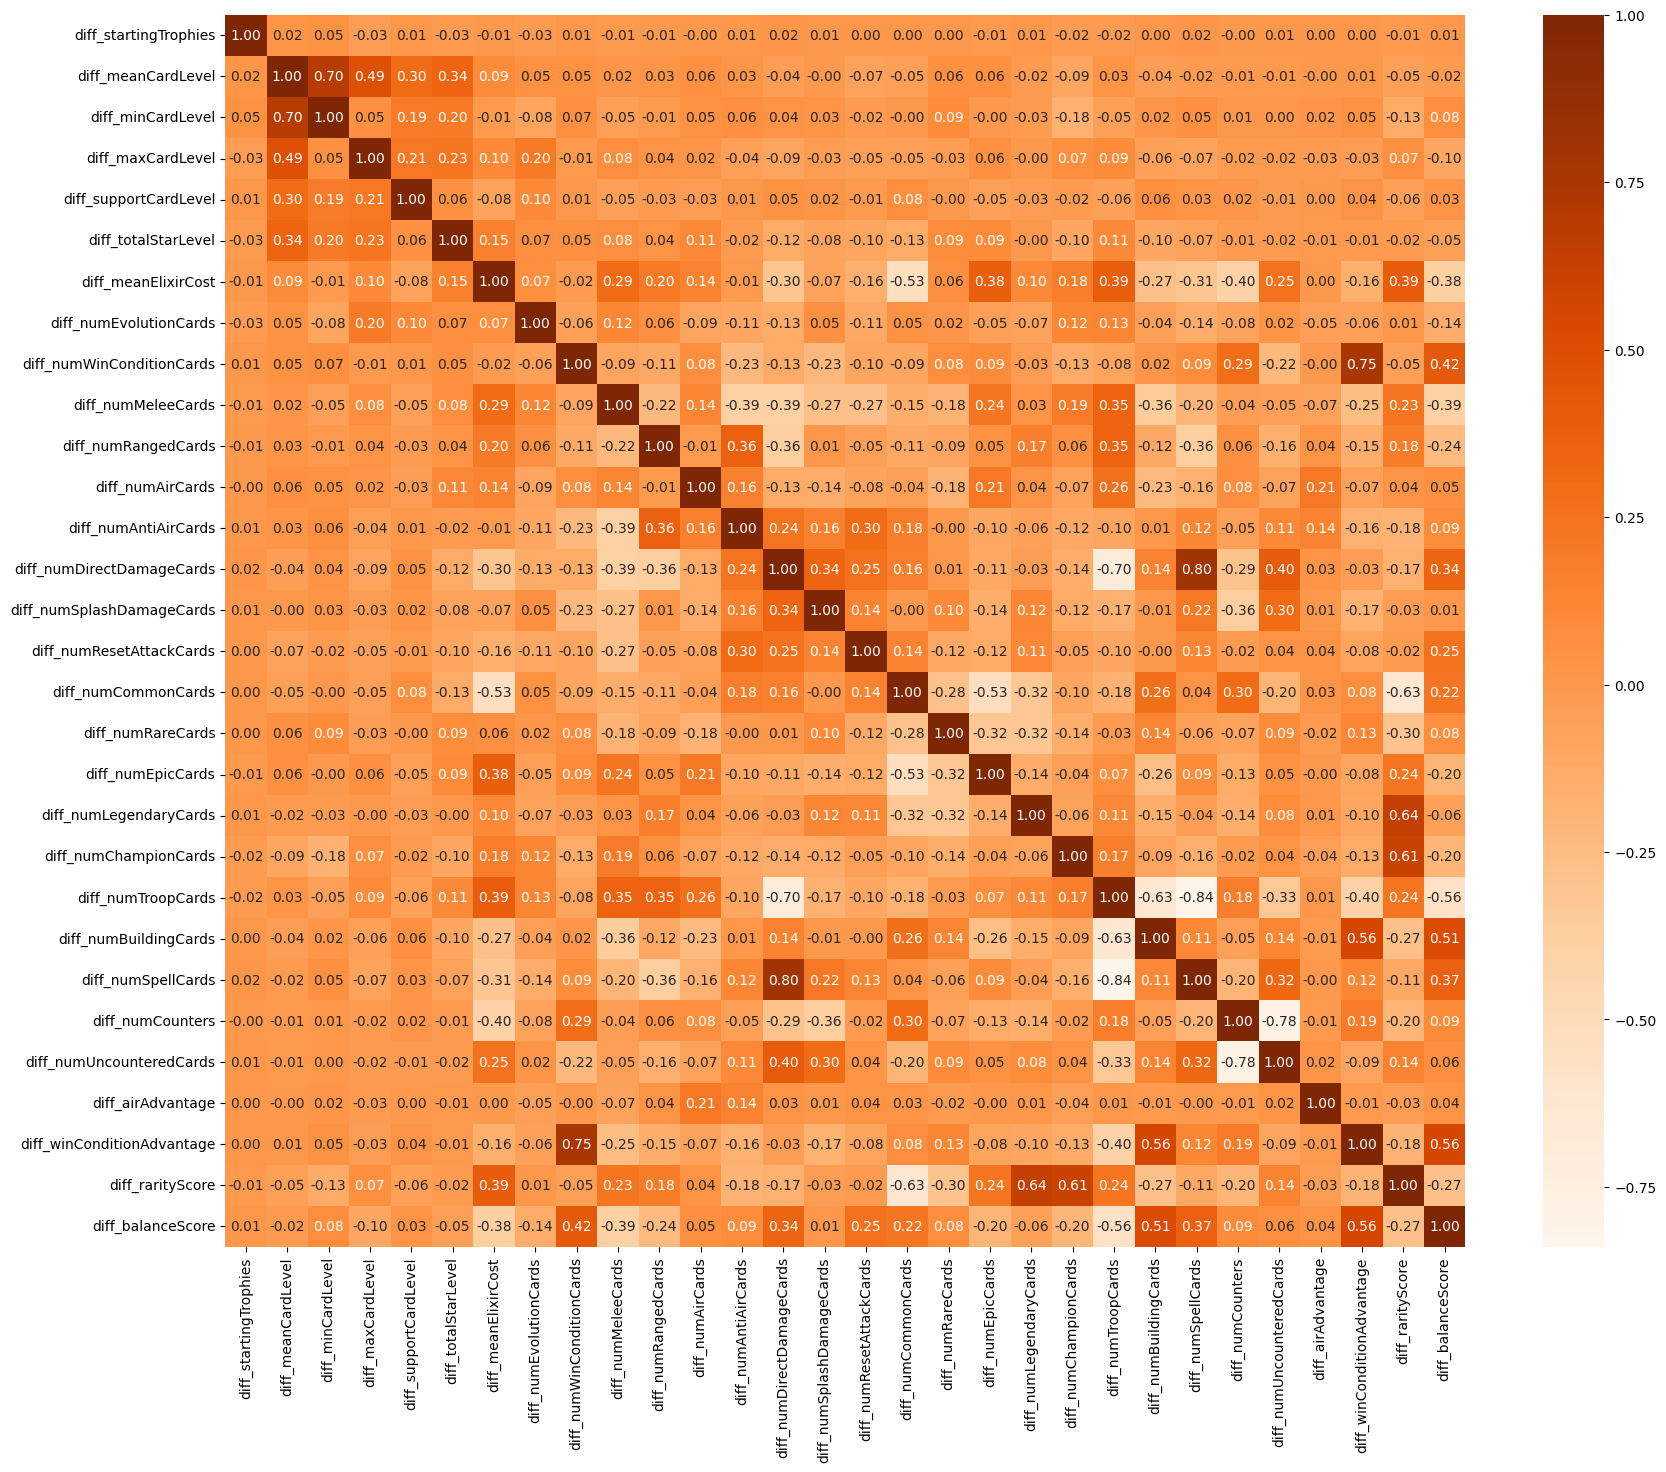

In [267]:
df_diff = pd.DataFrame({
    "diff_startingTrophies": diff_starting_trophies,
    "diff_meanCardLevel": diff_mean_card_level,
    "diff_minCardLevel": diff_min_card_level,
    "diff_maxCardLevel": diff_max_card_level,
    "diff_supportCardLevel": diff_support_card_level,
    "diff_totalStarLevel": diff_total_star_level,
    "diff_meanElixirCost": diff_mean_elixir_cost,
    "diff_numEvolutionCards": diff_num_evolution_cards,
    "diff_numWinConditionCards": diff_num_win_condition_cards,
    "diff_numMeleeCards": diff_num_melee_cards,
    "diff_numRangedCards": diff_num_ranged_cards,
    "diff_numAirCards": diff_num_air_cards,
    "diff_numAntiAirCards": diff_num_anti_air_cards,
    "diff_numDirectDamageCards": diff_num_direct_damage_cards,
    "diff_numSplashDamageCards": diff_num_splash_damage_cards,
    "diff_numResetAttackCards": diff_num_reset_attack_cards,
    "diff_numCommonCards": diff_num_common_cards,
    "diff_numRareCards": diff_num_rare_cards,
    "diff_numEpicCards": diff_num_epic_cards,
    "diff_numLegendaryCards": diff_num_legendary_cards,
    "diff_numChampionCards": diff_num_champion_cards,
    "diff_numTroopCards": diff_num_troop_cards,
    "diff_numBuildingCards": diff_num_building_cards,
    "diff_numSpellCards": diff_num_spell_cards,
    "diff_numCounters": diff_num_counters,
    "diff_numUncounteredCards": diff_num_uncountered_cards,
    "diff_airAdvantage": diff_air_advantage,
    "diff_winConditionAdvantage": diff_win_condition_advantage,
    "diff_rarityScore": diff_rarity_score,
    "diff_balanceScore": diff_balance_score
})

plt.figure(figsize=(20, 16))
sns.heatmap(df_diff.corr(), annot=True, cmap="Oranges", fmt=".2f", cbar=True)
plt.show()

No tenemos correlaciones tan altas como en las matrices anteriores, pero sí algunos pares a tener en cuenta:

* `meanCardLevel - minCardLevel (0.70)`
* `numSpellCards - numDirectDamageCards (0.80)`
* `winConditionAdvantage - numWinConditionCards (0.75)`
* `numDirectDamageCards - numTroopCards (-0.70)`
* `numSpellCards - numTroopCards (-0.84)`
* `numUncounteredCards - numCounters (-0.78)`

Se mantienen algunas correlaciones que ya había a nivel individual. Por ejemplo, tener más cartas de daño directo a torre que el rival tenderá a significar que se tienen más hechizos que el rival. Esto también ocurre inversamente para las tropas o con la relación entre el número de *counters* y las cartas sin contrarrestar. Las correlaciones respecto a niveles, trofeos y puntos estelares son mucho menores cuando trabajamos con diferencias.

También podemos estudiar qué cartas suelen utilizarse juntas y cuáles no.

* Para medir las cartas que se activan juntas podemos usar el *índice de Jaccard*, que solamente tiene en cuenta los casos en los que se utilizan. En este caso es más adecuado que el *coeficiente de correlación de Pearson*, ya que las variables binarias están desbalanceadas y tampoco nos interesa una las correlaciones altas por pares de ceros.

* Para medir las cartas que se excluyen sí podemos usar el *coeficiente de correlación de Pearson*, ordenando de menor a mayor (un valor negativo significa que cuando una carta de usa, la otra tiende a no usarse).

In [268]:
def compute_metrics(df):
    pairs = combinations(df.columns.to_list(), 2)
    results = []
    for i, j in pairs:
        a, b = df[i].values, df[j].values
        union = np.logical_or(a, b).sum()
        intersection = np.logical_and(a, b).sum()
        jaccard = intersection / union if union else np.nan
        pearson = np.corrcoef(a, b)[0, 1]
        results.append(((i, j), jaccard, pearson))
    return pd.DataFrame(results, columns=["pair", "jaccard", "pearson"])

player1_metrics = compute_metrics(df_train.filter(like="player1_has"))
player2_metrics = compute_metrics(df_train.filter(like="player2_has"))

Vamos a ver los pares de cartas que más aparecen juntos utilizando el índice de Jaccard:

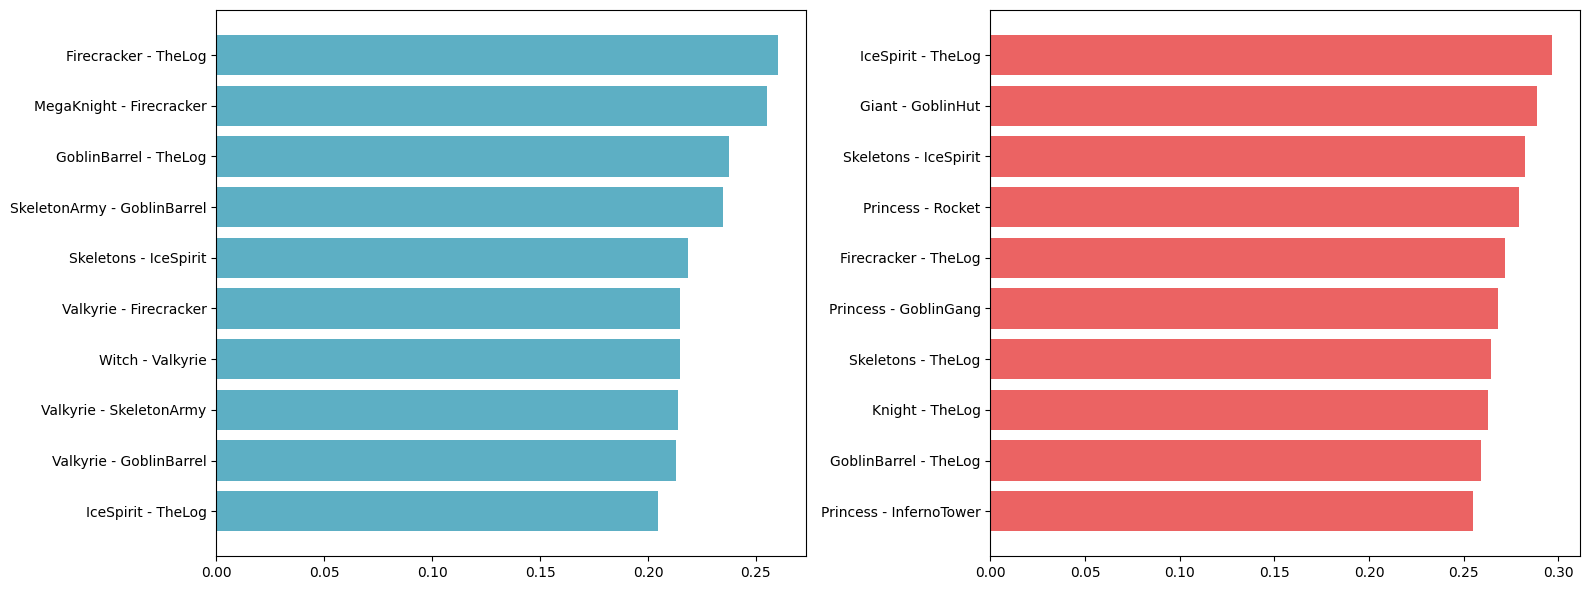

In [269]:
player1_top_jaccard = player1_metrics.nlargest(10, "jaccard")
player2_top_jaccard = player2_metrics.nlargest(10, "jaccard")

palette={"player1": "#2794B0", "player2": "#E52F2F"}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.barh([f"{a.replace("player1_has", "")} - {b.replace("player1_has", "")}" for a, b in player1_top_jaccard["pair"]], player1_top_jaccard["jaccard"], color="#2794B0", alpha=0.75)
ax1.invert_yaxis()

ax2.barh([f"{a.replace("player2_has", "")} - {b.replace("player2_has", "")}" for a, b in player2_top_jaccard["pair"]], player2_top_jaccard["jaccard"], color="#E52F2F", alpha=0.75)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

Entre ellos se encuentran combos habituales como `Valquiria + Lanzafuegos` o `El Tronco + Lanzafuegos`. También vemos los pares `Barril de duendes + El Tronco` o `Princesa + Cohete`, típicos de mazos *Log bait*.

Vamos a mostrar ahora los pares de cartas que más se excluyen (que menos aparecen juntas) utilizando el índice de correlación de Pearson:

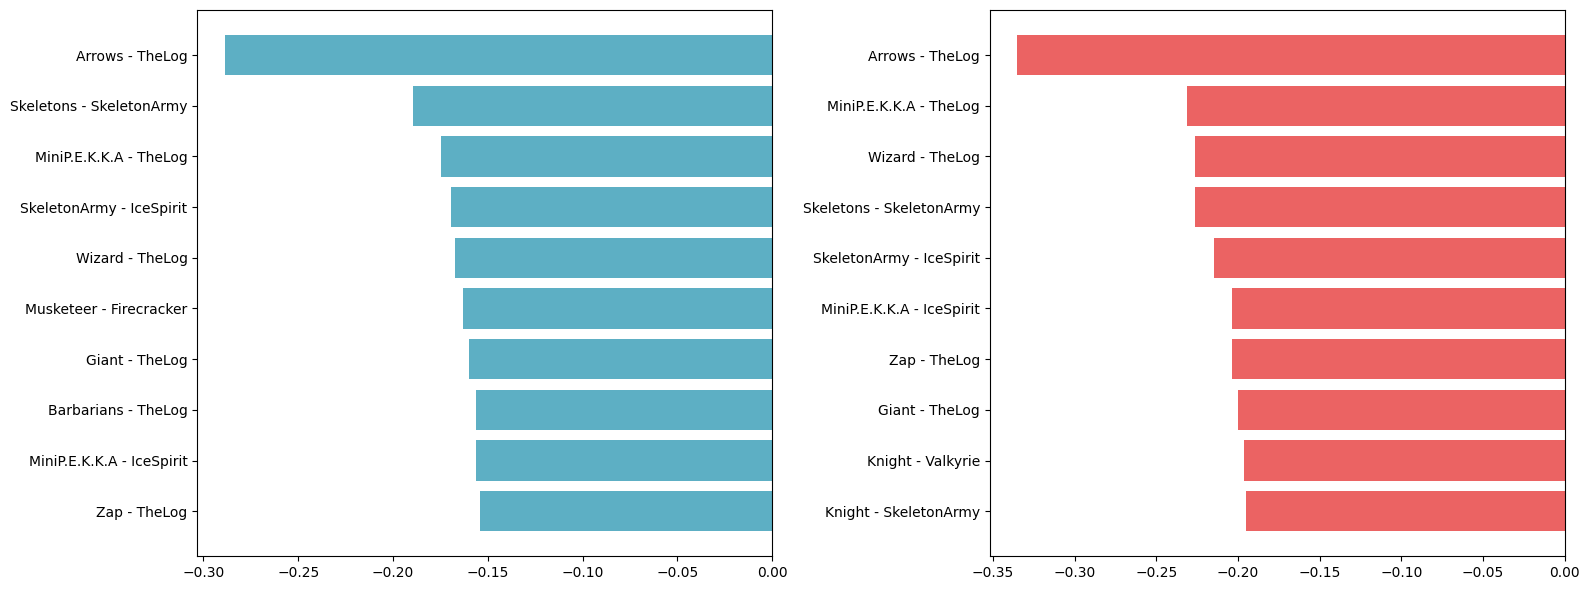

In [270]:
player1_bottom_pearson = player1_metrics.nsmallest(10, "pearson")
player2_bottom_pearson = player2_metrics.nsmallest(10, "pearson")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.barh([f"{a.replace("player1_has", "")} - {b.replace("player1_has", "")}" for a, b in player1_bottom_pearson["pair"]], player1_bottom_pearson["pearson"], color="#2794B0", alpha=0.75)
ax1.invert_yaxis()

ax2.barh([f"{a.replace("player2_has", "")} - {b.replace("player2_has", "")}" for a, b in player2_bottom_pearson["pair"]], player2_bottom_pearson["pearson"], color="#E52F2F", alpha=0.75)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

Encontramos pares de cartas que tienen habilidades similares y por lo tanto no es conveniente utilizar ambas a la vez, como `Tronco + Flechas` o `Esqueletos + Ejército de esqueletos`.

<a id="section3_4"></a>
### <font color="#00586D"> 3.4. Varianza e importancia de las variables</font>

También existen otros factores que pueden ayudarnos a tomar mejores decisiones cuando se trata de seleccionar características:
* Descartar las variables con varianza igual o cercana a cero, es decir, cuyos valores sean siempre o casi siempre los mismos. Esto es efectivo porque para aprender patrones necesamos que haya poder discriminativo.
* Medir la importancia de las variables mediante algoritmos capaces de almacenarla después de ser entrenados, como *Random Forest* o *Gradient Boosting*. Es fundamental recalcar que en ningún momento se deben utilizar datos de prueba, este proceso ha de realizarse a partir del conjunto de entrenamiento y su objetivo es simplemente obtener más conocimiento sobre cómo de relevantes pueden llegar a ser las variables.

Vamos a comenzar explorando las variables numéricas (sin incluir las binarias) que menos varianza tienen, incluyendo tanto las de cada jugador como las diferencias.

In [271]:
pd.concat([df_player1, df_player2, df_diff], axis=1).var(numeric_only=True).sort_values(ascending=False).tail(20)

player2_numDirectDamageCards     0.543964
player1_winConditionAdvantage    0.534570
diff_meanElixirCost              0.533334
player2_numAirCards              0.531383
player1_numAirCards              0.530193
player2_winConditionAdvantage    0.496035
player1_numWinConditionCards     0.491295
player1_numResetAttackCards      0.452590
player2_numResetAttackCards      0.449790
player2_numWinConditionCards     0.413836
player2_numBuildingCards         0.342817
player1_numBuildingCards         0.322581
diff_numChampionCards            0.313602
player2_meanElixirCost           0.283397
player1_meanElixirCost           0.261430
player1_numChampionCards         0.181975
player2_numChampionCards         0.172679
diff_airAdvantage                0.011630
player2_airAdvantage             0.007082
player1_airAdvantage             0.004514
dtype: float64

Observamos que existe una enorme diferencia entre la varianza de `airAdvantage` y la de las demás variables. Habíamos visto previamente que apenas contábamos con partidas en las que esta ventaja existiera, y es posible que sea preferible no crear esta característica porque podría ser poco relevante e incluso entorpecer el proceso de aprendizaje.

Las calculamos ahora para las variables binarias:

In [272]:
df_train[[col for col in df_train.columns if col.startswith("player1_has") or col.startswith("player2_has")]].var(numeric_only=True).sort_values(ascending=False).tail(20)

player1_hasMonk                0.003915
player1_hasElixirCollector     0.003876
player2_hasVoid                0.003777
player2_hasSuspiciousBush      0.003679
player2_hasElixirCollector     0.003600
player2_hasLavaHound           0.003580
player2_hasZappies             0.003383
player1_hasThreeMusketeers     0.003166
player2_hasHealSpirit          0.003067
player1_hasHealSpirit          0.003048
player2_hasPhoenix             0.002752
player1_hasVoid                0.002633
player1_hasGoblinDemolisher    0.002594
player2_hasThreeMusketeers     0.002534
player2_hasGoblinDemolisher    0.002357
player1_hasGoblinMachine       0.002278
player2_hasGoblinMachine       0.001902
player2_hasRuneGiant           0.001902
player1_hasBarbarianHut        0.001783
player2_hasBarbarianHut        0.001467
dtype: float64

En estos casos la varianza es mucho menor porque hay cartas que apenas se han utilizado en nuestras partidas, pero no hay ninguna que esté claramente por debajo como en el caso anterior. Puede ser preferible conservarlas para tratar de encontrar patrones más complejos propios de combinaciones entre cartas específicas.

Ahora entrenaremos un *Random Forest* a partir de distintos conjuntos de variables para hacernos una idea general de su importancia y poder tomar mejores decisiones.

Comenzamos con las variables que describen el mazo de ambos jugadores, sin realizar la diferencia:

In [273]:
X = pd.concat([df_player1, df_player2], axis=1)
y = df_train["winner"]

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

player1_startingTrophies         0.043349
player2_startingTrophies         0.043194
player1_meanCardLevel            0.039905
player2_totalStarLevel           0.037733
player2_meanCardLevel            0.036059
player1_rarityScore              0.032674
player1_meanElixirCost           0.031468
player2_meanElixirCost           0.029975
player2_rarityScore              0.029914
player1_numCounters              0.028472
player2_numCounters              0.028455
player1_totalStarLevel           0.027262
player1_balanceScore             0.020814
player1_minCardLevel             0.018642
player1_numUncounteredCards      0.018177
player2_balanceScore             0.017836
player2_numUncounteredCards      0.017305
player1_numMeleeCards            0.016881
player1_numCommonCards           0.016822
player1_numRareCards             0.016782
player1_numAntiAirCards          0.016535
player1_numSplashDamageCards     0.016480
player1_numRangedCards           0.015976
player1_numEpicCards             0

La ventaja aérea parece ser completamente irrelevante, de nuevo muy alejada de sus características más cercanas en la serie ordenada. Las variables más relevantes parecen ser los trofeos, el nivel de las cartas o los *counters*.

Vamos a obtener la importancia entrenando el modelo solamente con las diferencias. Como estas son pocas, mostraremos un gráfico de barras con todas:

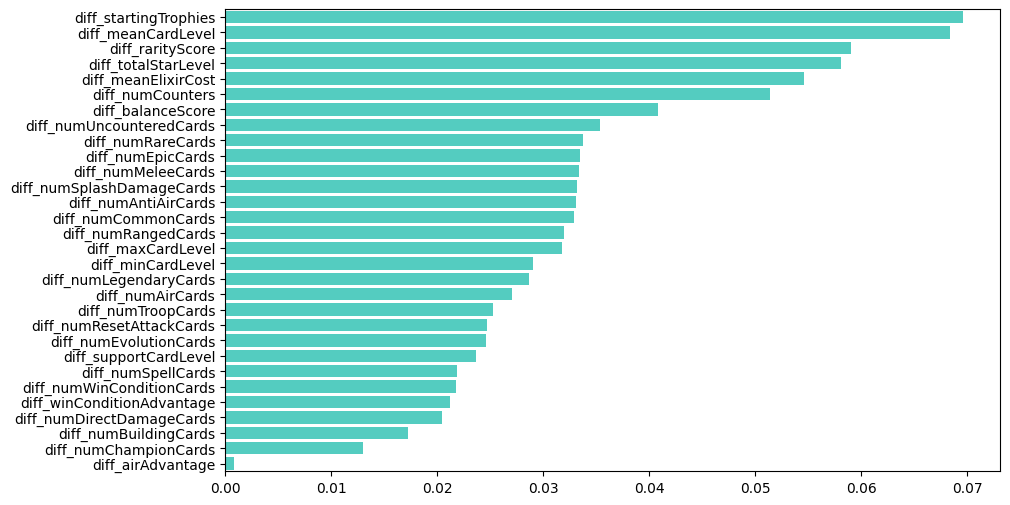

In [274]:
X = df_diff
y = df_train["winner"]

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

plt.figure(figsize=(10, 6))
sns.barplot(data=pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False), orient="h", color="turquoise")
plt.show()

No existen grandes diferencias respecto al caso anterior, la diferencia actúa de forma bastante similar a las variables de los jugadores por separado. Esto también nos puede hacer pensar que es preferible descartarlas y quedarnos solamente con las diferencias para reducir dimensionalidad y construir modelos más sencillos con un rendimiento similar o incluso mejor. Estas decisiones se tomarán durante el preprocesamiento.

Si entrenamos considerando variables individuales y diferencias la importancia es la siguiente:

In [275]:
X = pd.concat([df_player1, df_player2, df_diff], axis=1)
y = df_train["winner"]

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

diff_meanCardLevel          0.038081
diff_startingTrophies       0.027911
player1_startingTrophies    0.026848
player2_startingTrophies    0.026741
player2_totalStarLevel      0.026005
                              ...   
player1_numChampionCards    0.002487
player2_numChampionCards    0.002342
diff_airAdvantage           0.000282
player1_airAdvantage        0.000159
player2_airAdvantage        0.000141
Length: 90, dtype: float64

Vemos que la importancia se distribuye más, pero las mismas variables (primer jugador, segundo jugador y diferencia) siempre son muy cercanas entre sí.

---

<a id="section4"></a>
## <font color="#00586D"> 4. Conclusiones</font>

Hemos llevado a cabo un análisis exploratorio de datos utilizando para ello nuestro conjunto de entrenamiento. Este proceso nos ha servido para comprender mejor las dinámicas del juego y, sobre todo, para tomar mejores decisiones de cara al preprocesamiento y la construcción de modelos de aprendizaje automático.

Para ello, hemos visualizado las distribuciones de las variables y también las relaciones entre ellas, con la variable objetivo y mediante matrices de correlación. Además, hemos recurrido a otras técnicas como explorar la varianza o la importancia de las características para decidir si es conveniente conservar o descartar algunas de ellas.

Si bien la parte técnica se realiza durante la fase de preprocesamiento, hemos combinado el análisis con un proceso de ingeniería de características en el que hemos explorado la posibilidad de crear nuevos atributos a partir de otras variables ya existentes. Hemos calculado diferencias tras detectar simetría en los datos y también hemos utilizado conocimiento experto para crear variables y sacar otras conclusiones conforme se ha ido realizando el análisis.

Toda la información de valor obtenida se utilizará durante el preprocesamiento para poder crear modelos compactos que sean capaces de aprender de los datos de forma eficiente para predecir nuevos enfrentamientos.

---